# 資料處理
## 股票
### 爬股票資料
用爬蟲抓王品(2727)2024~2025年資料  
因為王品集團為服務業，沒有剛需，更容易受外界訊息波動影響影響

In [ ]:
import pandas as pd
import requests
import json

# 設定年份和股票代碼
stock_no = 'TAIEX'
# 初始化空的 DataFrame
all_data = pd.DataFrame()
for year in range(2024,2025):
    # 逐月抓取數據
    for month in range(1, 13):  # 循環 1 到 12 月
        date = f"{str(year)}{month:02d}01"  # 格式化為 YYYYMMDD，例如 20210101, 20210201
        url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
        
        # 發送請求
        response = requests.get(url)
        content = json.loads(response.text)
        
        # 確保有數據才處理
        if 'data' in content:
            stock_data = content['data']
            col_name = content['fields']
            # 建立 DataFrame 並加入累積的數據中
            monthly_data = pd.DataFrame(data=stock_data, columns=col_name)
            all_data = pd.concat([all_data, monthly_data], ignore_index=True)

# 顯示結果
print(all_data.head())  # 檢視前五筆數據
all_data.to_csv('C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2021~2024_大盤.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
import requests
import json

# 設定年份和股票代碼
# 初始化空的 DataFrame
all_data = pd.DataFrame()
for year in range(2021,2024):
    # 逐月抓取數據
    for month in range(1, 13):  # 循環 1 到 12 月
        date = f"{str(year)}{month:02d}01"  # 格式化為 YYYYMMDD，例如 20210101, 20210201
        #url = f"https://www.twse.com.tw/rwd/zh/TAIEX/MI_5MINS_HIST?date={date}&response=json# 發送請求"
        url = f"https://www.twse.com.tw/rwd/zh/TAIEX/MI_5MINS_HIST?date={date}&response=json"

        
        response = requests.get(url)
        if response.status_code != 200 or not response.text.strip():
            print(f"No data for date: {date}")
            continue
        
        try:
            content = json.loads(response.text)
        except json.JSONDecodeError:
            print(f"JSON decode error for date: {date}")
            continue
        # 確保有數據才處理
        if 'data' in content:
            stock_data = content['data']
            col_name = content['fields']
            # 建立 DataFrame 並加入累積的數據中
            monthly_data = pd.DataFrame(data=stock_data, columns=col_name)
            all_data = pd.concat([all_data, monthly_data], ignore_index=True)

# 顯示結果
print(all_data.head())  # 檢視前五筆數據
all_data.to_csv('C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2021~2024_大盤.csv', index=False, encoding='utf-8-sig')

          日期       開盤指數       最高指數       最低指數       收盤指數
0  110/01/04  14,720.25  14,937.13  14,720.25  14,902.03
1  110/01/05  14,913.64  15,000.03  14,861.99  15,000.03
2  110/01/06  15,145.85  15,197.68  14,837.00  14,983.13
3  110/01/07  15,059.52  15,270.40  15,049.86  15,214.00
4  110/01/08  15,365.13  15,463.95  15,275.38  15,463.95


### 計算ATR
因LDA標籤只有新聞分類，沒有(對王品股票)的好壞，所以我預測波動ATR
而當ATR高時，適合當沖

In [ ]:
import pandas as pd

# 计算 ATR
def calculate_atr(df, n=14):
    df['HL'] = df['最高價'] - df['最低價']
    df['HC'] = abs(df['收盤價'].shift(1) - df['最高價'])
    df['LC'] = abs(df['收盤價'].shift(1) - df['最低價'])
    df['MTR'] = df[['HL', 'HC', 'LC']].max(axis=1)
    
    # 计算 ATR
    df['ATR'] = df['MTR'].rolling(window=n).mean()
    
    return df.drop(['HL', 'HC', 'LC'], axis=1)

# 读取 CSV 数据并转换数据类型
df = pd.read_csv(r"C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/陽明海運.csv", thousands=',')

# 计算 ATR
df = calculate_atr(df)

# 保存结果
df.to_csv('C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/陽明海運_ATR.csv', index=False)
print(df.head())


          日期       成交股數         成交金額   開盤價   最高價   最低價   收盤價   漲跌價差    成交筆數  \
0  113/01/02  166027847   8956551748  54.2  55.2  52.2  53.0  +1.70   68927   
1  113/01/03  125444985   6784139085  54.8  55.1  53.1  54.0  +1.00   57048   
2  113/01/04  292972545  16703053445  55.0  59.2  54.4  57.3  +3.30  132616   
3  113/01/05  208005104  12050289014  58.2  58.9  56.8  58.0  +0.70   88120   
4  113/01/08  110770058   6334958055  57.8  58.5  56.2  56.5  -1.50   52954   

   MTR  ATR  
0  3.0  NaN  
1  2.1  NaN  
2  5.2  NaN  
3  2.1  NaN  
4  2.3  NaN  


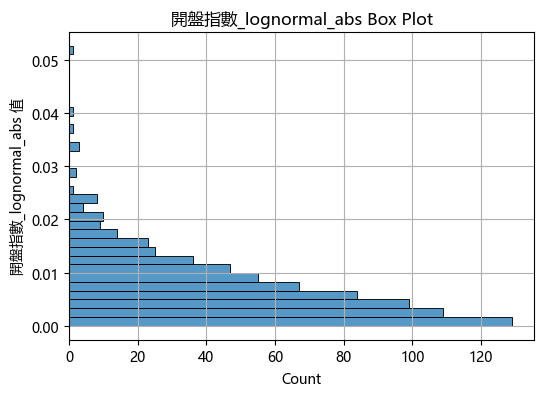

開盤指數_lognarmal_abs 統計摘要：
count    728.000000
mean       0.007022
std        0.006250
min        0.000019
25%        0.002402
50%        0.005405
75%        0.010015
max        0.052681
Name: 開盤指數_lognormal_abs, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 使用新路徑讀取 CSV 檔案
file_path = r"C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2021~2024_大盤_lognormal_abs.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# 去除欄位名稱中的多餘空白
df.columns = df.columns.str.strip()
# Set a font that supports Chinese characters
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly

# 繪製 ATR 盒狀圖
plt.figure(figsize=(6, 4))
sns.histplot(y=df['開盤指數_lognormal_abs'])
plt.title('開盤指數_lognormal_abs Box Plot')
plt.ylabel('開盤指數_lognormal_abs 值')
plt.grid(True)
plt.show()

# 計算 ATR 的統計摘要
atr_summary = df['開盤指數_lognormal_abs'].describe()
print("開盤指數_lognarmal_abs 統計摘要：")
print(atr_summary)


### 股票lognrmal


In [14]:
import pandas as pd
import numpy as np
import torch

device = torch.device("cuda:0")

# 讀取 CSV
data = pd.read_csv("C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2024~2025_大盤.csv")

# 檢查 "日期" 欄位是否存在
if "日期" in data.columns:
    # 轉換民國年為西元年
    data["日期"] = data["日期"].astype(str).str.replace("/", "-")  # 先統一格式
    data["日期"] = data["日期"].apply(lambda x: f"{int(x.split('-')[0]) + 1911}-{x.split('-')[1]}-{x.split('-')[2]}")
    
    # 轉換為 datetime 格式
    data["日期"] = pd.to_datetime(data["日期"], format="%Y-%m-%d")

# 轉換包含逗號的數值欄位
columns_with_commas = ["開盤指數","最高指數","最低指數","收盤指數"]
for col in columns_with_commas:
    data[col] = data[col].astype(str).str.replace(",", "").astype(float)

# 計算 lognormal 絕對值變化
numeric_cols =  ["開盤指數","最高指數","最低指數","收盤指數"]
for col in numeric_cols:
    data[col + '_lognormal_abs'] = abs(np.log(data[col].shift(-1) / data[col]))

# 確保「日期」仍然存在
data = data[["日期"] + [col for col in data.columns if col != "日期"]]

# 存成新的 CSV
data.to_csv("C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2024~2025_大盤_lognormal_abs.csv", index=False)


In [16]:
import pandas as pd

# -------------------------------
def transform_series(series):
    """
    轉換原始序列：
    1. 比值定義為：當前項 / 前一項（第一項固定為1）
    2. 對轉換後的比值序列進行標準化

    回傳：
    standardized_ratio: 標準化後的比值序列 (ndarray)
    scaler: StandardScaler 物件，後續用於反標準化
    """
    transformed = series.copy()
    transformed.iloc[0] = 1.0  # 第一項固定為 1
    for i in range(1, len(series)):
        # 比值 = 當前項 / 前一項
        transformed.iloc[i] = series.iloc[i] / series.iloc[i-1]
    
    
    return transformed

def transform_series_2(series1,series2):
    """
    轉換原始序列：
    1. 比值定義為：當前項 / 前一項（第一項固定為1）
    2. 對轉換後的比值序列進行標準化

    回傳：
    standardized_ratio: 標準化後的比值序列 (ndarray)
    scaler: StandardScaler 物件，後續用於反標準化
    """
    transformed = series1.copy()
    transformed.iloc[0] = 1.0  # 第一項固定為 1
    for i in range(1, len(series1)):
        # 比值 = 當前項 / 前一項
        transformed.iloc[i] = series1.iloc[i] / series2.iloc[i-1]
    

    return transformed
data = pd.read_csv("C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2021~2024_大盤_lognormal_abs.csv")
data['收盤指數_lognormal_abs']=data['收盤指數_lognormal_abs'].shift(-1)
data['開盤指數_lognormal_abs']=data['開盤指數_lognormal_abs'].shift(-1)
data['開盤_ratio']= transform_series(data['開盤指數_lognormal_abs'])

data['收盤_ratio']= transform_series_2(data['開盤指數_lognormal_abs'],data['收盤指數_lognormal_abs'])
data.to_csv("C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2021~2024_大盤_lognormal_abs.csv", index=False)



## 爬新聞
### 用google 搜尋
google搜尋可以直接以王品為關鍵字找相關的新聞，但實際爬到的新聞中，大多和王品無關

In [ ]:
from serpapi import GoogleSearch
import time
import json
import requests
from bs4 import BeautifulSoup

def convert_date_format(tw_date):
    """將民國年日期轉換為西元年日期格式"""
    year, month, day = tw_date.split('/')
    year = int(year) + 1911
    return f"{month}/{day}/{year}"

# ✅ 你的 SerpAPI API 金鑰列表（請填入自己的金鑰）
api_keys = [
    "a3167a4dd1b86a1ced56749004a50f281933ef6116dc366f0211a0ea41d722f8","1c8d15161b189eaec85f8108dcc289fd81bfce1281c7b15a77432e50d5d85bc5","6f9461d463bb93e236e268abb6defec9bbb9a25c5d100e3f93ea5b1a89243647"
]

# ✅ 股市開市日期（請填入完整 2024 年開市日期）
df = pd.read_csv(r'C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2024~2025_王品股票_ATR.csv', thousands=',')

opening_days = df.iloc[:, 0]
opening_days = [convert_date_format(date) for date in opening_days]
# ✅ 記錄所有新聞
all_news = []

# ✅ 追蹤目前使用的 API 金鑰索引
current_key_index = 0

def fetch_article_content(url):
    """嘗試存取新聞內文"""
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers, timeout=5)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            paragraphs = soup.find_all("p")
            content = "\n".join([p.get_text() for p in paragraphs if p.get_text()])
            return content[:1500]  # 限制最多存取 1500 字，避免過長
        else:
            return "無法存取新聞內容"
    except Exception as e:
        return f"新聞內容存取失敗：{e}"

for date in opening_days:
    print(f"🔍 抓取 {date} 的新聞...")

    while current_key_index < len(api_keys):  # 當還有可用的 API Key 時
        api_key = api_keys[current_key_index]
        
        # 設定 SerpAPI 參數
        params = {
            "q": "王品",  # 搜尋關鍵字
            "tbm": "nws",  # 限定 Google 新聞
            "hl": "zh-TW",  # 語言：繁體中文
            "gl": "TW",  # 地區：台灣
            "tbs": f"cdr:1,cd_min:{date},cd_max:{date}",  # 指定日期
            "num": 100,  # 限制前 100 篇
            "api_key": api_key,
        }

        try:
            # 取得新聞結果
            search = GoogleSearch(params)
            results = search.get_dict()

            # 如果 API Key 被封鎖或達到上限，會拋出錯誤
            if "error" in results:
                print(f"❌ API 金鑰 {api_key} 用完，切換到下一個...")
                current_key_index += 1  # 切換下一個 API Key
                continue  # 重新嘗試請求
            
            # 解析新聞內容
            news_results = results.get("news_results", [])

            # 確保 news_results 是 list
            if isinstance(news_results, str):  
                try:
                    news_results = json.loads(news_results)  # 嘗試解析 JSON 字串
                except json.JSONDecodeError:
                    print("❌ 解析 JSON 失敗，請檢查 API 回應格式")
                    news_results = []  # 設為空列表，避免程式崩潰

            # 檢查是否為 list
            if isinstance(news_results, list):
                print("✅ news_results 已確認為 list")
            else:
                print("⚠️ news_results 不是 list，請檢查 API 返回的數據格式")

            #print(news_results)
            # ✅ 儲存新聞
            for news in news_results:
                url = news["link"]
                content = fetch_article_content(url)  # 存取新聞內容
                all_news.append({
                    "日期": date,
                    "標題": news["title"],
                    "連結": url,
                    "來源": news["source"] if isinstance(news.get("source"), str) else news.get("source", {}).get("name", "未知"),
                    "時間": news["date"] if isinstance(news.get("date"), str) else news.get("date", {}).get("name", "未知"),
                    "內容": content,
                })

            print(f"✅ {date} 爬取成功，共 {len(news_results)} 篇新聞")
            break  # 成功爬取後跳出 while 迴圈，處理下一個日期

        except Exception as e:
            print(f"❌ {date} 爬取失敗，錯誤：{e}")
            current_key_index += 1  # 切換下一個 API Key

        # 避免 API 限制，每次請求間隔 2 秒
        time.sleep(2)

    if current_key_index >= len(api_keys):
        print("🚨 所有 API 金鑰都用完，停止爬取")
        break  # 終止程式

# ✅ 將結果儲存為 JSON
with open("C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/2024~2025_王品新聞.json", "w", encoding="utf-8") as f:
    json.dump(all_news, f, ensure_ascii=False, indent=4)

print("🎉 爬取完成，新聞已儲存為 `2024_stock_news.json`")


🔍 抓取 01/02/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/02/2024 爬取成功，共 10 篇新聞
🔍 抓取 01/03/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/03/2024 爬取成功，共 25 篇新聞
🔍 抓取 01/04/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/04/2024 爬取成功，共 10 篇新聞
🔍 抓取 01/05/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/05/2024 爬取成功，共 10 篇新聞
🔍 抓取 01/08/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/08/2024 爬取成功，共 8 篇新聞
🔍 抓取 01/09/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/09/2024 爬取成功，共 7 篇新聞
🔍 抓取 01/10/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/10/2024 爬取成功，共 9 篇新聞
🔍 抓取 01/11/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/11/2024 爬取成功，共 10 篇新聞
🔍 抓取 01/12/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/12/2024 爬取成功，共 8 篇新聞
🔍 抓取 01/15/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/15/2024 爬取成功，共 9 篇新聞
🔍 抓取 01/16/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/16/2024 爬取成功，共 9 篇新聞
🔍 抓取 01/17/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/17/2024 爬取成功，共 10 篇新聞
🔍 抓取 01/18/2024 的新聞...
✅ news_results 已確認為 list
✅ 01/18/2024 爬取成功，共 9 篇新聞
🔍 抓取 01/19/2024 的新聞...
✅ news_re

### 抓鉅亨網新聞
鉅亨網為經濟新聞，抓取上面可以得到每天的財經新聞(裡面去掉娛樂等直觀上不影響的新聞)，抓取時間為2024~2025，每天抓100~120篇內容不等

In [ ]:
import time
import random
import requests
import json
from datetime import datetime, timedelta
import pandas as pd

def convert_date_format(tw_date):
    """將民國年日期轉換為西元年日期格式"""
    year, month, day = tw_date.split('/')
    year = int(year) + 1911
    return f"{year}-{month}-{day}"

df = pd.read_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運.csv", thousands=',')

# ✅ 股市開市日期（請填入完整 2024 年開市日期）
opening_days = df.iloc[:, 0]
# 倒序開市日期列表
opening_days = [convert_date_format(date) for date in opening_days]


class CnyesNewsSpider():
    def __init__(self):
        self.session = requests.Session()  # 使用 Session 減少 HTTP 連線次數
        self.headers = {
            'Origin': 'https://news.cnyes.com/',
            'Referer': 'https://news.cnyes.com/',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
        }

    def get_newslist_info(self, startAt, endAt, page=1, limit=99, retries=3):
        """取得指定日期範圍內的新聞，並支援重試機制"""
        url = f"https://api.cnyes.com/media/api/v1/newslist/category/headline?page={page}&limit={limit}&startAt={startAt}&endAt={endAt}"
        
        for attempt in range(retries):
            try:
                r = self.session.get(url, headers=self.headers, timeout=10)
                r.raise_for_status()
                return r.json().get('items', {}).get('data', [])
            
            except requests.exceptions.RequestException as e:
                print(f"⚠️ 第 {attempt + 1} 次請求失敗: {e}")
                time.sleep(random.uniform(5, 10))
        
        print("🚨 多次請求失敗，跳過當前開市日")
        return None



    def fetch_news_for_opendays(self, max_pages=5):  # 強制翻 3 頁
        """根據開市日爬取新聞，確保新聞日期正確"""
        news_data = []

        for openday in opening_days:
            print(f"\n📅 抓取 {openday} 的新聞...")

            # 計算該日的 Unix timestamp 範圍
            openday_start = int(datetime.strptime(openday, "%Y-%m-%d").timestamp())
            openday_end = openday_start + 86399  # 當日 23:59:59

            all_news = []
            for page in range(1, max_pages + 1):  # 強制翻 3 頁
                newslist = self.get_newslist_info(startAt=openday_start, endAt=openday_end, page=page, limit=30)
                if not newslist:
                    break  # 這一頁沒有新聞，停止查詢
                
                all_news.extend(newslist)

                # 如果新聞數少於 30，代表沒有更多新聞，不用翻頁
                if len(newslist) < 30:
                    break 
                # ⭐ 如果已經達到 100 篇，立刻停止
                 

            print(f"  ✅ 確認 {len(all_news)} 篇新聞來自 {openday}")

            # 解析新聞數據
            for news in all_news:
                news_data.append({
                    "date": openday,
                    "newsId": news["newsId"],
                    "title": news["title"],
                    "summary": news["summary"],
                    "url": f'https://news.cnyes.com/news/id/{news["newsId"]}',
                    "content": news.get("content", "無內容"),
                    "keyword": news["keyword"],
                    "publish_time": time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(news["publishAt"])),
                    "category": news["categoryName"],
                })

            # 隨機延遲，避免 API 過載
            time.sleep(random.uniform(3, 7))

        # 儲存 JSON
        filename = 'C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/鉅亨_2021~2024.json'
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(news_data, f, ensure_ascii=False, indent=4)
        
        print(f"\n🎉 新聞抓取完成，已儲存為 {filename}")


        

if __name__ == "__main__":
    spider = CnyesNewsSpider()
    spider.fetch_news_for_opendays()  



📅 抓取 2021-01-04 的新聞...
  ✅ 確認 94 篇新聞來自 2021-01-04

📅 抓取 2021-01-05 的新聞...
  ✅ 確認 129 篇新聞來自 2021-01-05

📅 抓取 2021-01-06 的新聞...
  ✅ 確認 128 篇新聞來自 2021-01-06

📅 抓取 2021-01-07 的新聞...
  ✅ 確認 132 篇新聞來自 2021-01-07

📅 抓取 2021-01-08 的新聞...
  ✅ 確認 123 篇新聞來自 2021-01-08

📅 抓取 2021-01-11 的新聞...
  ✅ 確認 109 篇新聞來自 2021-01-11

📅 抓取 2021-01-12 的新聞...
  ✅ 確認 117 篇新聞來自 2021-01-12

📅 抓取 2021-01-13 的新聞...
  ✅ 確認 121 篇新聞來自 2021-01-13

📅 抓取 2021-01-14 的新聞...
  ✅ 確認 123 篇新聞來自 2021-01-14

📅 抓取 2021-01-15 的新聞...
  ✅ 確認 114 篇新聞來自 2021-01-15

📅 抓取 2021-01-18 的新聞...
  ✅ 確認 86 篇新聞來自 2021-01-18

📅 抓取 2021-01-19 的新聞...
  ✅ 確認 87 篇新聞來自 2021-01-19

📅 抓取 2021-01-20 的新聞...
  ✅ 確認 118 篇新聞來自 2021-01-20

📅 抓取 2021-01-21 的新聞...
  ✅ 確認 120 篇新聞來自 2021-01-21

📅 抓取 2021-01-22 的新聞...
  ✅ 確認 102 篇新聞來自 2021-01-22

📅 抓取 2021-01-25 的新聞...
  ✅ 確認 102 篇新聞來自 2021-01-25

📅 抓取 2021-01-26 的新聞...
  ✅ 確認 125 篇新聞來自 2021-01-26

📅 抓取 2021-01-27 的新聞...
  ✅ 確認 119 篇新聞來自 2021-01-27

📅 抓取 2021-01-28 的新聞...
  ✅ 確認 121 篇新聞來自 2021-01-28

📅 抓取 2021-01-2

KeyboardInterrupt: 

為LDA準備訓練集

In [ ]:
import time
import random
import requests
import json
from datetime import datetime, timedelta

def generate_dates(start_date: str, end_date: str):
    """ 生成從 start_date 到 end_date 之間的所有日期 """
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    delta = timedelta(days=1)
    
    dates = []
    while start <= end:
        dates.append(start.strftime("%Y-%m-%d"))
        start += delta
    
    return dates

# 生成 2023-01-01 到 2024-12-31 的所有日期
daily_dates = generate_dates("2024-01-01", "2024-12-31")

class CnyesNewsSpider():
    def __init__(self):
        self.session = requests.Session()
        self.headers = {
            'Origin': 'https://news.cnyes.com/',
            'Referer': 'https://news.cnyes.com/',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
        }

    def get_newslist_info(self, startAt, endAt, page=1, limit=99, retries=3):
        """ 取得指定日期範圍內的新聞，支援重試機制 """
        url = f"https://api.cnyes.com/media/api/v1/newslist/category/headline?page={page}&limit={limit}&startAt={startAt}&endAt={endAt}"
        
        for attempt in range(retries):
            try:
                r = self.session.get(url, headers=self.headers, timeout=10)
                r.raise_for_status()
                return r.json().get('items', {}).get('data', [])
            except requests.exceptions.RequestException as e:
                print(f"⚠️ 第 {attempt + 1} 次請求失敗: {e}")
                time.sleep(random.uniform(5, 10))
        
        print("🚨 多次請求失敗，跳過當前日期")
        return None

    def fetch_news_for_all_days(self, max_pages=4):
        """ 爬取 2023-2024 年每天的新聞 """
        news_data = []

        for day in daily_dates:
            print(f"\n📅 抓取 {day} 的新聞...")
            start_timestamp = int(datetime.strptime(day, "%Y-%m-%d").timestamp())
            end_timestamp = start_timestamp + 86399  # 當日 23:59:59

            all_news = []
            for page in range(1, max_pages + 1):
                newslist = self.get_newslist_info(startAt=start_timestamp, endAt=end_timestamp, page=page, limit=30)
                if not newslist:
                    break  # 如果這一天沒有新聞，就跳過
                
                all_news.extend(newslist)
                if len(newslist) < 30:
                    break  # 如果新聞數少於 30，代表沒有更多新聞

            print(f"  ✅ 確認 {len(all_news)} 篇新聞來自 {day}")

            for news in all_news:
                news_data.append({
                    "date": day,
                    "newsId": news["newsId"],
                    "title": news["title"],
                    "summary": news["summary"],
                    "url": f'https://news.cnyes.com/news/id/{news["newsId"]}',
                    "content": news.get("content", "無內容"),
                    "keyword": news["keyword"],
                    "publish_time": time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(news["publishAt"])),
                    "category": news["categoryName"],
                })
            
            # 避免請求過多導致封鎖，加入隨機延遲
            time.sleep(random.uniform(1, 3))

        # 儲存 JSON 檔案
        filename = 'C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/鉅亨_2024~2025.json'
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(news_data, f, ensure_ascii=False, indent=4)
        
        print(f"\n🎉 新聞抓取完成，已儲存為 {filename}")

if __name__ == "__main__":
    spider = CnyesNewsSpider()
    spider.fetch_news_for_all_days()


📅 抓取 2024-01-01 的新聞...
  ✅ 確認 16 篇新聞來自 2024-01-01

📅 抓取 2024-01-02 的新聞...
  ✅ 確認 101 篇新聞來自 2024-01-02

📅 抓取 2024-01-03 的新聞...
  ✅ 確認 117 篇新聞來自 2024-01-03

📅 抓取 2024-01-04 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-04

📅 抓取 2024-01-05 的新聞...
  ✅ 確認 113 篇新聞來自 2024-01-05

📅 抓取 2024-01-06 的新聞...
  ✅ 確認 37 篇新聞來自 2024-01-06

📅 抓取 2024-01-07 的新聞...
  ✅ 確認 14 篇新聞來自 2024-01-07

📅 抓取 2024-01-08 的新聞...
  ✅ 確認 110 篇新聞來自 2024-01-08

📅 抓取 2024-01-09 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-09

📅 抓取 2024-01-10 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-10

📅 抓取 2024-01-11 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-11

📅 抓取 2024-01-12 的新聞...
  ✅ 確認 115 篇新聞來自 2024-01-12

📅 抓取 2024-01-13 的新聞...
  ✅ 確認 33 篇新聞來自 2024-01-13

📅 抓取 2024-01-14 的新聞...
  ✅ 確認 12 篇新聞來自 2024-01-14

📅 抓取 2024-01-15 的新聞...
  ✅ 確認 88 篇新聞來自 2024-01-15

📅 抓取 2024-01-16 的新聞...
  ✅ 確認 107 篇新聞來自 2024-01-16

📅 抓取 2024-01-17 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-17

📅 抓取 2024-01-18 的新聞...
  ✅ 確認 120 篇新聞來自 2024-01-18

📅 抓取 2024-01-19 的新聞...
  ✅ 確認 115 篇新聞來自 2024-01-19

📅 抓取 2024-01-20 的

去除 HTML 標籤，只保留純文字，並刪除常見停用詞

In [ ]:
import json
import re
import html
import jieba
jieba.set_dictionary(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\dict.txt.big")

# 讀取 JSON 檔案
file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# 停用詞表（可自行擴充）
stopwords = set([" ","您","它","2024","2023","2022","2021","所以","因為","的", "了", "是", "和", "在", "有", "與", "及", "也", "但", "並", "就", "還", "或", "將", "於", "被", "為", "對", "等", "而", "則", "各", "以及", "都", "由", "與", "其", "上", "下"])

# 清理文本函數
def clean_text(text):
    if isinstance(text, str):
        text = html.unescape(text)  # 轉換 HTML 實體
        text = re.sub(r"<[^>]+>", "", text)  # 移除所有 HTML 標籤
        text = re.sub(r"&nbsp;|\xa0", " ", text)  # 移除 &nbsp; 或 \xa0（不可見空格）
        text = re.sub(r"\n\s*\n+", "\n", text)  # 清理過多的換行（只保留單個換行）
        text = re.sub(r"[^\w\s]", "", text)  # 移除標點符號（保留中文字、數字、空格）
        
        # 使用 jieba 進行中文分詞
        words = jieba.lcut(text)  
        words = [word for word in words if word not in stopwords]  # 過濾停用詞
        text = "".join(words)  # 重新組合（中文通常不需要空格）
        
        return text.strip()
    return text

# 處理所有新聞項目的相關欄位
if isinstance(data, list):
    for item in data:
        for field in ["title", "summary", "content"]:  # 確保這些欄位都被清理
            if field in item:
                item[field] = clean_text(item[field])

# 儲存清理後的 JSON 檔案
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

print("HTML 標籤、HTML 實體、標點符號與停用詞已清除，檔案更新完成！")


Building prefix dict from C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\dict.txt.big ...
Loading model from cache C:\Users\walter\AppData\Local\Temp\jieba.u618dbd8c41c0f8d3b381702721346091.cache
Loading model cost 1.252 seconds.
Prefix dict has been built successfully.


HTML 標籤、HTML 實體、標點符號與停用詞已清除，檔案更新完成！


### 整理THUCNews資料
THUCNews是根据新浪新闻RSS订阅频道2005~2011年间的历史数据筛选过滤生成，包含74万篇新闻文档（2.19 GB），均为UTF-8纯文本格式。我们在原始新浪新闻分类体系的基础上，重新整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐。  
整理程序為將分類資料夾對應標籤，進行存檔

In [ ]:
import os
import json
import jieba
from tqdm import tqdm
from zhconv import convert  # 轉換簡體 -> 繁體

# 設定來源目錄
train_dir = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews"

# 轉換類別名稱為標籤 ID
def get_label_mapping(base_dir):
    """ 遍歷資料夾，建立類別名稱 -> 數字 ID 對應表 """
    return {class_name: i for i, class_name in enumerate(sorted(os.listdir(base_dir))) 
            if os.path.isdir(os.path.join(base_dir, class_name))}

# 讀取所有 .txt 文件，轉成 JSON
def process_directory(base_dir, label_dict):
    """ 讀取所有類別下的 .txt 檔案，轉成 JSON 格式 """
    dataset = []
    
    for class_name, label in label_dict.items():
        class_path = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        
        for file_name in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
            file_path = os.path.join(class_path, file_name)
            if file_name.endswith(".txt"):
                with open(file_path, "r", encoding="utf-8") as f:
                    text = convert(f.read().strip(), "zh-tw")  # 轉成繁體
                    words = jieba.cut(text)  # 分詞
                    dataset.append({"content": " ".join(words), "label": label})
    
    return dataset

# 取得標籤對應表
label_dict = get_label_mapping(train_dir)

# 讀取資料
data = process_directory(train_dir, label_dict)

# 存成 JSON 檔案
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_整理.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

print(f"完成！已儲存至 {output_path}")

# 儲存標籤對應表
label_dict_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_標籤.json"
print(label_dict)

with open(label_dict_path, "w", encoding="utf-8") as f:
    json.dump(label_dict, f, ensure_ascii=False, indent=4)

print(f"標籤對應表已儲存至 {label_dict_path}")

Processing 体育:   0%|          | 0/131604 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\walter\AppData\Local\Temp\jieba.cache
Loading model cost 0.617 seconds.
Prefix dict has been built successfully.
Processing 体育:   1%|          | 1000/131604 [00:13<30:14, 71.98it/s]


KeyboardInterrupt: 

做標籤映射，只保留{
    0,  # 彩票
    1,  # 房产
    2,  # 时政
    3, # 社会
    4, # 科技
    5, # 股票
    6  # 财经
}標籤的新聞資料，去除體育等較為無關，也不易出現在財經新聞的類別


In [ ]:
import json

# 原始標籤映射
label_id_to_name = {
    0: '体育', 1: '娱乐', 2: '家居', 3: '彩票', 4: '房产',
    5: '教育', 6: '时尚', 7: '时政', 8: '星座', 9: '游戏',
    10: '社会', 11: '科技', 12: '股票', 13: '财经'
}

# 保留的標籤ID和新映射
keep_ids = {3, 4, 7, 10, 11, 12, 13}
new_id_map = {
    3: 0,  # 彩票
    4: 1,  # 房产
    7: 2,  # 时政
    10: 3, # 社会
    11: 4, # 科技
    12: 5, # 股票
    13: 6  # 财经
}

with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_整理.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

filtered_data = []
for item in data:
    if item['label'] in keep_ids:
        item['label'] = new_id_map[item['label']]
        filtered_data.append(item)

with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_整理_刪.json", 'w', encoding='utf-8') as f:
    json.dump(filtered_data, f, ensure_ascii=False, indent=2)

## 新聞預處理
### CDLLDA
用CDLLDA估計抓取新聞類別

##### 整理CDLLDA輸入
###### CKIP 斷詞
1.使用CKIP 斷詞(中研院)特性為更適合台灣人用語，更為精準，只是非常慢(全資料要跑數十天)
2.TF-IDF小於0.0015的詞過濾


In [ ]:
#用ckip_env執行
import json
import os
from tqdm import tqdm
from collections import defaultdict
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import corpora
from enum import IntEnum
from ckiptagger import WS

# ✅ 確保 GPU 加速
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
ws = WS("./data", disable_cuda=False)  # 啟用 GPU

class Domain(IntEnum):
    SOURCE = 0
    TARGET = 1

def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

def tokenize_texts(texts):
    """使用 CKIP 進行斷詞"""
    return [ws([text])[0] for text in tqdm(texts, desc="進行分詞處理")]

def process_source_domain(filepath, label_counts):
    """處理源域 JSON: 根據 label_counts 限制每個標籤的篇數"""
    data = load_json(filepath)
    
    label_name_to_id = {
        '彩票': 0, '房产': 1, '时政': 2, '社会': 3, '科技': 4, '股票': 5, '财经': 6
    }
    
    label_counts = {label_name_to_id[k]: v for k, v in label_counts.items()}
    label_dict = defaultdict(list)
    
    for article in data:
        label = article.get("label")
        if label is not None and len(label_dict[label]) < label_counts.get(label, 3000):
            label_dict[label].append(article["content"])
    
    texts, labels = [], []
    for label, articles in label_dict.items():
        texts.extend(articles)
        labels.extend([label] * len(articles))
    
    corpus = tokenize_texts(texts)
    return corpus, labels

def process_target_domain(filepath, target_limit=20):
    """處理目標域 JSON: 每天僅取前 target_limit 篇文章"""
    data = load_json(filepath)
    if not data:
        print("❌ 無法處理目標域 JSON，請確認檔案格式")
        return []
    
    news_by_date = defaultdict(list)
    for article in data:
        date = article.get("date", "")
        if date:
            news_by_date[date].append(article)
    
    filtered_texts = []
    for date, articles in news_by_date.items():
        sorted_articles = sorted(articles, key=lambda x: x.get("publish_time", ""))
        top_articles = sorted_articles[:target_limit]
        filtered_texts.extend([article.get("content", "") for article in top_articles])
    
    corpus = tokenize_texts(filtered_texts)
    return corpus

# 設定資料路徑
source_path = "C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/THUCNews_整理.json"
target_path = "C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/鉅亨_2024~2025.json"
output_path = "C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/鉅亨processed_data_chip_截50.json"
dictionary_path = "C:/Users/walter/OneDrive/桌面/收集/大學nn專題/股票分析/鉅亨_dictionary_chip_截50.dict"

label_counts = {
    '彩票': 3000, '房产': 3000, '时政': 3500, '社会': 3500, '科技': 3500, '股票': 3500, '财经': 3500
}

source_corpus, source_labels = process_source_domain(source_path, label_counts)
target_corpus = process_target_domain(target_path, target_limit=50)

if not source_corpus or not target_corpus:
    print("❌ 讀取資料失敗，請檢查 JSON 檔案")
    exit()

# 建立詞典
print("🔄 建立詞典...")
dictionary = corpora.Dictionary(source_corpus + target_corpus)

# 轉換為 BoW
print("🔄 轉換 BoW...")
corpus = [dictionary.doc2bow(text) for text in source_corpus + target_corpus]

# 計算 TF-IDF
print("🔄 計算 TF-IDF...")
tfidf = TfidfModel(corpus, id2word=dictionary)

# 設定 TF-IDF 過濾閥值
low_value = 0.0015
low_value_words = []
for bow in tqdm(corpus, desc="過濾低值詞"):
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]

dictionary.filter_tokens(bad_ids=low_value_words)
print(f"📌 過濾後的詞典大小: {len(dictionary)}")

# 儲存字典
dictionary.save(dictionary_path)
print(f"📌 詞典已儲存至: {dictionary_path}")

# 過濾後的 BoW
filtered_corpus = [dictionary.doc2bow(doc) for doc in source_corpus + target_corpus]

# 建立 CDL-LDA 格式的輸入
print("🔄 建立 CDL-LDA 輸入...")
corpus_data = []
for i, words in enumerate(filtered_corpus[:len(source_corpus)]):
    corpus_data.append({"words": words, "label": source_labels[i], "domain": Domain.SOURCE})

for words in filtered_corpus[len(source_corpus):]:
    corpus_data.append({"words": words, "domain": Domain.TARGET})

# 存成 JSON 檔案
print("💾 儲存資料...")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(corpus_data, f, ensure_ascii=False, indent=4)

print(f"✅ 完成！已儲存至 {output_path}")
print("📌 語料庫大小:", len(corpus_data))
print("📌 詞典大小:", len(dictionary))

del ws  # 釋放 CKIP 資源


c:\anaconda\envs\ckip_env\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
進行分詞處理:   0%|          | 10/44500 [00:28<31:51:46,  2.58s/it]

KeyboardInterrupt: 

######　FastNLP + BERT（GPU 加速） 進行斷詞
速度和精準度介於中間

In [ ]:
import json
import torch
from fastNLP import Vocabulary
from transformers import BertTokenizer
from tqdm import tqdm
from collections import defaultdict
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import corpora
from enum import IntEnum

class Domain(IntEnum):
    SOURCE = 0
    TARGET = 1

def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# 載入 BERT Tokenizer 和模型
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")
model = BertModel.from_pretrained("bert-base-chinese").to("cuda")  # 把模型載入 GPU

def tokenize_texts(texts):
    """使用 FastNLP + BERT 進行 GPU 加速斷詞與特徵提取"""
    filtered_corpus = []
    for text in tqdm(texts, desc="處理文本"):
        # 將文本轉換為 BERT 輸入格式
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to("cuda")
        
        # 用 BERT 進行前向傳播（GPU 運算）
        with torch.no_grad():
            outputs = model(**inputs)

        # 取出最後一層隱藏層的向量（可作為文本特徵）
        last_hidden_state = outputs.last_hidden_state.cpu().numpy()
        
        # 提取 tokens
        tokens = tokenizer.tokenize(text)
        filtered_corpus.append((tokens, last_hidden_state))

    return filtered_corpus


def process_source_domain(filepath):
    """處理源域 JSON: 讀取 'train' -> 'content' 和 'label'"""
    data = load_json(filepath)
    if data is None or "train" not in data:
        print("❌ 無法處理源域 JSON，請確認檔案格式")
        return [], []
    
    train_data = data["train"]
    texts = [article.get("content", "") for article in train_data]
    labels = [article.get("label") for article in train_data]
    
    print("🔍 正在處理源域文本...")
    corpus = tokenize_texts(texts)
    return corpus, labels

def process_target_domain(filepath):
    """處理目標域 JSON: 只讀取 'content'"""
    data = load_json(filepath)
    if data is None:
        print("❌ 無法處理目標域 JSON，請確認檔案格式")
        return []
    
    texts = [article.get("content", "") for article in data]
    
    print("🔍 正在處理目標域文本...")
    corpus = tokenize_texts(texts)
    return corpus

# 讀取源域 & 目標域資料
source_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_整理.json"
target_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨processed_data.json"

# 處理進度
source_corpus, source_labels = process_source_domain(source_path)
target_corpus = process_target_domain(target_path)

# 確保資料讀取正常
if not source_corpus or not target_corpus:
    print("❌ 讀取資料失敗，請檢查 JSON 檔案")
    exit()

# 建立詞典
print("🔄 建立詞典...")
dictionary = corpora.Dictionary(source_corpus + target_corpus)

# 轉換為 BoW
print("🔄 轉換 BoW...")
corpus = [dictionary.doc2bow(text) for text in source_corpus + target_corpus]

# 計算 TF-IDF
print("🔄 計算 TF-IDF...")
tfidf = TfidfModel(corpus, id2word=dictionary)

# 設定 TF-IDF 過濾閥值
low_value = 0.0015
low_value_words = []
for bow in tqdm(corpus, desc="過濾低值詞"):
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]

# 過濾低 TF-IDF 值的詞
dictionary.filter_tokens(bad_ids=low_value_words)

# 過濾後的 BoW
filtered_corpus = [dictionary.doc2bow(doc) for doc in source_corpus + target_corpus]

# 建立 CDL-LDA 格式的輸入
print("🔄 建立 CDL-LDA 輸入...")
corpus_data = []
for i, words in enumerate(filtered_corpus[:len(source_corpus)]):
    corpus_data.append({"words": words, "label": source_labels[i], "domain": Domain.SOURCE})

for words in filtered_corpus[len(source_corpus):]:
    corpus_data.append({"words": words, "domain": Domain.TARGET})

# 存成 JSON 檔案
print("💾 儲存資料...")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(corpus_data, f, ensure_ascii=False, indent=4)

print(f"✅ 完成！已儲存至 {output_path}")
print("📌 語料庫大小:", len(corpus_data))
print("📌 詞典大小:", len(dictionary))


🔍 正在處理源域文本...


處理文本:   0%|          | 3654/836075 [03:30<13:20:56, 17.32it/s]


#### 結巴斷詞
用結巴斷詞，速度快，但不精準  
每天抓取20篇新聞  
參數:  
label_name_to_id = {
    '彩票': 0,
    '房产': 1,
    '时政': 2,
    '社会': 3,
    '科技': 4,
    '股票': 5,
    '财经': 6
    }
label_counts:抓取各label數量  
label_counts = {
    '彩票': 3000,
    '房产': 3000,
    '时政': 5000,
    '社会': 5000,
    '科技': 5000,
    '股票': 5500,
    '财经': 5500
}  
共27000篇  
target_limit:為抓取每天新聞的數量  
target_limit=20  
共4840篇  
總文章數31840篇，為CDL-LDA能處理最大篇數  
low_value:為TF-IDF拒絕閾值  
low_value = 0.0015  
原參考文章設0.2，但會幾乎刪光所有字，現設0.0015，刪除比例0.1  
每天抓取50篇新聞  
label_counts = {
    '彩票': 3000, '房产': 3000, '时政': 3500, '社会': 3500, '科技': 3500, '股票': 3500, '财经': 3500
}  
target_limit=50  



In [ ]:
import json
import jieba
import jieba.posseg as pseg
from tqdm import tqdm
from collections import defaultdict
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import corpora
from enum import IntEnum

class Domain(IntEnum):
    SOURCE = 0
    TARGET = 1

def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

def clean(words):
    """只保留名詞和動詞"""
    filtered_words = []
    for word, flag in pseg.cut(" ".join(words)):  
        if flag.startswith("n") or flag.startswith("v"):  # 只保留名詞 (n) 和動詞 (v)
            filtered_words.append(word)
    return filtered_words

def tokenize_texts(texts):
    """使用 jieba 進行斷詞 (精確模式) 並過濾"""
    filtered_corpus = []
    for text in tqdm(texts, desc="斷詞處理"):
        tokens = list(jieba.cut(text, cut_all=False))
        #filtered_corpus.append(clean(tokens))  # 套用 clean() 過濾
        filtered_corpus.append(tokens)  # 套用 clean() 過濾

    return filtered_corpus

def process_source_domain(filepath, label_counts=None):
    """
    處理源域 JSON: 讀取 'content' 和 'label'，依照 label_counts 限制每個 label 篇數
    
    :param filepath: 源域 JSON 檔案路徑
    :param label_counts: 字典，指定每個標籤要處理的資料筆數，預設為每類 3000 篇
    """
    data = load_json(filepath)
    
    # 直接定義標籤映射
    label_name_to_id = {
    '彩票': 0,
    '房产': 1,
    '时政': 2,
    '社会': 3,
    '科技': 4,
    '股票': 5,
    '财经': 6
    }
    
    # 如果未提供 label_counts，預設每類 3000 篇
    if label_counts is None:
        label_counts = {
            0: 3000, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 
            5: 3000, 6: 3000, 7: 3000, 8: 3000, 9: 3000,
            10: 3000, 11: 3000, 12: 3000, 13: 3000
        }
    
    # 若傳入的是標籤名稱為索引的字典，轉換為數字索引
    if isinstance(list(label_counts.keys())[0], str):
        label_counts = {label_name_to_id[k]: v for k, v in label_counts.items()}

    label_dict = defaultdict(list)
    for article in data:
        label = article.get("label")
        if label is not None and len(label_dict[label]) < label_counts.get(label, 3000):
            label_dict[label].append(article["content"])

    # 重新整理 texts 和 labels
    texts, labels = [], []
    for label, articles in label_dict.items():
        texts.extend(articles)
        labels.extend([label] * len(articles))

    print(f"🔍 正在處理源域文本...")
    for label, count in label_counts.items():
        print(f"標籤 {label}: 處理 {len(label_dict[label])} / {count} 篇")
    
    corpus = tokenize_texts(texts)
    return corpus, labels


def process_target_domain(filepath,target_limit=50):
    """處理目標域 JSON: 只讀取 'content'，但只保留每天的前 50 篇新聞"""
    data = load_json(filepath)
    if not data:
        print("❌ 無法處理目標域 JSON，請確認檔案格式")
        return []

    # 按日期分組新聞
    news_by_date = defaultdict(list)
    for article in data:
        date = article.get("date", "")
        if date:
            news_by_date[date].append(article)

    # 只取每天的前 50 篇新聞
    filtered_texts = []
    for date, articles in news_by_date.items():
        sorted_articles = sorted(articles, key=lambda x: x.get("publish_time", ""))
        top_articles = sorted_articles[:target_limit]  # 取前 50 篇
        filtered_texts.extend([article.get("content", "") for article in top_articles])

    print(f"🔍 正在處理目標域文本，共 {len(filtered_texts)} 篇新聞")
    corpus = tokenize_texts(filtered_texts)
    return corpus


# 讀取源域 & 目標域資料
source_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\THUCNews_整理_刪.json"
target_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022~2023.json"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_processed_data_結巴_截50.json"
dictionary_path=r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_dictionary_結巴_截50.dict"
# 處理進度
# 在主程式中調用，使用您指定的筆數
label_counts = {
    '彩票': 3000,
    '房产': 3000,
    '时政': 3500,
    '社会': 3500,
    '科技': 3500,
    '股票': 3500,
    '财经': 3500
}  
source_corpus, source_labels = process_source_domain(source_path, label_counts)
target_corpus = process_target_domain(target_path,target_limit=50)

# 確保資料讀取正常
if not source_corpus or not target_corpus:
    print("❌ 讀取資料失敗，請檢查 JSON 檔案")
    exit()

# 建立詞典
print("🔄 建立詞典...")
dictionary = corpora.Dictionary(source_corpus + target_corpus)

# 轉換為 BoW
print("🔄 轉換 BoW...")
corpus = [dictionary.doc2bow(text) for text in source_corpus + target_corpus]

# 計算 TF-IDF
print("🔄 計算 TF-IDF...")
tfidf = TfidfModel(corpus, id2word=dictionary)

# 設定 TF-IDF 過濾閥值
low_value = 0.0015
low_value_words = []
for bow in tqdm(corpus, desc="過濾低值詞"):
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]
print(f"📌 過濾掉 {len(low_value_words)} 個低頻詞")

# 過濾低 TF-IDF 值的詞
dictionary.filter_tokens(bad_ids=low_value_words)
print(f"📌 過濾後的詞典大小: {len(dictionary)}")

# 過濾後的 BoW
filtered_corpus = [dictionary.doc2bow(doc) for doc in source_corpus + target_corpus]

# 建立 CDL-LDA 格式的輸入
print("🔄 建立 CDL-LDA 輸入...")
corpus_data = []
for i, words in enumerate(filtered_corpus[:len(source_corpus)]):
    corpus_data.append({"words": words, "label": source_labels[i], "domain": Domain.SOURCE})

for words in filtered_corpus[len(source_corpus):]:
    corpus_data.append({"words": words, "domain": Domain.TARGET})

# 存成 JSON 檔案
print("💾 儲存資料...")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(corpus_data, f, ensure_ascii=False, indent=4)

print(f"✅ 完成！已儲存至 {output_path}")
dictionary.save(dictionary_path)
print("📌 詞典已儲存至: 鉅亨_dictionary_結巴.dict")
print("📌 語料庫大小:", len(corpus_data))
print("📌 詞典大小:", len(dictionary))


🔍 正在處理源域文本...
標籤 0: 處理 3000 / 3000 篇
標籤 1: 處理 3000 / 3000 篇
標籤 2: 處理 3500 / 3500 篇
標籤 3: 處理 3500 / 3500 篇
標籤 4: 處理 3500 / 3500 篇
標籤 5: 處理 3500 / 3500 篇
標籤 6: 處理 3500 / 3500 篇


斷詞處理:   0%|          | 0/23500 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\walter\AppData\Local\Temp\jieba.cache
Loading model cost 0.561 seconds.
Prefix dict has been built successfully.
斷詞處理: 100%|██████████| 23500/23500 [02:30<00:00, 156.52it/s]


🔍 正在處理目標域文本，共 12100 篇新聞


斷詞處理: 100%|██████████| 12100/12100 [00:50<00:00, 237.93it/s]


🔄 建立詞典...
🔄 轉換 BoW...
🔄 計算 TF-IDF...


過濾低值詞: 100%|██████████| 35600/35600 [00:10<00:00, 3558.57it/s]


📌 過濾掉 92100 個低頻詞
📌 過濾後的詞典大小: 573983
🔄 建立 CDL-LDA 輸入...
💾 儲存資料...
✅ 完成！已儲存至 C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_processed_data_結巴_截50.json
📌 詞典已儲存至: 鉅亨_dictionary_結巴.dict
📌 語料庫大小: 35600
📌 詞典大小: 573983


抓取articles_per_day天的新聞

In [ ]:
import json
from datetime import datetime

def process_json_file(input_path, output_path, articles_per_day=50):
    # Read input file
    with open(input_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    # Group articles by date
    articles_by_date = {}
    for article in data:
        date = article['date']
        if date not in articles_by_date:
            articles_by_date[date] = []
        articles_by_date[date].append(article)
    
    # Sort articles by publish time and limit to 50 per day
    filtered_data = []
    for date, articles in articles_by_date.items():
        sorted_articles = sorted(
            articles,
            key=lambda x: datetime.strptime(x['publish_time'], '%Y-%m-%d %H:%M:%S')
        )
        filtered_data.extend(sorted_articles[:articles_per_day])
    
    # Write output file
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(filtered_data, f, ensure_ascii=False, indent=4)

# Process the files
input_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022~2023.json"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022~2023_截50.json"
process_json_file(input_path, output_path,articles_per_day=50)

#### 執行CDL-LDA模型  
iterations:CDL-LDA迭代次數  
  
n_topics_c:通用主題數量，為跨域比較的主題數  
n_topics_c=7 共有7個主題  
執行每天處理50篇新聞(訓練標籤樣本少) 迭代  150 perplexity: 46.77  
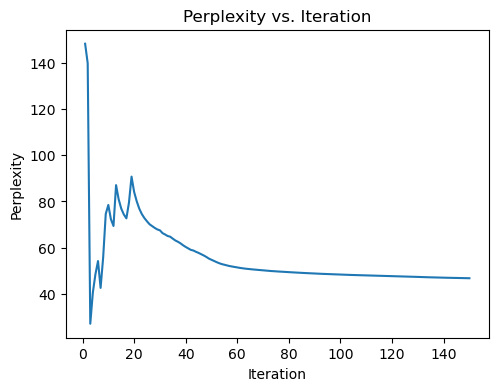  

執行每天處理20篇新聞 迭代 109  perplexity: 35.15  
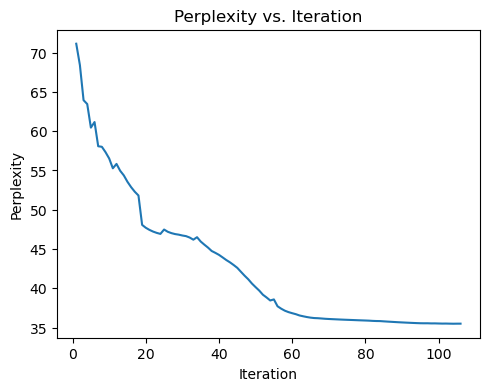




In [ ]:
import json
import logging
import sys
from enum import IntEnum
import matplotlib.pyplot as plt
import joblib
import pickle
import dill
from gensim import corpora  # 這是 gensim.corpora




# 設定 models 資料夾的路徑
models_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\CDL-LDA-master"
sys.path.append(models_path)
from corpora import CrossDomainCorpus
from models import *

logger = logging.getLogger(__name__)

# 定義 Domain 枚舉
class Domain(IntEnum):
    SOURCE = 0
    TARGET = 1

def process_word_freq_format(word_freq_list):
    """將 [index, frequency] 格式轉換為重複 index 的列表"""
    words = []
    for index, freq in word_freq_list:
        words.extend([index] * freq)
    return words

def load_corpus(source_path):
    """載入並分割源域和目標域數據"""
    # 載入所有數據
    with open(source_path, 'r', encoding='utf-8') as f:
        all_data = json.load(f)
    logger.info(f"已載入總數據，文檔數: {len(all_data)}")
    
    # 分離源域和目標域數據
    source_docs = []
    source_labels = []
    target_docs = []
    
    # 處理所有文檔
    for doc in all_data:
        if 'words' in doc and 'domain' in doc:
            processed_words = process_word_freq_format(doc['words'])
            
            if doc['domain'] == Domain.SOURCE:
                source_docs.append(processed_words)
                source_labels.append(int(doc['label']))
            elif doc['domain'] == Domain.TARGET:
                target_docs.append(processed_words)
    
    # 準備語料庫數據
    all_docs = source_docs + target_docs
    all_labels = source_labels + [-1] * len(target_docs)  # 目標域標籤設為 -1
    all_domains = [Domain.SOURCE] * len(source_docs) + [Domain.TARGET] * len(target_docs)


    # 創建語料庫
    corpus = CrossDomainCorpus("dataset1", all_docs, all_labels, all_domains)
    logger.info(f"已建立語料庫，源域文檔數: {len(source_docs)}, 目標域文檔數: {len(target_docs)}")
    
    return corpus, len(target_docs)

def main():
    # 設定檔案路徑
    source_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_processed_data_結巴_截50.json"
    target_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022~2023_截50.json"
    dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_dictionary_結巴_截50.dict"
    save_path= r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022~2023_截50.json"
    
    # 載入字典
    dictionary = corpora.Dictionary.load(dictionary_path)
    logger.info(f"已載入字典，詞彙量: {len(dictionary)}")
    
    # 載入語料庫
    corpus, target_count = load_corpus(source_path)

    # 初始化模型
    model = CdlLdaModel(corpus=corpus,id2word=dictionary,iterations=150,n_topics_c=7 )
    #載入之前訓練的模型

    # 載入已訓練好的模型
    #model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\models\best_model.pkl"

    #model = joblib.load(model_path,mmap_mode='r')
    
    #logger.info("已成功載入模型！")

    logger.info("開始訓練模型...")
    history = model.estimate( patience=3)


    # 進行預測
    pred_label = model.predict_label_probabilities()

    logger.info("預測完成！")

    # 建立 id 到標籤名稱的映射
    label_id_to_name = {
        0: '彩票',
        1: '房产',
        2: '时政',
        3: '社会',
        4: '科技',
        5: '股票',
        6: '财经'
    }
    # 輸出前五篇文章的預測機率分布
    logger.info("\n前五篇文章的預測機率分布:")
    for i in range(min(5, len(pred_label))):
        prob_str = ", ".join([f"{label_name}: {pred_label[i][label_id]:.3f}" 
                            for label_id, label_name in label_id_to_name.items()])
        logger.info(f"文章 {i+1} 的各類別機率: {prob_str}")

    # 檢查預測數量
    if len(pred_label) != target_count:
        raise ValueError(f"預測數量({len(pred_label)})與目標文檔數量({target_count})不符！")

    # 讀取目標文件
    with open(target_path, 'r', encoding='utf-8') as f:
        target_data = json.load(f)

    # 更新目標數據的標籤
    if len(target_data) != len(pred_label):
        raise ValueError(f"目標文件數量({len(target_data)})與預測數量({len(pred_label)})不符！")

    

    # 為每個文檔添加各標籤的預測機率
    for i, entry in enumerate(target_data):
        probabilities = pred_label[i]
        
        # 為每個標籤添加其機率值
        for label_id, label_name in label_id_to_name.items():
            # 確保機率值為 float 類型
            prob_value = float(probabilities[label_id])
            entry[f'{label_name}_概率'] = prob_value
    # 保存結果
    with open(save_path, 'w', encoding='utf-8') as f:
        json.dump(target_data, f, ensure_ascii=False, indent=4)
    
    logger.info(f'預測標籤已存入 {save_path}')
    logger.info(f'處理完成，共更新了 {len(pred_label)} 個文檔的分類標籤')
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history['iteration'], history['perplexity'])
    plt.title('Perplexity vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Perplexity')



if __name__ == '__main__':
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    main()

2025-02-13 22:49:36,287 : INFO : loading Dictionary object from C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2022_dictionary_結巴_截50.dict
2025-02-13 22:49:36,563 : INFO : Dictionary lifecycle event {'fname': 'C:\\Users\\walter\\OneDrive\\桌面\\收集\\大學nn專題\\股票分析\\鉅亨_2022_dictionary_結巴_截50.dict', 'datetime': '2025-02-13T22:49:36.563592', 'gensim': '4.3.3', 'python': '3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'loaded'}
2025-02-13 22:49:36,563 : INFO : 已載入字典，詞彙量: 573983
2025-02-13 22:49:42,910 : INFO : 已載入總數據，文檔數: 35600
2025-02-13 22:49:44,066 : INFO : 已建立語料庫，源域文檔數: 23500, 目標域文檔數: 12100


CrossDomainCorpus 訓練標籤範圍: {0, 1, 2, 3, 4, 5, 6}


2025-02-13 22:49:44,263 : INFO : Constructing CDL-LDA model with 7 common topics, 6 specific topics, alpha = 10.0, beta = 0.01, gamma_c = 1000.0, gamma_s = 1000.0, eta = 0.1, seed = 45
2025-02-13 22:49:44,376 : INFO : 開始訓練模型...
2025-02-13 22:49:44,377 : INFO : Initializing...
2025-02-13 22:52:32,726 : INFO : Initialization finished
2025-02-13 22:52:32,763 : INFO : Training CDL-LDA model on dataset1 dataset, 35597 documents, 150 iterations, update every 8 iter
2025-02-13 22:59:28,113 : INFO : Iteration 1/150, time: 393.88 s, perplexity: 241.92
2025-02-13 23:06:08,658 : INFO : Iteration 2/150, time: 799.63 s, perplexity: 195.80
2025-02-13 23:12:42,875 : INFO : Iteration 3/150, time: 1191.75 s, perplexity: 154.65
2025-02-13 23:19:13,090 : INFO : Iteration 4/150, time: 1585.04 s, perplexity: 152.42
2025-02-13 23:25:52,007 : INFO : Iteration 5/150, time: 1978.49 s, perplexity: 124.35
2025-02-13 23:32:24,067 : INFO : Iteration 6/150, time: 2368.87 s, perplexity: 74.32
2025-02-13 23:38:53,608

ValueError: 預測數量(12099)與目標文檔數量(12100)不符！

新聞分類觀察:  
在取50天，大多新聞都被分到彩票而失去判斷價值，部分因內容差異合理的分到正確標籤，部分沒有

#### 整理新聞佔比
處理每天各50(或20)篇新聞中標籤的平均占比


In [ ]:
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

# Function to convert ROC date to Gregorian date
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # Convert ROC year to AD year
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# 讀取新聞數據
with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_截50_迭3.json", 'r', encoding='utf-8') as f:
    news_data = json.load(f)

# 定義標籤列表
categories = ['彩票', '房产', '时政', '社会', '科技', '股票', '财经']

# 按日期分組並計算平均標籤機率
daily_stats = defaultdict(lambda: np.zeros(len(categories)))
daily_count = defaultdict(int)

for item in news_data:
    date = item['date']
    # 提取每個類別的概率
    probabilities = [item.get(f'{cat}_概率', 0) for cat in categories]
    
    # 累加概率
    daily_stats[date] += probabilities
    daily_count[date] += 1

# 計算每天的平均標籤機率
daily_percentages = {}
for date in daily_stats.keys():
    # 計算每個類別的平均概率
    avg_probabilities = daily_stats[date] / daily_count[date]
    #總和
    #avg_probabilities = daily_stats[date]

    # 創建包含類別佔比的字典
    percentages = {f"{cat}_佔比": avg_probabilities[i] for i, cat in enumerate(categories)}
    daily_percentages[date] = percentages

# 轉換為DataFrame
news_df = pd.DataFrame.from_dict(daily_percentages, orient='index')

# 讀取現有CSV
stock_df = pd.read_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\陽明海運_ATR.csv")

# 使用指定的日期格式來處理日期
stock_df['date'] = stock_df['日期'].apply(convert_date)
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d', errors='coerce')

# 確保 news_df 的索引是 datetime64[ns] 類型
news_df.index = pd.to_datetime(news_df.index, format='%Y-%m-%d', errors='coerce')

# 合併數據
result_df = pd.merge(stock_df, news_df, left_on='date', right_index=True, how='left')

# 保存結果
result_df.to_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\陽明海運_截50.csv", index=False)

每天新聞影響權重以指數進行衰減

In [ ]:
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

# Function to convert ROC date to Gregorian date
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # Convert ROC year to AD year
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# 讀取新聞數據
with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_截50_迭3.json", 'r', encoding='utf-8') as f:
    news_data = json.load(f)

# 定義標籤列表
categories = ['彩票', '房产', '时政', '社会', '科技', '股票', '财经']

# 定義控制衰減速率的參數 lambda
lambda_decay = 0.05  # 衰減速率，可以調整

# 按日期分組並計算加權標籤機率
daily_stats = defaultdict(lambda: np.zeros(len(categories)))

# 對每天的新聞進行處理，計算加權累計概率
news_by_date = defaultdict(list)

for item in news_data:
    date = item['date']
    # 提取每個類別的概率
    probabilities = [item.get(f'{cat}_概率', 0) for cat in categories]
    news_by_date[date].append(probabilities)

# 計算每天的加權標籤機率
for date, news_list in news_by_date.items():
    weighted_sum = np.zeros(len(categories))
    total_weight = 0

    # 對當天的每一條新聞按序列順序進行加權
    for i, probabilities in enumerate(news_list):
        weight = np.exp(-lambda_decay * i)  # 指數衰減權重
        weighted_sum += weight * np.array(probabilities)
        total_weight += weight
    
    # 將加權總和除以總權重，計算加權平均概率
    daily_stats[date] = weighted_sum / total_weight

# 將每日結果轉換為百分比格式
daily_percentages = {}
for date, weighted_probs in daily_stats.items():
    percentages = {f"{cat}_佔比": weighted_probs[i] for i, cat in enumerate(categories)}
    daily_percentages[date] = percentages

# 轉換為DataFrame
news_df = pd.DataFrame.from_dict(daily_percentages, orient='index')

# 讀取現有CSV
stock_df = pd.read_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_王品股票_ATR.csv")

# 使用指定的日期格式來處理日期
stock_df['date'] = stock_df['日期'].apply(convert_date)
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d', errors='coerce')

# 確保 news_df 的索引是 datetime64[ns] 類型
news_df.index = pd.to_datetime(news_df.index, format='%Y-%m-%d', errors='coerce')

# 合併數據
result_df = pd.merge(stock_df, news_df, left_on='date', right_index=True, how='left')

# 保存結果
result_df.to_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\王品_tfide=0.0015_截50.csv", index=False)


### LDA分類
#### 結巴斷詞

In [ ]:
import json
import jieba
import pandas as pd
from gensim import corpora, models
from tqdm import tqdm
jieba.set_dictionary(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\dict.txt.big")
# 檔案路徑
train_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023.json"
test_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
train_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json"
test_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_結巴.json"
train_log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運_lognormal_abs.csv"
test_log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_陽明海運_lognormal_abs.csv"
dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"

# TF-IDF 過濾門檻
low_value = 0.0015

def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(data, file_path):
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
    print(f"結果已儲存至: {file_path}")

def save_dictionary(dictionary, path):
    dictionary.save(path)
    print(f"字典已儲存至: {path}")

def tokenize_texts(texts):
    #return [list(jieba.cut(text,cut_all=False)) for text in tqdm(texts, desc="斷詞處理")]

    return [list(jieba.cut_for_search(text)) for text in tqdm(texts, desc="斷詞處理")]

def filter_tokens_by_tfidf(tokenized_corpus, dictionary, low_value):
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]
    tfidf = models.TfidfModel(corpus, id2word=dictionary)
    low_value_words = set()
    for bow in tqdm(corpus, desc="篩選低值詞"):
        low_value_words.update([token_id for token_id, value in tfidf[bow] if value < low_value])
    dictionary.filter_tokens(bad_ids=list(low_value_words))
    filtered_corpus = [[token for token in doc if token in dictionary.token2id] for doc in tokenized_corpus]
    return filtered_corpus, dictionary

def rebuild_final_texts(filtered_corpus, final_dictionary):
    return [[token for token in doc if token in final_dictionary.token2id] for doc in tqdm(filtered_corpus, desc="最終轉換")]

def categorize_atr(atr_values):
    quantiles = atr_values.quantile([0.25, 0.5, 0.75])
    def assign_category(value):
        if value <= quantiles[0.25]:
            return 0
        elif value <= quantiles[0.5]:
            return 1
        elif value <= quantiles[0.75]:
            return 2
        else:
            return 3
    return atr_values.apply(assign_category)




train_data = load_json(train_path)
test_data = load_json(test_path)




train_texts = [doc["content"] for doc in train_data if "content" in doc]
test_texts = [doc["content"] for doc in test_data if "content" in doc]

train_tokens = tokenize_texts(train_texts)
test_tokens = tokenize_texts(test_texts)

all_tokens = train_tokens + test_tokens
dictionary = corpora.Dictionary(all_tokens)

filtered_train, dictionary = filter_tokens_by_tfidf(train_tokens, dictionary, low_value)
filtered_test, dictionary = filter_tokens_by_tfidf(test_tokens, dictionary, low_value)

final_dictionary = corpora.Dictionary(filtered_train + filtered_test)
save_dictionary(final_dictionary, dictionary_path)

final_train_texts = rebuild_final_texts(filtered_train, final_dictionary)
final_test_texts = rebuild_final_texts(filtered_test, final_dictionary)
final_train_bow = [final_dictionary.doc2bow(doc) for doc in final_train_texts]
final_test_bow = [final_dictionary.doc2bow(doc) for doc in final_test_texts]




for doc, bow in zip(train_data, final_train_bow):
    doc["content"] = bow
for doc, bow in zip(test_data, final_test_bow):
    doc["content"] = bow
save_json(train_data, train_save_path)
save_json(test_data, test_save_path)


斷詞處理:   0%|          | 0/75774 [00:00<?, ?it/s]Building prefix dict from C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\dict.txt.big ...
Loading model from cache C:\Users\walter\AppData\Local\Temp\jieba.u618dbd8c41c0f8d3b381702721346091.cache
Loading model cost 1.068 seconds.
Prefix dict has been built successfully.
篩選低值詞: 100%|██████████| 31628/31628 [00:06<00:00, 4541.30it/s]


字典已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict


最終轉換: 100%|██████████| 31628/31628 [00:01<00:00, 19799.93it/s]


結果已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json
結果已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_結巴.json


#### 模型訓練  
拿2021~2024年新聞來訓練LDA模型，以coherence判斷最適合的主題數，得到最適合主題數的模型


In [ ]:
import json
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# ===== 設定檔案路徑 =====
train_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json"
dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
lda_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_LDA_model"

# ===== 讀取 JSON 檔案 =====
def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# ===== LDA 主題數測試 =====
def find_optimal_topics(dictionary, corpus, texts, start=6, end=6):
    """測試不同主題數並選擇最佳的 LDA 模型"""
    best_num_topics = start
    best_coherence = -100
    best_model = None
    y = []
    
    for num_topics in range(start, end + 1):
        print(f"🔄 測試 {num_topics} 個主題...")
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_score = coherence_model.get_coherence()
        print(f"主題數: {num_topics}, Coherence: {coherence_score}")
        y.append(coherence_score)
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_num_topics = num_topics
            best_model = lda_model

    
    print(f"✅ 最佳主題數: {best_num_topics}, Coherence: {best_coherence}")
    return best_model, best_num_topics, y

# ===== 讀取已處理好的字典與數據 =====
print("📂 載入字典...")
dictionary = corpora.Dictionary.load(dictionary_path)

print("📂 載入處理後的訓練數據...")
bow_corpus_train = [doc["content"] for doc in load_json(train_path)]

# 轉換回 tuple 格式 (因為 JSON 存的是 list of lists)
bow_corpus_train = [[tuple(pair) for pair in doc] for doc in bow_corpus_train]

# 透過 dictionary 將 word_id 轉回對應的詞，還原 texts
texts = [[dictionary[id] for id, _ in doc] for doc in bow_corpus_train]  
# 確保 bow_corpus_train 是 list of lists，包含 (word_id, count)
bow_corpus_train = [[tuple(pair) for pair in doc] for doc in bow_corpus_train]

# 檢查 bow_corpus_train 是否為空
if not bow_corpus_train or all(len(doc) == 0 for doc in bow_corpus_train):
    raise ValueError("❌ bow_corpus_train 為空，請確認 JSON 內容正確。")

# 將 word_id 轉回詞，確保 texts 不為空
texts = [[dictionary[word_id] for word_id, _ in doc if word_id in dictionary] for doc in bow_corpus_train]

# 檢查 texts 是否為空
if not texts or all(len(doc) == 0 for doc in texts):
    raise ValueError("❌ texts 為空，請確認 dictionary 是否與 bow_corpus_train 相匹配。")

# ===== 執行 LDA 訓練 =====
start = 40
end = 50
lda_model, optimal_topics, y = find_optimal_topics(dictionary, bow_corpus_train, texts, start=start, end=end)

# 儲存 LDA 模型
lda_model.save(lda_model_path)
print(f"✅ 最佳 LDA 模型已儲存至: {lda_model_path}")

# ===== 繪製 Coherence 分數圖 =====
x = list(range(start, end + 1))
plt.plot(x, y, marker='o')
plt.xlabel("Topic Number")
plt.ylabel("Coherence")
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title("Topic Number vs. Coherence")
plt.show()


📂 載入字典...
📂 載入處理後的訓練數據...


MemoryError: 

📂 載入字典...
📂 載入處理後的訓練數據...
✅ corpus 可以被 pickle
✅ dictionary 可以被 pickle
🔄 測試 41 個主題...
主題數: 41, Coherence: 0.6574618747178672
✅ corpus 可以被 pickle
✅ dictionary 可以被 pickle
🔄 測試 42 個主題...
主題數: 42, Coherence: 0.6461254334608939
✅ corpus 可以被 pickle
✅ dictionary 可以被 pickle
🔄 測試 43 個主題...
主題數: 43, Coherence: 0.6784667937756318
✅ corpus 可以被 pickle
✅ dictionary 可以被 pickle
🔄 測試 44 個主題...
主題數: 44, Coherence: 0.6530247376664315
✅ 最佳主題數: 43, Coherence: 0.6784667937756318
✅ 最佳 LDA 模型已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_LDA_model


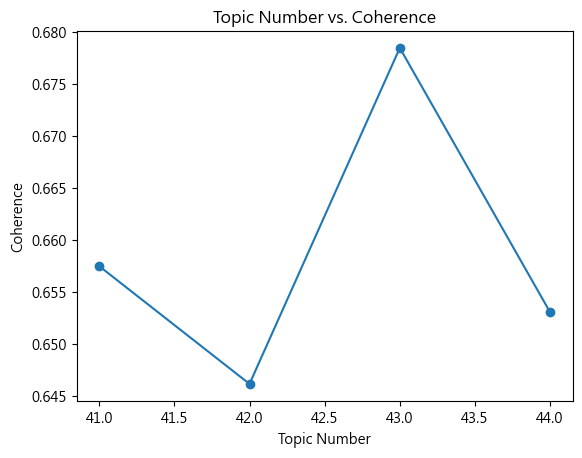

In [ ]:
import json
from gensim import corpora
from gensim.models import LdaMulticore, CoherenceModel
import matplotlib.pyplot as plt
from multiprocessing import cpu_count

# ===== 設定檔案路徑 =====
train_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json"
dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
lda_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_LDA_model"

# ===== 讀取 JSON 檔案 =====
def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# ===== LDA 主題數測試 =====
def find_optimal_topics(dictionary, corpus, texts, start=6, end=6):
    """測試不同主題數並選擇最佳的 LDA 模型"""
    best_num_topics = start
    best_coherence = -100
    y = []
    
    for num_topics in range(start, end + 1):
        import pickle

        # 測試 corpus 是否可 pickle
        try:
            pickle.dumps(corpus)
            print("✅ corpus 可以被 pickle")
        except Exception as e:
            print("❌ corpus 不能被 pickle:", e)

        # 測試 dictionary 是否可 pickle
        try:
            pickle.dumps(dictionary)
            print("✅ dictionary 可以被 pickle")
        except Exception as e:
            print("❌ dictionary 不能被 pickle:", e)

        print(f"🔄 測試 {num_topics} 個主題...")
        lda_model = LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42,workers=cpu_count()-1,chunksize=500,  # 降低 chunk size 減少 RAM 佔用
        batch=False  # 禁用批量加速，降低記憶體負擔  # 依照 CPU 核心數調整
         )
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence="c_v")
        coherence_score = coherence_model.get_coherence()
        print(f"主題數: {num_topics}, Coherence: {coherence_score}")
        y.append(coherence_score)
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_num_topics = num_topics
            lda_model.save(lda_model_path)
        del lda_model
    print(f"✅ 最佳主題數: {best_num_topics}, Coherence: {best_coherence}")
    return best_num_topics, y
if __name__ == "__main__":

    # ===== 讀取已處理好的字典與數據 =====
    print("📂 載入字典...")
    dictionary = corpora.Dictionary.load(dictionary_path)

    print("📂 載入處理後的訓練數據...")
    bow_corpus_train = [doc["content"] for doc in load_json(train_path)]

    # 轉換回 tuple 格式 (因為 JSON 存的是 list of lists)
    bow_corpus_train = [[tuple(pair) for pair in doc] for doc in bow_corpus_train]

    # 透過 dictionary 將 word_id 轉回對應的詞，還原 texts
    texts = [[dictionary[id] for id, _ in doc] for doc in bow_corpus_train]  
    # 確保 bow_corpus_train 是 list of lists，包含 (word_id, count)
    bow_corpus_train = [[tuple(pair) for pair in doc] for doc in bow_corpus_train]

    # 檢查 bow_corpus_train 是否為空
    if not bow_corpus_train or all(len(doc) == 0 for doc in bow_corpus_train):
        raise ValueError("❌ bow_corpus_train 為空，請確認 JSON 內容正確。")

    # 將 word_id 轉回詞，確保 texts 不為空
    texts = [[dictionary[word_id] for word_id, _ in doc if word_id in dictionary] for doc in bow_corpus_train]

    # 檢查 texts 是否為空
    if not texts or all(len(doc) == 0 for doc in texts):
        raise ValueError("❌ texts 為空，請確認 dictionary 是否與 bow_corpus_train 相匹配。")

    # ===== 執行 LDA 訓練 =====
    start = 41
    end = 44
    optimal_topics, y = find_optimal_topics(dictionary, bow_corpus_train, texts, start=start, end=end)

    # 儲存 LDA 模型
    print(f"✅ 最佳 LDA 模型已儲存至: {lda_model_path}")

    # ===== 繪製 Coherence 分數圖 =====
    x = list(range(start, end + 1))
    plt.plot(x, y, marker='o')
    plt.xlabel("Topic Number")
    plt.ylabel("Coherence")
    plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
    plt.rcParams["axes.unicode_minus"] = False
    plt.title("Topic Number vs. Coherence")
    plt.show()


####　了解各主題的分類

In [ ]:
import json
from gensim import corpora
from gensim.models import LdaModel

# ===== 讀取 JSON 檔案 =====
def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

def get_top_words(lda_model, num_topics, num_words=10):
    """獲取 LDA 模型中每個主題的前 num_words 個關鍵詞"""
    topics = lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=False)
    topic_words = {f"Topic {i}": [word for word, _ in words] for i, words in topics}
    return topic_words

# 設定 LDA 模型與詞典路徑
dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
lda_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_LDA_model_20"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\LDA_主題關鍵詞.json"

# 載入詞典與 LDA 模型
dictionary = corpora.Dictionary.load(dictionary_path)
lda_model = LdaModel.load(lda_model_path)

# 獲取主題的前 10 個關鍵詞
top_words = get_top_words(lda_model, lda_model.num_topics, num_words=50)

# 儲存結果為 JSON
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(top_words, f, ensure_ascii=False, indent=4)

print(f"✅ 各主題的前 50 個關鍵詞已儲存至: {output_path}")


✅ 各主題的前 50 個關鍵詞已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\LDA_主題關鍵詞.json


#### 反推2024新聞的分類

In [85]:
import json
import jieba
from tqdm import tqdm
from gensim import corpora
from gensim.models import LdaModel

def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(filepath, data):
    """儲存 JSON 檔案"""
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

def tokenize_texts(texts):
    """使用 jieba 進行斷詞 (精確模式)"""
    tokenized_corpus = []
    for text in tqdm(texts, desc="斷詞處理"):
        tokens = list(jieba.cut(text, cut_all=False))
        tokenized_corpus.append(tokens)
    return tokenized_corpus

# 設定測試數據 JSON 檔案與相關路徑
test_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_p關鍵字權重.json"
save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_p關鍵字權重.json"

dictionary_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
lda_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_LDA_model"

# 載入詞典與 LDA 模型
dictionary = corpora.Dictionary.load(dictionary_path)
lda_model = LdaModel.load(lda_model_path)

# 讀取測試新聞內容
data_test = load_json(test_path)
data_save=load_json(save_path)


# ===== 讀取已處理好的字典與數據 =====

print("📂 載入處理後的訓練數據...")
bow_corpus_test = [doc["content"] for doc in load_json(test_path)]

# 轉換回 tuple 格式 (因為 JSON 存的是 list of lists)
bow_corpus_test = [[tuple(pair) for pair in doc] for doc in bow_corpus_test]



# 主題對應名稱設定
topic_map = {
   0:"台股市場與基本面趨勢",
    1:"伺服器與電子零組件產業",
    2:"零售與消費市場",
    3:"加密貨幣與數位資產投資",
    4:"半導體與晶片製造產業",
    5:"政府與政治監管",
    6:"資產管理與固定收益投資",
    7:"醫療與製藥產業",
    8:"太空科技與低軌衛星",
    9:"美股與宏觀經濟指標",
    10:"能源與油價走勢",
    11:"製造業廠房建設與產能擴充",
    12:"通用討論與雜項詞彙",
    13:"面板與顯示器產業",
    14:"國際貿易與全球供應鏈",
    15:"航空與航太業",
    16:"期貨與衍生品交易",
    17:"產業轉型與創新科技",
    18:"房地產與疫情防控",
    19:"宏觀經濟與貨幣政策",
    20:"證券監管與上市規範",
    21:"企業治理與併購動向",
    22:"旅遊與休閒消費服務",
    23:"鋼鐵及原物料價格調整",
    24:"出口訂單與經濟景氣指標",
    25:"智慧科技與行動通訊創新",
    26:"電動汽車與新能源市場",
    27:"工具機與工業設備產業",
    28:"航運物流與全球供應鏈",
    29:"企業財報與業績表現",
    30:"金融股利與財務表現",
    31:"台灣房地產與住宅市場",
    32:"台股交易與資金流向",
    33:"財政稅收與補貼政策",
    34:"銀行與金融服務業",
    35:"企業營收與獲利表現",
    36:"電子消費產品與零組件",
    37:"再生能源與綠能發展",
    38:"台股投資分析與操作策略",
    39:"亞洲金融市場與企業動態",
    40:"經營統計與業績規模紀錄",
    41:"保險與風險保障服務",
    42:"科技巨頭與股價評估"
}

print("🔄 生成測試新聞的主題機率分佈...")
for i, bow in enumerate(bow_corpus_test):
    # 取得每筆新聞的主題分佈 (list of (topic_id, prob))
    topic_distribution = lda_model.get_document_topics(bow)
    # 初始化每個主題的分佈為 0
    named_distribution = {name: 0 for name in topic_map.values()}
    # 填入實際的分數，並將數值轉換成 Python 原生 float
    for topic_id, prob in topic_distribution:
        if topic_id in topic_map:
            named_distribution[topic_map[topic_id]] = float(prob)
    # 將對應的主題名稱與分佈占比加入新聞資料中
    data_save[i]["topic_distribution"] = named_distribution

# 儲存帶有主題分佈的新聞 JSON
save_json(save_path, data_save)
print(f"✅ 測試新聞主題機率分佈已儲存至: {save_path}")


📂 載入處理後的訓練數據...
🔄 生成測試新聞的主題機率分佈...
✅ 測試新聞主題機率分佈已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_p關鍵字權重.json


####　處理每日新聞占比

In [4]:
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

# Function to convert ROC date to Gregorian date
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # Convert ROC year to AD year
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# 讀取新聞數據（前面輸出的檔案，其中每筆新聞包含 "date" 與 "topic_distribution" 欄位）
with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p關鍵字權重.json", 'r', encoding='utf-8') as f:
    news_data = json.load(f)

# 定義主題列表，需與前面輸出的主題名稱一致
categories = [
   "台股市場與基本面趨勢",
    "伺服器與電子零組件產業",
    "零售與消費市場",
    "加密貨幣與數位資產投資",
    "半導體與晶片製造產業",
    "政府與政治監管",
    "資產管理與固定收益投資",
    "醫療與製藥產業",
    "太空科技與低軌衛星",
    "美股與宏觀經濟指標",
    "能源與油價走勢",
    "製造業廠房建設與產能擴充",
    "面板與顯示器產業",
    "國際貿易與全球供應鏈",
    "航空與航太業",
    "期貨與衍生品交易",
    "產業轉型與創新科技",
    "房地產與疫情防控",
    "宏觀經濟與貨幣政策",
    "證券監管與上市規範",
    "企業治理與併購動向",
    "旅遊與休閒消費服務",
    "鋼鐵及原物料價格調整",
    "出口訂單與經濟景氣指標",
    "智慧科技與行動通訊創新",
    "電動汽車與新能源市場",
    "工具機與工業設備產業",
    "航運物流與全球供應鏈",
    "企業財報與業績表現",
    "金融股利與財務表現",
    "台灣房地產與住宅市場",
    "台股交易與資金流向",
    "財政稅收與補貼政策",
    "銀行與金融服務業",
    "企業營收與獲利表現",
    "電子消費產品與零組件",
    "再生能源與綠能發展",
    "台股投資分析與操作策略",
    "亞洲金融市場與企業動態",
    "經營統計與業績規模紀錄",
    "保險與風險保障服務",
    "科技巨頭與股價評估"
]
# 按日期分組並計算每日各主題的累計概率
daily_stats = defaultdict(lambda: np.zeros(len(categories)))
daily_count = defaultdict(int)

for item in news_data:
    # 讀取新聞的日期，請確認這個欄位名稱與格式正確
    date = item['date']
    # 從新聞中讀取主題分佈（應為字典，鍵為主題名稱）
    topic_dist = item.get("topic_distribution", {})
    # 依照 categories 順序取得各主題的概率，若無值則預設為 0
    probabilities = [float(topic_dist.get(cat, 0)) for cat in categories]
    
    # 累加各主題的概率
    daily_stats[date] += probabilities
    daily_count[date] += 1

# 計算每天的平均主題占比
daily_percentages = {}
for date in daily_stats.keys():
    avg_probabilities = daily_stats[date] / daily_count[date]
    percentages = {f"{cat}": avg_probabilities[i] for i, cat in enumerate(categories)}
    daily_percentages[date] = percentages

# 將每日主題占比轉換為 DataFrame
news_df = pd.DataFrame.from_dict(daily_percentages, orient='index')
news_df.index.name = 'date'
news_df.reset_index(inplace=True)

# 讀取現有股票 CSV 數據
stock_df = pd.read_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_lognormal_abs.csv")

# 依照指定的 ROC 日期格式處理日期
stock_df['date'] = stock_df['日期']
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d', errors='coerce')

# 確保 news_df 的日期欄位為 datetime 型態
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d', errors='coerce')

# 合併股票數據與新聞每日主題占比，依日期對應
result_df = pd.merge(stock_df, news_df, on='date', how='left')

# 保存合併後的結果到 CSV 檔
result_df.to_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_平.csv", index=False)


每天新聞影響權重以指數進行衰減

In [16]:
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

# Function to convert ROC date to Gregorian date
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # Convert ROC year to AD year
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# 讀取新聞數據（前面輸出的檔案，其中每筆新聞包含 "date" 與 "topic_distribution" 欄位）
with open(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p關鍵字權重.json", 'r', encoding='utf-8') as f:
    news_data = json.load(f)

# 定義主題列表，需與前面輸出的主題名稱一致
categories = [
   "台股市場與基本面趨勢",
    "伺服器與電子零組件產業",
    "零售與消費市場",
    "加密貨幣與數位資產投資",
    "半導體與晶片製造產業",
    "政府與政治監管",
    "資產管理與固定收益投資",
    "醫療與製藥產業",
    "太空科技與低軌衛星",
    "美股與宏觀經濟指標",
    "能源與油價走勢",
    "製造業廠房建設與產能擴充",
    "面板與顯示器產業",
    "國際貿易與全球供應鏈",
    "航空與航太業",
    "期貨與衍生品交易",
    "產業轉型與創新科技",
    "房地產與疫情防控",
    "宏觀經濟與貨幣政策",
    "證券監管與上市規範",
    "企業治理與併購動向",
    "旅遊與休閒消費服務",
    "鋼鐵及原物料價格調整",
    "出口訂單與經濟景氣指標",
    "智慧科技與行動通訊創新",
    "電動汽車與新能源市場",
    "工具機與工業設備產業",
    "航運物流與全球供應鏈",
    "企業財報與業績表現",
    "金融股利與財務表現",
    "台灣房地產與住宅市場",
    "台股交易與資金流向",
    "財政稅收與補貼政策",
    "銀行與金融服務業",
    "企業營收與獲利表現",
    "電子消費產品與零組件",
    "再生能源與綠能發展",
    "台股投資分析與操作策略",
    "亞洲金融市場與企業動態",
    "經營統計與業績規模紀錄",
    "保險與風險保障服務",
    "科技巨頭與股價評估"
]


# 按日期分組並計算每日各主題的累計概率（加入指數衰減權重）
daily_stats = defaultdict(lambda: np.zeros(len(categories)))

# 控制衰減速度的參數 lambda
lambda_decay = 0.05  # 衰減速度（可以調整，越大衰減越快）

for item in news_data:
    # 讀取新聞的日期，請確認這個欄位名稱與格式正確
    date = item['date']
    # 從新聞中讀取主題分佈（應為字典，鍵為主題名稱）
    topic_dist = item.get("topic_distribution", {})
    # 依照 categories 順序取得各主題的概率，若無值則預設為 0
    probabilities = [float(topic_dist.get(cat, 0)) for cat in categories]

    # 新聞的序列權重（新聞按日期順序處理，每天從 1 到 N 排序）
    if date not in daily_stats:
        daily_count = 0  # 新的日期重新開始計算新聞序列
    else:
        daily_count += 1  # 當天新聞的序列（0, 1, 2, ...）
    
    weight = np.exp(-lambda_decay * daily_count)  # 計算指數衰減權重
    daily_stats[date] += weight * np.array(probabilities)  # 累加加權後的主題概率

# 計算每天的加權主題占比（每一天的累計概率不再直接平均，而是基於加權值）
daily_percentages = {}
for date, weighted_probs in daily_stats.items():
    percentages = {f"{cat}": weighted_probs[i] for i, cat in enumerate(categories)}
    daily_percentages[date] = percentages

# 將每日主題占比轉換為 DataFrame
news_df = pd.DataFrame.from_dict(daily_percentages, orient='index')
news_df.index.name = 'date'
news_df.reset_index(inplace=True)

# 讀取現有股票 CSV 數據
stock_df = pd.read_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運_lognormal_abs.csv")

# 依照指定的 ROC 日期格式處理日期
stock_df['date'] = stock_df['日期']
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d', errors='coerce')

# 確保 news_df 的日期欄位為 datetime 型態
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d', errors='coerce')

# 合併股票數據與新聞每日主題占比，依日期對應
result_df = pd.merge(stock_df, news_df, on='date', how='left')

# 保存合併後的結果到 CSV 檔
result_df.to_csv(r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運_前後.csv", index=False)


## 句向量化
### 微調

In [ ]:
import json
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset
import os
from sentence_transformers import SentenceTransformer


# 設定本地 FinBERT 模型路徑
model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model"

# 載入 tokenizer & 模型
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForMaskedLM.from_pretrained(model_path)

# 讀取 2021~2023 年的新聞 JSON
train_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023.json"
with open(train_path, "r", encoding="utf-8") as f:
    data_train = json.load(f)

# 只取新聞內容
texts_train = [article.get("content", "") for article in data_train if "content" in article]

# 轉換為 Hugging Face Dataset
dataset = Dataset.from_dict({"text": texts_train})

# **修正 Tokenization，確保包含 `labels`**
def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=512
    )
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy()  # 設定 labels
    return tokenized_inputs

# 應用 tokenizer
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

# 🔍 檢查輸出是否包含 `input_ids` 和 `labels`
print(tokenized_datasets[0])  # 確保 `input_ids`, `attention_mask`, `labels` 都有

# 設定 Data Collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

# **修正 TrainingArguments**
training_args = TrainingArguments(
    output_dir="finbert-chinese-mlm-finetuned",
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    num_train_epochs=1,
    logging_dir=r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs",
    remove_unused_columns=False  # 🔥 **關鍵修改**
)

# 訓練模型
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    data_collator=data_collator
)

trainer.train()  # 🚀 啟動訓練


# 確保目錄存在
os.makedirs(model_path, exist_ok=True)

# 儲存微調後的 FinBERT
print(f"🔄 正在儲存微調後的 FinBERT 到: {model_path} ...")
model.save_pretrained(model_path)

# 儲存 tokenizer（確保後續使用相同的 tokenizer）
tokenizer = AutoTokenizer.from_pretrained("shibing624/text2vec-finance-chinese")  # 使用原始 tokenizer
tokenizer.save_pretrained(model_path)

print(f"✅ FinBERT (微調後) 已儲存至: {model_path}")

Some weights of ErnieForMaskedLM were not initialized from the model checkpoint at C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model and are newly initialized: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/75774 [00:00<?, ? examples/s]

{'input_ids': [1, 126, 245, 1467, 19647, 295, 1546, 182, 347, 19670, 19497, 413, 289, 19501, 19477, 299, 17, 589, 136, 903, 139, 426, 39, 1467, 19647, 127, 1327, 1572, 19507, 2876, 1962, 139, 1488, 735, 19616, 29, 19480, 17098, 64, 508, 208, 139, 197, 496, 19526, 19506, 634, 19479, 5140, 9481, 19531, 8, 9170, 9486, 119, 19594, 19616, 370, 19808, 89, 19517, 144, 127, 1327, 1572, 571, 127, 1327, 1572, 1467, 19647, 19480, 17098, 344, 620, 265, 451, 1204, 299, 17, 589, 268, 884, 136, 1134, 19759, 107, 1201, 741, 19477, 17732, 16659, 20054, 19543, 19615, 17, 97, 136, 102, 69, 19466, 19474, 19467, 1349, 1467, 19647, 127, 1327, 1572, 120, 1369, 63, 44, 1467, 19647, 1184, 322, 19543, 294, 19549, 7256, 19701, 183, 19480, 17098, 344, 620, 19480, 17098, 64, 197, 496, 1467, 19647, 127, 1327, 1572, 173, 5, 1103, 14560, 119, 19594, 618, 39, 19671, 137, 871, 19494, 566, 19584, 19507, 19578, 19478, 119, 19489, 19480, 17098, 205, 17115, 1488, 268, 299, 17, 768, 136, 1962, 139, 19616, 29, 1488, 735, 195

FailedPreconditionError: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs is not a directory

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import shutil
import os
import os
log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs"

# 檢查 `logs/` 是否真的是資料夾
if os.path.exists(log_path):
    if not os.path.isdir(log_path):
        print(f"⚠️ {log_path} 不是一個資料夾，刪除它...")
        os.remove(log_path)  # 刪除錯誤的 `logs/`
        os.makedirs(log_path, exist_ok=True)  # 重新建立資料夾
    else:
        print(f"✅ {log_path} 已存在且為資料夾")
else:
    os.makedirs(log_path, exist_ok=True)
    print(f"📁 已建立新的 {log_path} 資料夾")


log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs"
writer = SummaryWriter(log_path)
writer.add_scalar("test_metric", 1.0, 0)
writer.close()


✅ C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs 已存在且為資料夾


FailedPreconditionError: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model\logs is not a directory

### 預測

In [ ]:
import json
import torch
from tqdm import tqdm
from sentence_transformers import SentenceTransformer

def load_json(filepath):
    """讀取 JSON 檔案"""
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(filepath, data):
    """儲存 JSON 檔案"""
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# 設定測試數據 JSON 檔案與相關路徑
test_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
output_path = test_path

# 設定微調後的 FinBERT 模型路徑
#fine_tuned_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\finbert-chinese-finetuned"
fine_tuned_model_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model"


# 嘗試加載微調後的模型
try:
    print(f"🔄 嘗試加載微調後的 FinBERT 模型: {fine_tuned_model_path} ...")
    model = SentenceTransformer(fine_tuned_model_path)
    print("✅ 微調後的 FinBERT 成功加載！")
except Exception as e:
    print(f"❌ 加載微調模型失敗: {e}")
    print("⚠️ 請確保模型已微調並正確存儲，或改用預設 FinBERT")
    model = SentenceTransformer("shibing624/text2vec-finance-chinese")

# 檢查是否可用 GPU，加速推理
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(f"🔄 設備: {device}")

# 讀取測試新聞內容
data_test = load_json(test_path)
texts_test = [article.get("content", "") for article in data_test if "content" in article]

# 🔄 轉換新聞內容為句向量
print("🔄 轉換新聞內容為 FinBERT 句向量...")
embeddings_test = []
for text in tqdm(texts_test, desc="處理新聞"):
    embedding = model.encode(text, convert_to_tensor=False)  # 轉換為句向量 (768 維)
    embeddings_test.append(embedding.tolist())

# 🔄 將向量加入 JSON 中
for i, embedding in enumerate(embeddings_test):
    data_test[i]["embedding"] = embedding

# 儲存帶有句向量的新聞 JSON
save_json(output_path, data_test)
print(f"✅ 測試新聞句向量已儲存至: {output_path}")


No sentence-transformers model found with name C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model. Creating a new one with mean pooling.


🔄 嘗試加載微調後的 FinBERT 模型: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_model ...
✅ 微調後的 FinBERT 成功加載！
🔄 設備: cuda
🔄 轉換新聞內容為 FinBERT 句向量...


處理新聞: 100%|██████████| 28124/28124 [45:10<00:00, 10.37it/s] 


✅ 測試新聞句向量已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json


#### 指數加權

In [ ]:
import json
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime
import os

# 設定文件路徑
news_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
stock_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_王品股票_ATR.csv"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\王品_FinBERT.csv"

# 指數衰減參數
lambda_decay = 0.05  # 越大衰減越快

# 讀取新聞數據
with open(news_path, 'r', encoding='utf-8') as f:
    news_data = json.load(f)

# 使用 defaultdict 儲存每天的加權新聞向量
daily_vectors = defaultdict(lambda: np.zeros(768))  # FinBERT 768 維向量

# 處理新聞數據，按日期加權累積向量
for item in news_data:
    date = item.get("date")
    embedding = item.get("embedding", [])

    if date and embedding:
        embedding = np.array(embedding)  # 轉換為 numpy 陣列
        
        # 確保當天新聞累積次數（用於指數衰減計算）
        if date not in daily_vectors:
            daily_count = 0
        else:
            daily_count += 1
        
        # 計算指數衰減權重
        weight = np.exp(-lambda_decay * daily_count)
        
        # 累積加權向量
        daily_vectors[date] += weight * embedding

# 轉換成 DataFrame，儲存每天的新聞向量
daily_vectors_df = pd.DataFrame.from_dict(daily_vectors, orient='index')
daily_vectors_df.index.name = 'date'
daily_vectors_df.reset_index(inplace=True)

# 讀取 ATR 股票數據
stock_df = pd.read_csv(stock_path)

# 轉換 ROC 日期格式為西元日期
def convert_date(date_str):
    """將 ROC 年轉換為西元年 (民國轉西元)"""
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 轉換為西元年
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# 處理日期格式
stock_df['date'] = stock_df['日期'].apply(convert_date)
stock_df['date'] = pd.to_datetime(stock_df['date'], format='%Y-%m-%d', errors='coerce')
daily_vectors_df['date'] = pd.to_datetime(daily_vectors_df['date'], format='%Y-%m-%d', errors='coerce')

# 合併新聞向量與股票 ATR 數據
result_df = pd.merge(stock_df, daily_vectors_df, on='date', how='left')

# 儲存結果
result_df.to_csv(output_path, index=False)

print(f"✅ 每日新聞向量已儲存至: {output_path}")


✅ 每日新聞向量已儲存至: C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\王品_FinBERT.csv


# 為新聞找加權值

In [17]:
import pandas as pd
import json
from gensim import corpora


# 檔案路徑
train_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json"
test_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_結巴.json"
train_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
test_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2024~2025_結巴.json"
train_log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_lognormal_abs.csv"
test_log_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_大盤_lognormal_abs.csv"

def categorize_atr(atr_values):
    # 確保沒有 NaN 值
    atr_values = atr_values.dropna()
    
    # 計算量化分位數
    quantiles = atr_values.quantile([0.45, 0.55])
    
    def assign_category(value):
        if value <= quantiles[0.45]:
            return 0
        elif value <= quantiles[0.55]:
            return 1
        
        else:
            return 2
    
    return atr_values.apply(assign_category)

def load_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(data, file_path):
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
    print(f"結果已儲存至: {file_path}")

# 讀取 JSON 文件
train_data = load_json(train_path)
test_data = load_json(test_path)

# 讀取 CSV
train_log_data = pd.read_csv(train_log_path)
test_log_data = pd.read_csv(test_log_path)

# 確保日期欄位名稱統一
if "日期" in train_log_data.columns:
    train_log_data.rename(columns={"日期": "date"}, inplace=True)
if "日期" in test_log_data.columns:
    test_log_data.rename(columns={"日期": "date"}, inplace=True)

# 轉換 "date" 為 datetime 格式
train_log_data["date"] = pd.to_datetime(train_log_data["date"], errors="coerce")
test_log_data["date"] = pd.to_datetime(test_log_data["date"], errors="coerce")

# 確保 "開盤價_lognormal_abs" 是數值類型
train_log_data["開盤指數_lognormal_abs"] = pd.to_numeric(train_log_data["開盤指數_lognormal_abs"], errors="coerce")
test_log_data["開盤指數_lognormal_abs"] = pd.to_numeric(test_log_data["開盤指數_lognormal_abs"], errors="coerce")

# 刪除 NaN，確保資料完整
train_log_data = train_log_data.dropna(subset=["date", "開盤指數_lognormal_abs"])
test_log_data = test_log_data.dropna(subset=["date", "開盤指數_lognormal_abs"])

def find_recent_atr_for_all_days(log_data, all_dates):
    log_data = log_data.sort_values(by="date")  # 按照日期排序
    recent_atr_dict = {}

    for current_date in all_dates:
        # 找到 "當前日期之後" 最近的一天的 "開盤價_lognormal_abs"
        future_values = log_data[log_data["date"] > current_date]["開盤指數_lognormal_abs"]
        if not future_values.empty:
            recent_value = future_values.iloc[0]
            recent_atr_dict[current_date] = recent_value
        # 如果沒有未來的開盤價，忽略該天
        else:
            print(f"⚠️ 忽略日期 {current_date}，因為沒有未來的開盤價")

    return recent_atr_dict



# 獲取所有日期
train_all_dates = pd.to_datetime([doc["date"] for doc in train_data], errors="coerce").strftime('%Y-%m-%d').unique()
test_all_dates = pd.to_datetime([doc["date"] for doc in test_data], errors="coerce").strftime('%Y-%m-%d').unique()

# 找出每一天的最近開盤價
recent_train_log_dict = find_recent_atr_for_all_days(train_log_data, train_all_dates)
recent_test_log_dict = find_recent_atr_for_all_days(test_log_data, test_all_dates)

# 使用 categorize_atr 轉換 "最近開盤價_lognormal_abs" 為 "開盤價_level"
recent_train_log_series = pd.Series(recent_train_log_dict)
recent_train_log_series = recent_train_log_series.dropna()  # 確保沒有 NaN 值
recent_train_log_label = categorize_atr(recent_train_log_series)

recent_test_log_series = pd.Series(recent_test_log_dict)
recent_test_log_series = recent_test_log_series.dropna()  # 確保沒有 NaN 值
recent_test_log_label = categorize_atr(recent_test_log_series)

# 更新 train_data 中的 log_level
for doc in train_data:
    atr_value = recent_train_log_label.get(doc["date"], None)
    if atr_value is None:
        print(f"⚠️ 警告：日期 {doc['date']} 沒有對應的 ATR_level，請檢查 recent_atr_dict！")
    doc["log_level"] = int(atr_value) if atr_value is not None else None

# 更新 test_data 中的 log_level
for doc in test_data:
    atr_value = recent_test_log_label.get(doc["date"], None)
    if atr_value is None:
        print(f"⚠️ 警告：日期 {doc['date']} 沒有對應的 ATR_level，請檢查 recent_atr_dict！")
    doc["log_level"] = int(atr_value) if atr_value is not None else None

# 更新 JSON 檔案
for doc in train_data:
    doc["開盤指數_lognormal_abs"] = recent_train_log_dict.get(doc["date"], None)
for doc in test_data:
    doc["開盤指數_lognormal_abs"] = recent_test_log_dict.get(doc["date"], None)

# 儲存處理後的 JSON
save_json(train_data, train_save_path)
save_json(test_data, test_save_path)

⚠️ 忽略日期 2023-12-27，因為沒有未來的開盤價
⚠️ 忽略日期 2023-12-28，因為沒有未來的開盤價
⚠️ 忽略日期 2023-12-29，因為沒有未來的開盤價
⚠️ 忽略日期 2023-12-30，因為沒有未來的開盤價
⚠️ 忽略日期 2023-12-31，因為沒有未來的開盤價
⚠️ 忽略日期 2024-12-27，因為沒有未來的開盤價
⚠️ 忽略日期 2024-12-28，因為沒有未來的開盤價
⚠️ 忽略日期 2024-12-29，因為沒有未來的開盤價
⚠️ 忽略日期 2024-12-30，因為沒有未來的開盤價
⚠️ 忽略日期 2024-12-31，因為沒有未來的開盤價
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12-27 沒有對應的 ATR_level，請檢查 recent_atr_dict！
⚠️ 警告：日期 2023-12

In [ ]:
#在weight_cal.py執行
import json
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib

DICTIONARY_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"

# 子進程初始化：載入字典並建立全域詞彙列表
def init_worker(dict_path):
    global dictionary, word_list
    dictionary = corpora.Dictionary.load(dict_path)
    word_list = list(dictionary.token2id.keys())

# 處理單筆文章，content 為二維陣列，例如 [[91, 5], [95, 1]]
def process_entry(entry):
    try:
        label = entry.get('log_level')
        content = entry.get('content')
        if label is None or content is None:
            return None
        
        counter = Counter()
        for word_id, freq in content:
            word = dictionary.get(word_id)
            if word and word in word_list:
                counter[word] += freq  # 累加詞頻

        if not counter:
            return None

        return label, dict(counter)
    except Exception as e:
        print("Error processing entry:", e)
        return None

# 並行處理所有文章
def parallel_process(data):
    results = []
    with ProcessPoolExecutor(max_workers=cpu_count(), initializer=init_worker, initargs=(DICTIONARY_PATH,)) as executor:
        for res in tqdm(executor.map(process_entry, data, chunksize=100),
                        total=len(data),
                        desc="Processing entries"):
            if res is not None:
                results.append(res)
    return results

if __name__ == '__main__':
    JSON_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023_結巴.json"
    with open(JSON_PATH, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print(f"Total entries: {len(data)}")
    
    # 載入主字典與主詞彙列表（後續用於加權值與 TF-IDF 計算）
    dictionary_main = corpora.Dictionary.load(DICTIONARY_PATH)
    word_list_main = list(dictionary_main.token2id.keys())
    
    # 使用並行處理得到每篇文章的詞頻結果
    results = parallel_process(data)
    print(f"Processed entries: {len(results)}")
    
    # 合併各文章結果：依標籤建立每個詞的所有出現次數列表
    word_counts = {label: defaultdict(list) for label in range(4)}
    for label, local_word_counts in results:
        for word, count in local_word_counts.items():
            word_counts[label][word].append(count)
    
    # 計算每個標籤中每個詞的中位數
    median_frequency = {label: {} for label in range(4)}
    for label in range(4):
        for word, counts in tqdm(word_counts[label].items(), desc=f"Calculating medians for label {label}"):
            counts_array = np.array(counts)
            median_frequency[label][word] = np.median(counts_array)
    
    # 計算每個詞出現於多少篇文章中（文件計數）
    doc_count = defaultdict(int)
    for _, local_word_counts in results:
        for word in local_word_counts:
            doc_count[word] += 1

    # 只有出現於至少 500 篇文章中的詞才納入後續討論
    filtered_words = {word for word in word_list_main if doc_count[word] >= 25}
    
    # 計算每個詞的加權值，僅考慮 filtered_words
    weighted_values = {word: (
        2 * median_frequency[3].get(word, 0) +
        1 * median_frequency[2].get(word, 0) -
        1 * median_frequency[1].get(word, 0) -
        2 * median_frequency[0].get(word, 0)
    ) for word in filtered_words}
    
    with open('weighted_values.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    print("處理完成")
    
    matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    # 依加權值排序後，取前 10 與後 10 詞（此處排序只考慮符合條件的詞）
    sorted_words = sorted(weighted_values.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [(word, value) for word, value in sorted_words[:10]]
    bottom_10_words = [(word, value) for word, value in sorted_words[-10:]]
    
    top_10_words_text = [word for word, _ in top_10_words]
    bottom_10_words_text = [word for word, _ in bottom_10_words]
    
    print("Top 10 words by weighted value:")
    for word, value in top_10_words:
        print(f"{word}: {value}")
    
    print("\nBottom 10 words by weighted value:")
    for word, value in bottom_10_words:
        print(f"{word}: {value}")
    
    # 建立 gensim 語料庫（將每篇文章的詞頻字典轉換成向量）
    corpus_gensim = [[(dictionary_main.token2id[word], freq) for word, freq in entry.items() if word in dictionary_main.token2id] 
                     for _, entry in results]
    
    tfidf_model = TfidfModel(corpus_gensim, id2word=dictionary_main)
    
    tfidf_scores_dict = defaultdict(float)
    for doc in tfidf_model[corpus_gensim]:
        for word_id, score in doc:
            tfidf_scores_dict[dictionary_main[word_id]] += score
    
    # 計算前 10 與後 10 詞的 TF-IDF 值
    top_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in top_10_words_text}
    bottom_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in bottom_10_words_text}
    
    print("\nTop 10 words by TF-IDF value:")
    for word, score in top_10_tfidf_scores.items():
        print(f"{word}: {score}")
    
    print("\nBottom 10 words by TF-IDF value:")
    for word, score in bottom_10_tfidf_scores.items():
        print(f"{word}: {score}")
    
    # 產生前 10 與後 10 詞的矩陣：各標籤下的中位數頻率
    top_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] 
                              for word in top_10_words_text])
    bottom_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] 
                                 for word in bottom_10_words_text])
    
    # 繪製每個詞在各標籤下出現次數的機率分布圖
    def plot_combined_probability_distribution(word, title):
        fig, ax = plt.subplots(figsize=(12, 6))
        for label in range(4):
            counts = word_counts[label][word]
            if counts:
                ax.hist(counts, bins=range(1, max(counts) + 2), alpha=0.5, label=f'Label {label}', density=True)
        ax.set_title(f'Combined Probability Distribution of "{word}"')
        ax.set_xlabel('Count')
        ax.set_ylabel('Probability')
        ax.legend()
        plt.tight_layout()
        plt.show()
    
    # 繪製前 5 與後 5 詞的合併分布圖
    for word in top_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Top Word "{word}"')
    
    for word in bottom_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Bottom Word "{word}"')


Total entries: 75774


Processing entries:   0%|          | 0/75774 [00:00<?, ?it/s]


Loaded results: 75544


Calculating medians for label 3: 100%|██████████| 310917/310917 [00:05<00:00, 60302.19it/s]


處理完成
Top 10 words by weighted value:
楊惠宇: 1.0
 : -2.0

Bottom 10 words by weighted value:
楊惠宇: 1.0
 : -2.0

Top 10 words by TF-IDF value:
楊惠宇: 48.0
 : 0.0

Bottom 10 words by TF-IDF value:
楊惠宇: 48.0
 : 0.0


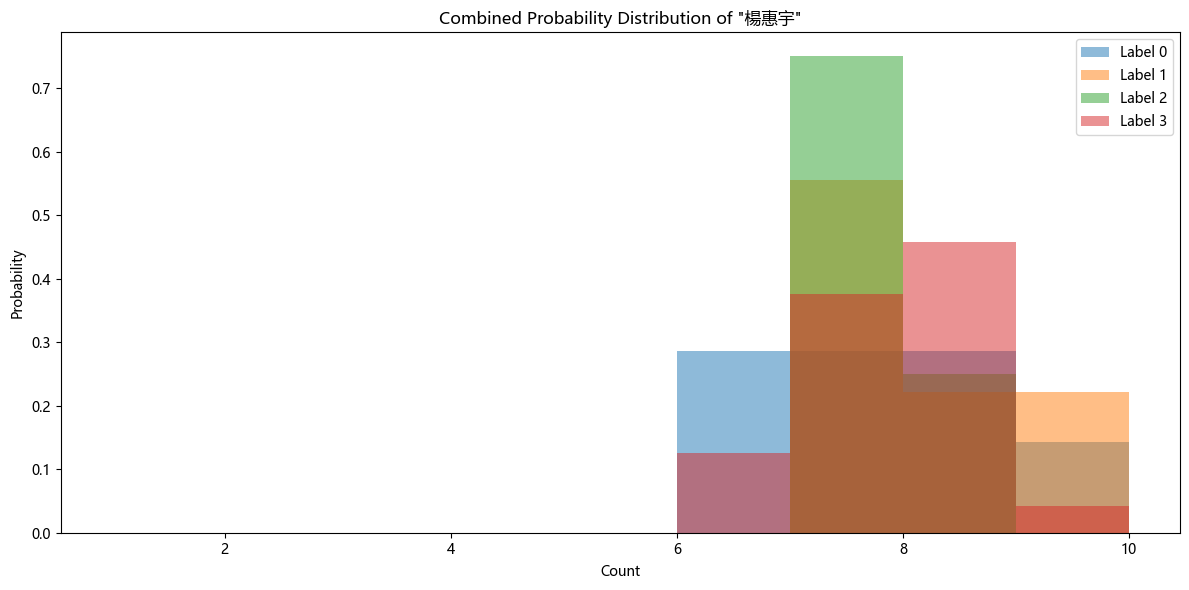

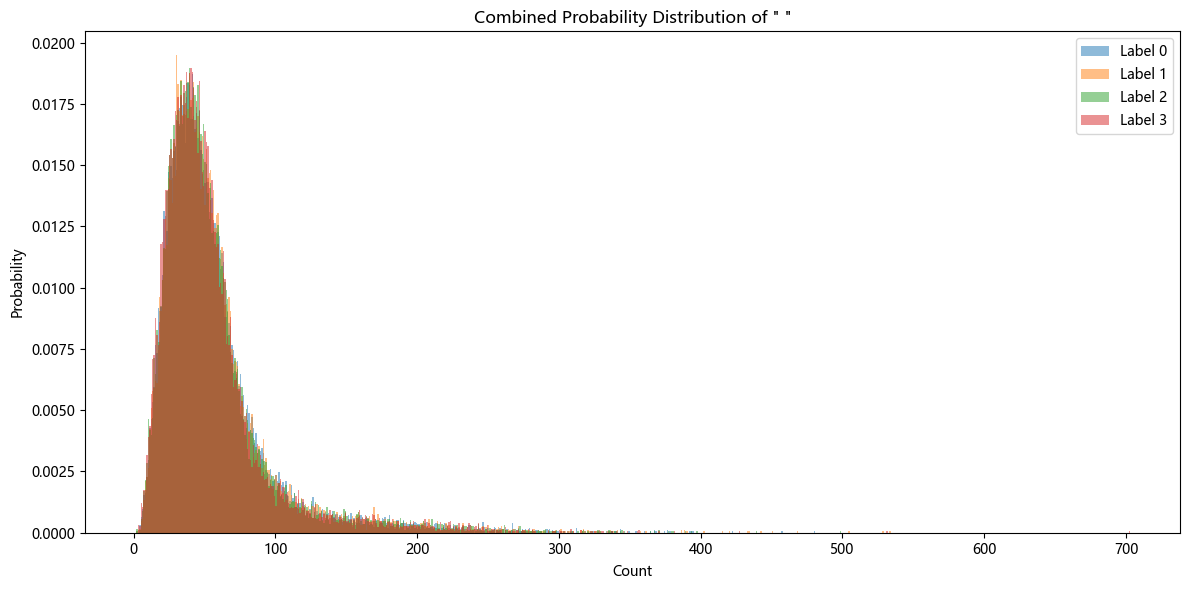

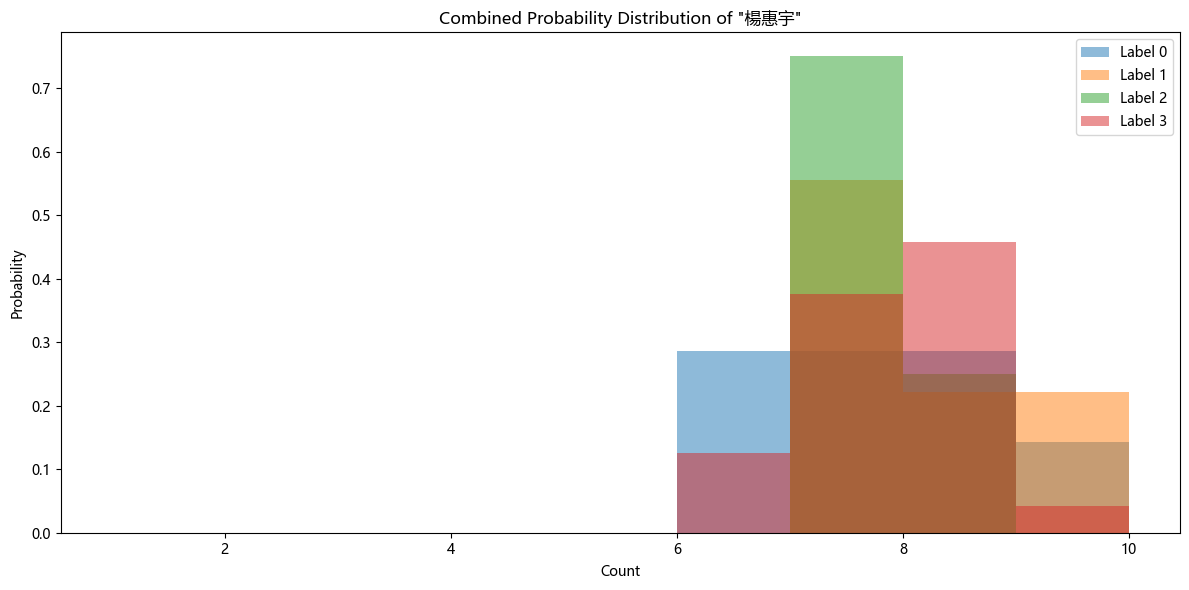

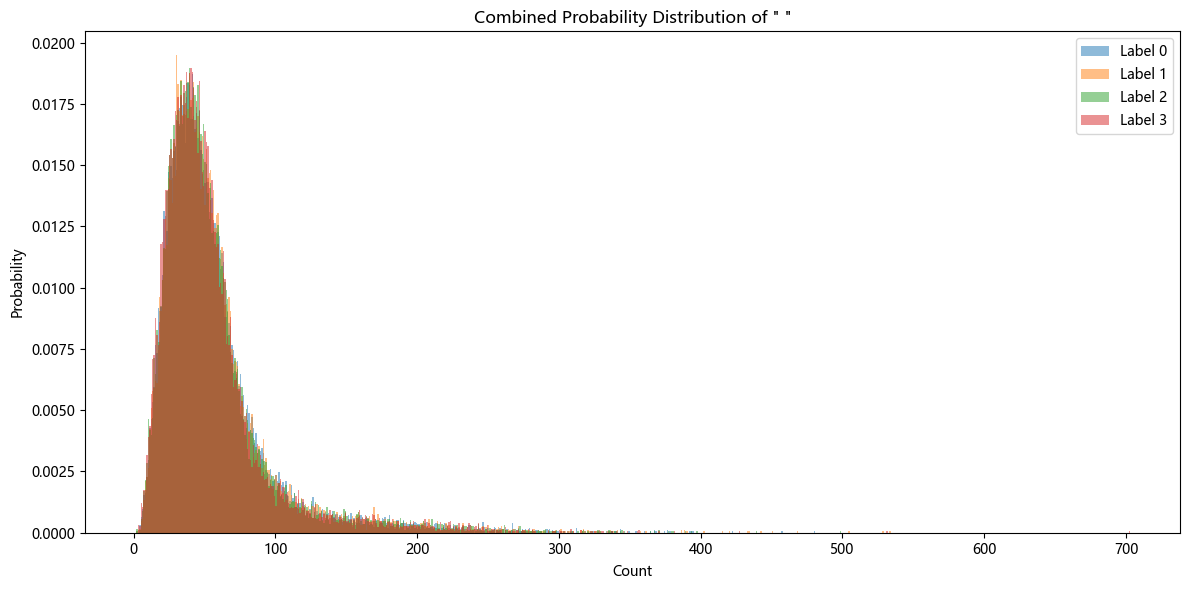

In [ ]:
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib

DICTIONARY_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"

if __name__ == '__main__':
    # 讀取 results
    with open('results.json', 'r', encoding='utf-8') as f:
        results = json.load(f)
    print(f"Loaded results: {len(results)}")
    
    dictionary_main = corpora.Dictionary.load(DICTIONARY_PATH)
    word_list_main = list(dictionary_main.token2id.keys())
    
    # 合併各文章結果：依標籤建立每個詞的所有出現次數列表
    word_counts = {label: defaultdict(list) for label in range(4)}
    for label, local_word_counts in results:
        for word, count in local_word_counts.items():
            word_counts[label][word].append(count)
    
    # 計算每個標籤中每個詞的中位數
    median_frequency = {label: {} for label in range(4)}
    for label in range(4):
        for word, counts in tqdm(word_counts[label].items(), desc=f"Calculating medians for label {label}"):
            counts_array = np.array(counts)
            median_frequency[label][word] = np.median(counts_array)
    
    # 計算每個詞出現於多少篇文章中（文件計數）
    doc_count = defaultdict(int)
    for _, local_word_counts in results:
        for word in local_word_counts:
            doc_count[word] += 1

    # 只有出現於至少 500 篇文章中的詞才納入後續討論
    filtered_words = {word for word in word_list_main if doc_count[word] >= 25}
    
    # 計算每個詞的加權值，僅考慮 filtered_words
    weighted_values = {word: (
        2 * median_frequency[3].get(word, 0) +
        1 * median_frequency[2].get(word, 0) -
        1 * median_frequency[1].get(word, 0) -
        2 * median_frequency[0].get(word, 0)
    ) for word in filtered_words}
    
    with open('weighted_values.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    print("處理完成")
    
    matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    # 依加權值排序後，取前 10 與後 10 詞（此處排序只考慮符合條件的詞）
    sorted_words = sorted(weighted_values.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [(word, value) for word, value in sorted_words[:10]]
    bottom_10_words = [(word, value) for word, value in sorted_words[-10:]]
    
    top_10_words_text = [word for word, _ in top_10_words]
    bottom_10_words_text = [word for word, _ in bottom_10_words]
    
    print("Top 10 words by weighted value:")
    for word, value in top_10_words:
        print(f"{word}: {value}")
    
    print("\nBottom 10 words by weighted value:")
    for word, value in bottom_10_words:
        print(f"{word}: {value}")
    
    # 建立 gensim 語料庫（將每篇文章的詞頻字典轉換成向量）
    corpus_gensim = [[(dictionary_main.token2id[word], freq) for word, freq in entry.items() if word in dictionary_main.token2id] 
                     for _, entry in results]
    
    tfidf_model = TfidfModel(corpus_gensim, id2word=dictionary_main)
    
    tfidf_scores_dict = defaultdict(float)
    for doc in tfidf_model[corpus_gensim]:
        for word_id, score in doc:
            tfidf_scores_dict[dictionary_main[word_id]] += score
    
    # 計算前 10 與後 10 詞的 TF-IDF 值
    top_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in top_10_words_text}
    bottom_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in bottom_10_words_text}
    
    print("\nTop 10 words by TF-IDF value:")
    for word, score in top_10_tfidf_scores.items():
        print(f"{word}: {score}")
    
    print("\nBottom 10 words by TF-IDF value:")
    for word, score in bottom_10_tfidf_scores.items():
        print(f"{word}: {score}")
    
    # 產生前 10 與後 10 詞的矩陣：各標籤下的中位數頻率
    top_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] 
                              for word in top_10_words_text])
    bottom_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] 
                                 for word in bottom_10_words_text])
    
    # 繪製每個詞在各標籤下出現次數的機率分布圖
    def plot_combined_probability_distribution(word, title):
        fig, ax = plt.subplots(figsize=(12, 6))
        for label in range(4):
            counts = word_counts[label][word]
            if counts:
                ax.hist(counts, bins=range(1, max(counts) + 2), alpha=0.5, label=f'Label {label}', density=True)
        ax.set_title(f'Combined Probability Distribution of "{word}"')
        ax.set_xlabel('Count')
        ax.set_ylabel('Probability')
        ax.legend()
        plt.tight_layout()
        plt.show()
    
    # 繪製前 5 與後 5 詞的合併分布圖
    for word in top_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Top Word "{word}"')
    
    for word in bottom_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Bottom Word "{word}"')


In [ ]:
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib

DICTIONARY_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"

if __name__ == '__main__':
    # 讀取 results
    with open('results.json', 'r', encoding='utf-8') as f:
        results = json.load(f)
    print(f"Loaded results: {len(results)}")
    
    dictionary_main = corpora.Dictionary.load(DICTIONARY_PATH)
    word_list_main = list(dictionary_main.token2id.keys())
    
    word_counts = {label: defaultdict(list) for label in range(4)}
    doc_count = defaultdict(int)
    
    for label, local_word_counts in results:
        if label is not None:
            for word, count in local_word_counts.items():
                if word is not None:
                    word_counts[label][word].append(count)
                    doc_count[word] += 1
    
    # 只有出現於至少 25 篇文章中的詞才納入後續討論
    filtered_words = {word for word in word_list_main if doc_count[word] >= 25}
    
    median_frequency = {label: {} for label in range(4)}
    for label in range(4):
        for word, counts in tqdm(word_counts[label].items(), desc=f"Calculating medians for label {label}"):
            if word in filtered_words:
                counts_gpu = np.array(counts)
                median_frequency[label][word] = np.median(counts_gpu)
    
    weighted_values = {word: (
        2 * median_frequency[3].get(word, 0) +
        1 * median_frequency[2].get(word, 0) -
        1 * median_frequency[1].get(word, 0) -
        2 * median_frequency[0].get(word, 0)
    ) for word in filtered_words}
    
    with open('weighted_values_分布中位數.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    print("處理完成")

    matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
    matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly


    # 檢查 `weighted_values` 的 key 是詞還是詞 ID
    sorted_words = sorted(weighted_values.items(), key=lambda x: x[1], reverse=True)

    # **這裡直接使用詞彙，而不再轉換**
    top_10_words = [(word, value) for word, value in sorted_words[:10]]
    bottom_10_words = [(word, value) for word, value in sorted_words[-10:]]

    top_10_words_text = [word for word, _ in top_10_words]
    bottom_10_words_text = [word for word, _ in bottom_10_words]

    # 輸出正確的詞彙及其在不同文章中出現的次數
    print("Top 10 words by weighted value:")
    for word, value in top_10_words:
        print(f"{word}: {value}")
        for label in range(4):
            print(f"  Label {label}: {word_counts[label][word]}")

    print("\nBottom 10 words by weighted value:")
    for word, value in bottom_10_words:
        print(f"{word}: {value}")
        for label in range(4):
            print(f"  Label {label}: {word_counts[label][word]}")

    
    corpus_gensim = [[(dictionary_main.token2id[word], freq) for word, freq in entry.items()] for _, entry in results]
    
    tfidf_model = TfidfModel(corpus_gensim, id2word=dictionary_main)
    
    tfidf_scores_dict = defaultdict(float)
    
    for doc in tfidf_model[corpus_gensim]:
        for word_id, score in doc:
            tfidf_scores_dict[dictionary_main[word_id]] += score
    
    # 計算 top_10_words 和 bottom_10_words 的 TF-IDF 值
    top_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in top_10_words_text}
    bottom_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in bottom_10_words_text}
    
    print("\nTop 10 words by TF-IDF value:")
    for word, score in top_10_tfidf_scores.items():
        print(f"{word}: {score}")
        
    print("\nBottom 10 words by TF-IDF value:")
    for word, score in bottom_10_tfidf_scores.items():
        print(f"{word}: {score}")
    
    # 產生前十大與後十大加權值字的文字矩陣
    top_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] for word in top_10_words_text])
    bottom_10_matrix = np.array([[median_frequency[label].get(word, 0) for label in range(4)] for word in bottom_10_words_text])
    
    # 繪製前五個字在各標籤下文章中該字出現次數的機率分布圖
    def plot_combined_probability_distribution(word, title):
        fig, ax = plt.subplots(figsize=(12, 6))
        
        for label in range(4):
            counts = word_counts[label][word]
            if counts:
                ax.hist(counts, bins=range(1, max(counts) + 2), alpha=0.5, label=f'Label {label}', density=True)
        
        ax.set_title(f'Combined Probability Distribution of "{word}"')
        ax.set_xlabel('Count')
        ax.set_ylabel('Probability')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
    # 繪製前五大和前五小字詞的合併分布圖
    for word in top_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Top Word "{word}"')

    for word in bottom_10_words_text[:5]:
        plot_combined_probability_distribution(word, f'Combined Probability Distribution of Bottom Word "{word}"')

Loaded results: 75544


Counting word occurrences:   0%|          | 0/75544 [00:00<?, ?it/s]


TypeError: list indices must be integers or slices, not str

In [ ]:
import json
import numpy as np
from tqdm import tqdm
from gensim import corpora

# 讀取 JSON 檔案
with open(r"C:\\Users\\walter\\OneDrive\\桌面\\收集\\大學nn專題\\股票分析\\鉅亨_2021~2023_結巴.json", "r", encoding="utf-8") as file:
    data = json.load(file)

dict_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
dictionary = corpora.Dictionary.load(dict_path)

# 計算 "開盤價_lognormal_abs" 的均值
open_prices = [entry["開盤價_lognormal_abs"] for entry in data if entry["開盤價_lognormal_abs"] is not None]
mean_open_price = np.mean(open_prices)

# 計算每篇文章每字的加權占比 (open_price 減去 mean_open_price)
def calculate_weighted_ratio(article, open_price):
    adjusted_open_price = open_price - mean_open_price  # 減去均值
    total_words = sum(count for _, count in article)
    weighted_ratios = {word: (count / total_words) * adjusted_open_price for word, count in article}
    return weighted_ratios

# 儲存每個詞出現在多少篇不同的文章中
word_article_count = {}

# **第一輪遍歷** 記錄每個詞在哪些文章出現
for idx, entry in enumerate(tqdm(data, desc="Counting word occurrences")):
    article = entry["content"]
    
    for word, _ in article:
        if word not in word_article_count:
            word_article_count[word] = set()
        word_article_count[word].add(idx)  # 記錄該詞出現在第 idx 篇文章

# 篩選只出現在超過 25 篇文章的詞
valid_words = {word for word, articles in word_article_count.items() if len(articles) > 25}

# 儲存每字的加權占比
word_ratios = {}

# **第二輪遍歷** 計算加權占比
for entry in tqdm(data, desc="Processing articles for weighting"):
    open_price = entry["開盤價_lognormal_abs"]
    article = entry["content"]
    
    if open_price is not None:
        weighted_ratios = calculate_weighted_ratio(article, open_price)
        
        for word, ratio in weighted_ratios.items():
            if word in valid_words:  # 只考慮出現次數 > 25 的詞
                if word not in word_ratios:
                    word_ratios[word] = []
                word_ratios[word].append(ratio)

# 計算每字的加權占比中位數
word_medians = {word: np.median(ratios) for word, ratios in word_ratios.items()}

# 按中位數排序
sorted_words = sorted(word_medians.items(), key=lambda x: x[1])

# 取得前 25 大和後 25 小的字
top_25_words = sorted_words[-25:]
bottom_25_words = sorted_words[:25]

# 使用字典輸出對應的中文詞
top_25_words_chinese = [(dictionary[word], median) if word in dictionary else (word, median) for word, median in top_25_words]
bottom_25_words_chinese = [(dictionary[word], median) if word in dictionary else (word, median) for word, median in bottom_25_words]

# 輸出結果
print("前 25 大字的加權占比中位數 (只考慮出現次數 > 25 的詞):")
for word, median in top_25_words_chinese:
    print(f"字 {word}: 加權占比中位數 {median}")

print("\n後 25 小字的加權占比中位數 (只考慮出現次數 > 25 的詞):")
for word, median in bottom_25_words_chinese:
    print(f"字 {word}: 加權占比中位數 {median}")


KeyError: '開盤價_lognormal_abs'

##   算分類總數

In [ ]:
from collections import defaultdict
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib

DICTIONARY_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2021~2025_dictionary_結巴.dict"

if __name__ == '__main__':
    # 讀取 results
    with open('results_刪2.json', 'r', encoding='utf-8') as f:
        results = json.load(f)
    print(f"Loaded results: {len(results)}")
    
    dictionary_main = corpora.Dictionary.load(DICTIONARY_PATH)
    word_list_main = list(dictionary_main.token2id.keys())
    
    word_counts = {label: defaultdict(list) for label in range(4)}
    
    for label, local_word_counts in results:
        if label is not None:
            for word, count in local_word_counts.items():
                if word is not None:
                    word_counts[label][word].append(count)
    
    # 計算每個詞出現於多少篇文章中（文件計數）
    doc_count = defaultdict(int)
    for _, local_word_counts in results:
        for word in local_word_counts:
            doc_count[word] += 1

    # 只有出現於至少 500 篇文章中的詞才納入後續討論
    filtered_words = {word for word in word_list_main if doc_count[word] >=70}
    
    # 更新 weighted_values 計算方式
    weighted_values = {word: (
        (2 * len(word_counts[3][word]) +
        1 * len(word_counts[2][word]) -
        1 * len(word_counts[1][word]) -
        2 * len(word_counts[0][word])) /
        (len(word_counts[0][word]) + len(word_counts[1][word]) + len(word_counts[2][word]) + len(word_counts[3][word]))
    ) for word in filtered_words}
    
    with open('count_weighted_values_刪5.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    print("處理完成")
    from scipy import stats

    for target_word in ["油價"]:
        total_count = sum(word_counts[0][target_word]) + sum(word_counts[1][target_word]) + sum(word_counts[2][target_word]) + sum(word_counts[3][target_word])
        weight_value = (
        (2 * len(word_counts[3][target_word]) +
        1 * len(word_counts[2][target_word]) -
        1 * len(word_counts[1][target_word]) -
        2 * len(word_counts[0][target_word])) /
        (len(word_counts[0][target_word]) + len(word_counts[1][target_word]) + len(word_counts[2][target_word]) + len(word_counts[3][target_word]))
    ) 


        # 假設已經有四組原油數值，分別命名為 oil_label0, oil_label1, oil_label2, oil_label3
        # 例如：oil_label0 = [數值1, 數值2, ...]
        f_stat, p_value = stats.kruskal(word_counts[0][target_word], word_counts[1][target_word], word_counts[2][target_word], word_counts[3][target_word])

        print("ANOVA F 統計量:", f_stat)
        print("p 值:", p_value)

        if p_value < 0.05:
            print("不同標籤之間存在統計上顯著的差異")
        else:
            print("不同標籤之間無顯著差異")

        print((
    len(word_counts[3][target_word]) ,
        len(word_counts[2][target_word]) ,
         len(word_counts[1][target_word]) ,
        len(word_counts[0][target_word])) 
)
        for label in range(4):
            print(f"Label {label}:")
            print(f"  總文章數: {len(word_counts[label][target_word])}")
            print(f"  詳細次數列表: {word_counts[label][target_word]}")

        print(f"{target_word} 計算結果: {weight_value}")
    

    # 顯示特定詞彙的加權值
    for target_word in ["原油", "油價"]:
        if target_word in weighted_values:
            print(f'{target_word}: {weighted_values[target_word]}')
            for label in range(4):
                print(f"  Label {label}: {word_counts[label][target_word]}")
        else:
            print(f'{target_word}: 未找到')
    matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
    matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly


    # 檢查 weighted_values 的 key 是詞還是詞 ID
    sorted_words = sorted(weighted_values.items(), key=lambda x: x[1], reverse=True)

    # **這裡直接使用詞彙，而不再轉換**
    top_10_words = [(word, value) for word, value in sorted_words[:100]]
    bottom_10_words = [(word, value) for word, value in sorted_words[-100:]]

    top_10_words_text = [word for word, _ in top_10_words]
    bottom_10_words_text = [word for word, _ in bottom_10_words]

    # 輸出正確的詞彙及其在不同文章中出現的次數
    print("Top 10 words by weighted value:")
    for word, value in top_10_words:
        print(f"{word}: {value}")
        for label in range(4):
            print(f"  Label {label}: {word_counts[label][word]}")

    print("\nBottom 10 words by weighted value:")
    for word, value in bottom_10_words:
        print(f"{word}: {value}")
        for label in range(4):
            print(f"  Label {label}: {word_counts[label][word]}")

    
    corpus_gensim = [[(dictionary_main.token2id[word], freq) for word, freq in entry.items()] for _, entry in results]
    
    tfidf_model = TfidfModel(corpus_gensim, id2word=dictionary_main)
    
    tfidf_scores_dict = defaultdict(float)
    
    for doc in tfidf_model[corpus_gensim]:
        for word_id, score in doc:
            tfidf_scores_dict[dictionary_main[word_id]] += score
    
    # 計算 top_10_words 和 bottom_10_words 的 TF-IDF 值
    top_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in top_10_words_text}
    bottom_10_tfidf_scores = {word: tfidf_scores_dict[word] for word in bottom_10_words_text}
    
    print("\nTop 10 words by TF-IDF value:")
    for word, score in top_10_tfidf_scores.items():
        print(f"{word}: {score}")
        
    print("\nBottom 10 words by TF-IDF value:")
    for word, score in bottom_10_tfidf_scores.items():
        print(f"{word}: {score}")
    

Loaded results: 75543
處理完成
ANOVA F 統計量: 6.031849068587477
p 值: 0.11007093840556484
不同標籤之間無顯著差異
(76, 79, 66, 77)
Label 0:
  總文章數: 77
  詳細次數列表: [3, 5, 3, 4, 3, 8, 3, 3, 3, 3, 5, 3, 3, 6, 4, 3, 3, 4, 3, 3, 3, 5, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 9, 3, 5, 7, 3, 3, 5, 3, 6, 5, 3, 4, 3, 3, 4, 3, 6, 8, 3, 3, 6, 7, 3, 17, 3, 3, 3, 4, 3, 5, 5, 3, 3, 4, 3]
Label 1:
  總文章數: 66
  詳細次數列表: [7, 3, 3, 3, 4, 7, 3, 5, 4, 4, 5, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 5, 4, 5, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 12, 3, 3, 4, 4, 3, 5, 3, 5, 3, 5, 4, 9, 4, 5, 6, 5, 4, 3, 3, 4, 5, 3, 3, 5, 4, 3, 3, 3, 6, 3, 5]
Label 2:
  總文章數: 79
  詳細次數列表: [5, 3, 3, 3, 5, 3, 7, 5, 3, 3, 6, 4, 5, 4, 3, 3, 4, 3, 3, 7, 3, 3, 3, 6, 5, 3, 3, 3, 3, 4, 6, 5, 3, 5, 5, 6, 4, 3, 3, 6, 5, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 5, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Label 3:
  總文章數: 76
  詳細次數列表: [5, 3, 7, 4, 7, 3, 7, 5, 3, 5, 4, 3, 3, 3, 3, 4, 3, 4, 5, 3, 7, 4, 5, 3, 3, 3, 5, 3, 4, 5, 4, 4, 

KeyError: '二氧'

In [ ]:
from collections import defaultdict
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim import corpora
from gensim.models import TfidfModel
import matplotlib
from scipy import stats

DICTIONARY_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2021~2025_dictionary_結巴.dict"

if __name__ == '__main__':
    # 讀取 results
    with open('results_刪2.json', 'r', encoding='utf-8') as f:
        results = json.load(f)
    print(f"Loaded results: {len(results)}")
    
    dictionary_main = corpora.Dictionary.load(DICTIONARY_PATH)
    word_list_main = list(dictionary_main.token2id.keys())
    
    word_counts = {label: defaultdict(list) for label in range(4)}
    
    for label, local_word_counts in results:
        if label is not None:
            for word, count in local_word_counts.items():
                if word is not None:
                    word_counts[label][word].append(count)
    
    # 計算每個詞出現於多少篇文章中（文件計數）
    doc_count = defaultdict(int)
    for _, local_word_counts in results:
        for word in local_word_counts:
            doc_count[word] += 1

    # 只有出現於至少 70 篇文章中的詞才納入後續討論
    filtered_words = {word for word in word_list_main if doc_count[word] >= 70}
    
    weighted_values = {}
    p_values = {}
    wp_values={}
    for word in filtered_words:
        all_counts = [word_counts[label][word] for label in range(4)]
        
        # 計算加權值
        weighted_values[word] = (
            (2 * len(all_counts[3]) +
             1 * len(all_counts[2]) -
             1 * len(all_counts[1]) -
             2 * len(all_counts[0])) /
            (len(all_counts[0]) + len(all_counts[1]) + len(all_counts[2]) + len(all_counts[3]))
        )
        
        # 🔍 檢查是否有標籤數據為空
        non_empty_counts = [counts for counts in all_counts if len(counts) > 0]
        
        if len(non_empty_counts) < 2:
            print(f"詞彙 {word} 只有一個標籤有數據，跳過 Kruskal-Wallis 檢定")
            p_values[word] = 1.0  # 設定 p-value 為 1，代表不顯著
            continue

        # 🔍 檢查是否所有數值相同
        unique_values = {val for counts in non_empty_counts for val in counts}
        
        if len(unique_values) == 1:
            print(f"詞彙 {word} 所有數據完全相同，無法執行 Kruskal-Wallis 檢定")
            p_values[word] = 1.0  # 設定 p-value 為 1，代表不顯著
            continue

        # ✅ 正常計算 Kruskal-Wallis
        try:
            h_stat, p_value = stats.kruskal(*non_empty_counts)
            p_values[word] = p_value
        except ValueError as e:
            print(f"Kruskal-Wallis 檢定失敗：{word}，錯誤訊息：{e}")
            p_values[word] = 1.0  # 設定 p-value 為 1，避免影響後續計算
        if word in weighted_values and word in p_values:
            wp_values[word] = weighted_values[word] * (1 - p_values[word])
        else:
            wp_values[word] = 0  # 若無數據，則設為0

    
    # 存儲計算結果
    result_data = {word: {
        "weighted_value": weighted_values.get(word, 0), 
        "p_value": p_values.get(word, 1), 
        "wp": wp_values.get(word, 0)
    } for word in filtered_words}
        
    with open('count_weighted_values_with_p.json', 'w', encoding='utf-8') as f:
        json.dump(result_data, f, ensure_ascii=False, indent=4)
    
    print("處理完成，已存入 count_weighted_values_with_p.json")
# 輸出前100和後100的 wp 值與對應字
    sorted_wp = sorted(wp_values.items(), key=lambda x: x[1], reverse=True)
    
    top_100_wp = sorted_wp[:100]
    bottom_100_wp = sorted_wp[-100:]
    
    print("Top 100 words by WP value:")
    for word, value in top_100_wp:
        print(f"{word}: {value}")
    
    print("\nBottom 100 words by WP value:")
    for word, value in bottom_100_wp:
        print(f"{word}: {value}")

    # 顯示特定詞彙的加權值
    for target_word in ["原油", "油價"]:
        if target_word in weighted_values:
            print(f'{target_word}: {weighted_values[target_word]} p_values,{p_values[target_word]},wp_values,{wp_values[target_word]}')
            
        else:
            print(f'{target_word}: 未找到')


Loaded results: 75543
詞彙 anue 所有數據完全相同，無法執行 Kruskal-Wallis 檢定
詞彙 度 所有數據完全相同，無法執行 Kruskal-Wallis 檢定
處理完成，已存入 count_weighted_values_with_p.json
Top 100 words by WP value:
恒指: 0.6390777786405698
短缺: 0.6197462025742512
紓: 0.6074974520700768
接種: 0.5894952185303179
泡沫: 0.5892408469536221
廠區: 0.5842945970095352
師王: 0.56777160526886
跌停: 0.5662205493835899
榮旭: 0.5621491585536578
LG: 0.5587794717075132
2020: 0.5548953341126484
南非: 0.5077344861253058
刺激: 0.5024130342775998
疫情: 0.4860236673446646
變種: 0.4855018069403902
南港: 0.4800780187275481
警戒: 0.47039620933492665
金期: 0.4642668343483693
同仁: 0.46276679699418855
抗體: 0.4552864928402954
口: 0.4516346748229802
例: 0.44561450353456616
Q2: 0.4438300432159649
事故: 0.4375545075301033
ARK: 0.43526400461977827
GameStop: 0.4269781379273169
衝擊: 0.4243150286485778
三期: 0.4219856752898264
型基金: 0.4076423073610967
大宗: 0.40759963320457976
29: 0.40271640346155213
封測: 0.3993035828247846
缺料: 0.3920111515593596
股東會: 0.3826750897770094
供給: 0.3812086871869993
電廠: 0.38099648

## 關鍵字權重

In [ ]:
from collections import defaultdict
import json
import numpy as np
from scipy.stats import fisher_exact
from tqdm import tqdm


INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    if isinstance(data, dict):  # 若 JSON 為字典則轉為列表
        data = [data]
    return data

def fisher_test(counts_0, counts_2, total_0, total_2):
    """
    進行 Fisher 精確檢定，比較標籤 0 和標籤 2。
    """
    table = [[counts_0, total_0 - counts_0], [counts_2, total_2 - counts_2]]
    _, p_value = fisher_exact(table)
    return p_value

def calculate_weights(data):
    keyword_counts = defaultdict(lambda: defaultdict(int))
    document_occurrences = defaultdict(set)
    total_by_label = defaultdict(int)
    
    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        
        keywords = entry.get("keyword", [])
        log_level = entry.get("log_level", None)
        
        if log_level is None or not isinstance(keywords, list):
            continue
        
        total_by_label[log_level] += 1
        
        for keyword in keywords:
            keyword_counts[keyword][log_level] += 1
            document_occurrences[keyword].add(idx)
    
    filtered_keywords = {kw for kw, docs in document_occurrences.items() if len(docs) > 25}
    weighted_values = {}
    
    for kw in tqdm(filtered_keywords, desc="Processing Keywords"):
        count_dict = keyword_counts[kw]
        weighted_numer = count_dict.get(2, 0) - count_dict.get(0, 0)
        total_counts = sum(count_dict.values()) or 1
        weight = weighted_numer / total_counts
        
        # 進行 Fisher 精確檢定
        p_value = fisher_test(count_dict.get(0, 0), count_dict.get(2, 0), total_by_label.get(0, 1), total_by_label.get(2, 1))
        
        weighted_values[kw] = {"weight": weight, "p_value": p_value}

        impact_score = weight * (-np.log(p_value)) if p_value > 0 else 0
        
        weighted_values[kw] = {"weight": weight, "p_value": p_value, "wp": impact_score}
    
    return weighted_values

def main():
    data = load_data(INPUT_FILE)
    weighted_values = calculate_weights(data)
    sorted_wp = sorted(weighted_values.items(), key=lambda x: x[1]['wp'], reverse=True)
    
    print("\nTop 50 Impact Scores:")
    for kw, result in sorted_wp[:50]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    print("\nBottom 50 Impact Scores:")
    for kw, result in sorted_wp[-50:]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    keywords_of_interest = ["石油", "原油", "油價"]
    print("\nSpecific Keywords Impact Scores:")
    for keyword in keywords_of_interest:
        if keyword in weighted_values:
            print(f"{keyword}: wp = {weighted_values[keyword]['wp']}")
    
    with open('3_count_keyword_weighted_values.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    
    print("處理完成，結果已儲存。")

if __name__ == '__main__':
    main()


Processing Keywords: 100%|██████████| 2150/2150 [00:09<00:00, 233.97it/s]



Top 50 Impact Scores:
封關: wp = 10.577603968038538,p_value 1.8577149979234636e-08
晶心科: wp = 7.585399214930501,p_value 2.090150450902108e-06
調漲: wp = 6.292734990672363,p_value 0.00013073899611098645
限電: wp = 6.088894351131951,p_value 3.7200052208394614e-07
停電: wp = 4.940556250853223,p_value 3.717559478023867e-05
量化寬鬆: wp = 3.974042941189727,p_value 0.0007124618530203082
電價: wp = 3.2060609510822595,p_value 0.0002009117915468301
晶電: wp = 3.040314198668002,p_value 0.0018910027505618411
鄭州: wp = 2.6954676663095958,p_value 0.0018558275668570045
勞動基金: wp = 2.6152022670285215,p_value 0.002783057596518171
春節: wp = 2.552250867901356,p_value 0.001800196790597433
GameStop: wp = 2.438176205259306,p_value 0.0008821040026308056
死亡: wp = 2.2428742385282545,p_value 0.007980086306606345
Robinhood: wp = 1.983432073376783,p_value 0.009323354926648167
吉利: wp = 1.977117629771512,p_value 0.006679594509670523
遠東新: wp = 1.9581763234812053,p_value 0.010901352239163945
KY: wp = 1.9021904737632225,p_value 0.00563

In [ ]:
from collections import defaultdict
import json
import numpy as np
from scipy.stats import fisher_exact
from tqdm import tqdm
from datetime import datetime, timedelta

INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
OFFSET_DAYS = 1  # 延後天數
MIN_DAYS = 25          # keyword 至少出現於不同天數的最少天數

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if isinstance(data, dict):  # 若 JSON 為字典則轉為列表
        data = [data]
    return data

def fisher_test(counts_0, counts_2, total_0, total_2):
    """
    進行 Fisher 精確檢定，比較標籤 0 與 標籤 2。
    """
    table = [[counts_0, total_0 - counts_0], [counts_2, total_2 - counts_2]]
    _, p_value = fisher_exact(table)
    return p_value

# --------------------- Step 1 ---------------------
def compute_daily_counts(data):
    """
    計算每日 log label 出現次數，由於每天的 100 篇文章內 log_level 都相同，
    因此每一天只取第一篇文章的 log_level，產生 daily_counts:
       {date_obj: {log_level: 1}, ...}
    """
    daily_counts = {}
    for entry in data:
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        # 如果該日期已經處理過，就略過
        if date_obj in daily_counts:
            continue
        log_level = entry.get("log_level")
        if log_level is None:
            continue
        daily_counts[date_obj] = {log_level: 1}
    return daily_counts

def compute_aggregated_daily_counts(daily_counts, offset_days):
    """
    對於每日計算從該天起連續 offset_days 天內的 log label 累計數值，
    結果格式:
       {date_obj: {log_level: aggregated_count, ...}, ...}
    """
    if not daily_counts:
        return {}
    min_date = min(daily_counts.keys())
    max_date = max(daily_counts.keys())
    aggregated_counts = {}
    current_date = min_date
    while current_date <= max_date:
        agg = defaultdict(int)
        for i in range(offset_days):
            d = current_date + timedelta(days=i)
            if d in daily_counts:
                for label, cnt in daily_counts[d].items():
                    agg[label] += cnt
        aggregated_counts[current_date] = dict(agg)
        current_date += timedelta(days=1)
    return aggregated_counts

# --------------------- Step 2 ---------------------
def compute_keyword_aggregated_counts(data, aggregated_daily_counts):
    """
    對於每篇文章，根據文章日期從 aggregated_daily_counts 取得累計標籤數，
    並將該累計數值累加到文章內出現的各 keyword 上，同時記錄每個 keyword 出現的文章編號，
    並建立一個 mapping (article_index -> 該文章的 aggregated count tuple (count0, count2))
    供後續排列檢定使用。同時額外記錄每篇文章的日期 (article_index -> date_obj)。
    """
    keyword_aggregated_counts = defaultdict(lambda: defaultdict(int))
    overall_totals = defaultdict(int)
    article_occurrences = defaultdict(set)
    article_index_to_agg = {}  # 儲存每篇文章的 aggregated (count0, count2)
    article_index_to_date = {}  # 儲存每篇文章的日期
    
    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        article_index_to_date[idx] = date_obj  # 紀錄日期
        
        # 取得該文章日期對應的 aggregated 標籤數，若無則為空字典
        agg = aggregated_daily_counts.get(date_obj, {})
        # 取出 label 0 與 label 2 的數值（若無則為 0）
        agg0 = agg.get(0, 0)
        agg2 = agg.get(2, 0)
        # 儲存該文章的 aggregated count (用於排列檢定 pool)
        article_index_to_agg[idx] = (agg0, agg2)
        
        # 將該文章的 aggregated 標籤數累加到 overall_totals（每篇文章只算一次）
        for label, cnt in agg.items():
            overall_totals[label] += cnt
        
        # 針對文章中的 keyword（假設每篇文章中 keyword 不重複）
        keywords = entry.get("keyword", [])
        for keyword in keywords:
            for label, cnt in agg.items():
                keyword_aggregated_counts[keyword][label] += cnt
            article_occurrences[keyword].add(idx)
            
    return keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date


# --------------------- Step 2.5 ---------------------
def filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, min_days=MIN_DAYS):
    """
    過濾掉出現於少於 min_days 個不同天數的 keyword，
    回傳過濾後的 keyword_aggregated_counts 與 article_occurrences。
    """
    filtered_keyword_counts = {}
    filtered_occurrences = {}
    for kw, occ in article_occurrences.items():
        # 取得該 keyword 出現的文章日期，並計算 unique 天數
        unique_days = set(article_index_to_date[idx] for idx in occ)
        if len(unique_days) >= min_days:
            filtered_keyword_counts[kw] = keyword_aggregated_counts[kw]
            filtered_occurrences[kw] = occ
    return filtered_keyword_counts, filtered_occurrences

# --------------------- Step 3 ---------------------
def calculate_keyword_weights(filtered_keyword_counts, overall_totals, filtered_occurrences):
    """
    對過濾後的 keyword 依據累計的 aggregated 標籤數計算加權值：
      weight = (count(2) - count(0)) / (sum(counts))
    並利用 Fisher 精確檢定計算 p 值與 impact score。
    """
    weighted_values = {}
    for kw, counts in filtered_keyword_counts.items():
        weighted_numer = counts.get(2, 0) - counts.get(0, 0)
        total_counts = sum(counts.values()) or 1
        weight = weighted_numer / total_counts
        
        p_value = fisher_test(counts.get(0, 0), counts.get(2, 0),
                              overall_totals.get(0, 1), overall_totals.get(2, 1))
        if p_value == 0:
            p_value = 1e-200
        impact_score = weight * (-np.log(p_value))
        weighted_values[kw] = {"weight": weight, "p_value": p_value, "wp": impact_score}
    return weighted_values

def main():
    # 載入資料
    data = load_data(INPUT_FILE)
    
    # Step 1: 計算每日 log label（同一天只取一次）與 aggregated log label 數值
    daily_counts = compute_daily_counts(data)
    aggregated_daily_counts = compute_aggregated_daily_counts(daily_counts, OFFSET_DAYS)
    
    # Step 2: 依據每篇文章日期，取得 aggregated 標籤數並累計至各 keyword，同時紀錄文章出現數
    keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date = compute_keyword_aggregated_counts(data, aggregated_daily_counts)
    
    # Step 2.5: 過濾掉出現於少於 MIN_ARTICLES 篇文章的 keyword
    filtered_keyword_counts, filtered_occurrences = filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, MIN_DAYS)    
    # Step 3: 根據過濾後的 keyword 計算加權值
    weighted_values = calculate_keyword_weights(filtered_keyword_counts, overall_totals, filtered_occurrences)
    
    # 排序並輸出 Top 50 與 Bottom 50 impact score
    sorted_wp = sorted(weighted_values.items(), key=lambda x: x[1]['wp'], reverse=True)
    
    print("\nTop 50 Impact Scores:")
    for kw, result in sorted_wp[:50]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    print("\nBottom 50 Impact Scores:")
    for kw, result in sorted_wp[-50:]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    keywords_of_interest = ["台積電", "0050", "竹科"]
    print("\nSpecific Keywords Impact Scores:")
    for keyword in keywords_of_interest:
        if keyword in weighted_values:
            print(f"{keyword}: wp = {weighted_values[keyword]['wp']},p value {weighted_values[keyword]['p_value']}")
    
    with open('3_count_keyword_weighted_values.json_1d', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    
    print("處理完成，結果已儲存。")

if __name__ == '__main__':
    main()



Top 50 Impact Scores:
封關: wp = 10.577603968038538,p_value 1.8577149979234636e-08
晶心科: wp = 7.585399214930501,p_value 2.090150450902108e-06
限電: wp = 6.088894351131951,p_value 3.7200052208394614e-07
停電: wp = 4.940556250853223,p_value 3.717559478023867e-05
量化寬鬆: wp = 3.974042941189727,p_value 0.0007124618530203082
電價: wp = 3.2060609510822595,p_value 0.0002009117915468301
晶電: wp = 3.040314198668002,p_value 0.0018910027505618411
鄭州: wp = 2.6954676663095958,p_value 0.0018558275668570045
勞動基金: wp = 2.6152022670285215,p_value 0.002783057596518171
春節: wp = 2.552250867901356,p_value 0.001800196790597433
GameStop: wp = 2.438176205259306,p_value 0.0008821040026308056
死亡: wp = 2.2428742385282545,p_value 0.007980086306606345
Robinhood: wp = 1.983432073376783,p_value 0.009323354926648167
吉利: wp = 1.977117629771512,p_value 0.006679594509670523
KY: wp = 1.9021904737632225,p_value 0.005638229514754865
景氣指標: wp = 1.884064253931516,p_value 0.0038565219570153584
封城: wp = 1.8360925036199678,p_value 0.00042

更精細fisher_test 

In [4]:
from collections import defaultdict
import json
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta
import mpmath as mp

# 设置 mpmath 的全局精度（比默认更高，单位：位）
mp.mp.prec = 200

INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
OFFSET_DAYS = 1  # 延後天數
MIN_DAYS = 25          # keyword 至少出現於不同天數的最少天數

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if isinstance(data, dict):  # 若 JSON 為字典則轉為列表
        data = [data]
    return data

def fisher_test(counts_0, counts_2, total_0, total_2):
    """
    使用 mpmath 高精度計算 Fisher 精確檢定的 p 值。
    將 2×2 列聯表組成如下：
         [[a, b],
          [c, d]]
    其中 a = counts_0, c = counts_2, b = total_0 - counts_0, d = total_2 - counts_2。
    p_value 為所有表中機率小於等於觀察表（p_obs）的概率之和（雙尾檢定）。
    """
    a = counts_0
    c = counts_2
    b = total_0 - counts_0
    d = total_2 - counts_2
    n = a + b + c + d

    # 觀察表的概率
    p_obs = (mp.binomial(a+b, a) * mp.binomial(c+d, c)) / mp.binomial(n, a+c)

    # 可能的 a 值範圍：
    min_a = max(0, (a+c) - (c+d))
    max_a = min(a+b, a+c)
    p_value = mp.mpf('0')
    for i in range(int(min_a), int(max_a)+1):
        p = (mp.binomial(a+b, i) *
             mp.binomial(c+d, a+c - i)) / mp.binomial(n, a+c)
        # 若該表的概率不大於觀察表，則累加到 p_value 中
        if p <= p_obs + mp.mpf('1e-40'):  # 加入微小容差
            p_value += p
    return p_value

# --------------------- Step 1 ---------------------
def compute_daily_counts(data):
    """
    計算每日 log label 出現次數，由於每天的 100 篇文章內 log_level 都相同，
    因此每一天只取第一篇文章的 log_level，產生 daily_counts:
       {date_obj: {log_level: 1}, ...}
    """
    daily_counts = {}
    for entry in data:
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        # 如果該日期已經處理過，就略過
        if date_obj in daily_counts:
            continue
        log_level = entry.get("log_level")
        if log_level is None:
            continue
        daily_counts[date_obj] = {log_level: 1}
    return daily_counts

def compute_aggregated_daily_counts(daily_counts, offset_days):
    """
    對於每日計算從該天起連續 offset_days 天內的 log label 累計數值，
    結果格式:
       {date_obj: {log_level: aggregated_count, ...}, ...}
    """
    if not daily_counts:
        return {}
    min_date = min(daily_counts.keys())
    max_date = max(daily_counts.keys())
    aggregated_counts = {}
    current_date = min_date
    while current_date <= max_date:
        agg = defaultdict(int)
        for i in range(offset_days):
            d = current_date + timedelta(days=i)
            if d in daily_counts:
                for label, cnt in daily_counts[d].items():
                    agg[label] += cnt
        aggregated_counts[current_date] = dict(agg)
        current_date += timedelta(days=1)
    return aggregated_counts

# --------------------- Step 2 ---------------------
def compute_keyword_aggregated_counts(data, aggregated_daily_counts):
    """
    對於每篇文章，根據文章日期從 aggregated_daily_counts 取得累計標籤數，
    並將該累計數值累加到文章內出現的各 keyword 上，同時記錄每個 keyword 出現的文章編號，
    並建立一個 mapping (article_index -> 該文章的 aggregated count tuple (count0, count2))
    供後續排列檢定使用。同時額外記錄每篇文章的日期 (article_index -> date_obj)。
    """
    keyword_aggregated_counts = defaultdict(lambda: defaultdict(int))
    overall_totals = defaultdict(int)
    article_occurrences = defaultdict(set)
    article_index_to_agg = {}  # 儲存每篇文章的 aggregated (count0, count2)
    article_index_to_date = {}  # 儲存每篇文章的日期

    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        article_index_to_date[idx] = date_obj  # 紀錄日期

        # 取得該文章日期對應的 aggregated 標籤數，若無則為空字典
        agg = aggregated_daily_counts.get(date_obj, {})
        # 取出 label 0 與 label 2 的數值（若無則為 0）
        agg0 = agg.get(0, 0)
        agg2 = agg.get(2, 0)
        # 儲存該文章的 aggregated count (用於排列檢定 pool)
        article_index_to_agg[idx] = (agg0, agg2)

        # 將該文章的 aggregated 標籤數累加到 overall_totals（每篇文章只算一次）
        for label, cnt in agg.items():
            overall_totals[label] += cnt

        # 針對文章中的 keyword（假設每篇文章中 keyword 不重複）
        keywords = entry.get("keyword", [])
        for keyword in keywords:
            for label, cnt in agg.items():
                keyword_aggregated_counts[keyword][label] += cnt
            article_occurrences[keyword].add(idx)

    return keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date

# --------------------- Step 2.5 ---------------------
def filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, min_days=MIN_DAYS):
    """
    過濾掉出現於少於 min_days 個不同天數的 keyword，
    回傳過濾後的 keyword_aggregated_counts 與 article_occurrences。
    """
    filtered_keyword_counts = {}
    filtered_occurrences = {}
    for kw, occ in article_occurrences.items():
        # 取得該 keyword 出現的文章日期，並計算 unique 天數
        unique_days = set(article_index_to_date[idx] for idx in occ)
        if len(unique_days) >= min_days:
            filtered_keyword_counts[kw] = keyword_aggregated_counts[kw]
            filtered_occurrences[kw] = occ
    return filtered_keyword_counts, filtered_occurrences

# --------------------- Step 3 ---------------------
def calculate_keyword_weights(filtered_keyword_counts, overall_totals, filtered_occurrences):
    """
    根據過濾後的 keyword 計算加權值：
      weight = (count(2) - count(0)) / (sum(counts))
    並利用 Fisher 精確檢定計算 p 值與 impact score。
    """
    weighted_values = {}
    for kw, counts in filtered_keyword_counts.items():
        weighted_numer = counts.get(2, 0) - counts.get(0, 0)
        total_counts = sum(counts.values()) or 1
        weight = weighted_numer / total_counts

        # 使用高精度 Fisher 精確檢定
        p_value = fisher_test(counts.get(0, 0), counts.get(2, 0),
                              overall_totals.get(0, 1), overall_totals.get(2, 1))
        # 若 p_value 非常小，使用 mp.log 計算更高精度的對數
        impact_score = weight * (-float(mp.log(p_value)))
        weighted_values[kw] = {"weight": weight, "p_value": str(p_value), "wp": impact_score}
    return weighted_values

def main():
    # 載入資料
    data = load_data(INPUT_FILE)

    # Step 1: 計算每日 log label（同一天只取一次）與 aggregated log label 數值
    daily_counts = compute_daily_counts(data)
    aggregated_daily_counts = compute_aggregated_daily_counts(daily_counts, OFFSET_DAYS)

    # Step 2: 依據每篇文章日期，取得 aggregated 標籤數並累加至各 keyword，同時紀錄文章出現數
    keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date = compute_keyword_aggregated_counts(data, aggregated_daily_counts)

    # Step 2.5: 過濾掉出現於少於 MIN_DAYS 個不同天數的 keyword
    filtered_keyword_counts, filtered_occurrences = filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, MIN_DAYS)

    # Step 3: 根據過濾後的 keyword 計算加權值
    weighted_values = calculate_keyword_weights(filtered_keyword_counts, overall_totals, filtered_occurrences)

    # 排序並輸出 Top 50 與 Bottom 50 impact score
    sorted_wp = sorted(weighted_values.items(), key=lambda x: x[1]['wp'], reverse=True)

    print("\nTop 50 Impact Scores:")
    for kw, result in sorted_wp[:50]:
        print(f"{kw}: wp = {result['wp']}, p_value = {result['p_value']}")

    print("\nBottom 50 Impact Scores:")
    for kw, result in sorted_wp[-50:]:
        print(f"{kw}: wp = {result['wp']}, p_value = {result['p_value']}")

    keywords_of_interest = ["台積電", "0050", "竹科"]
    print("\nSpecific Keywords Impact Scores:")
    for keyword in keywords_of_interest:
        if keyword in weighted_values:
            print(f"{keyword}: wp = {weighted_values[keyword]['wp']}, p_value = {weighted_values[keyword]['p_value']}")

    with open('3_count_keyword_weighted_values.json_1d', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)

    print("處理完成，結果已儲存。")

if __name__ == '__main__':
    main()



Top 50 Impact Scores:
封關: wp = 10.577603968038538, p_value = 0.000000018577149979234636870454731276741356891361320953007019344731
晶心科: wp = 7.5853992149305, p_value = 0.0000020901504509021084605469556722707108843006670466190351155254
限電: wp = 6.08889435113195, p_value = 0.00000037200052208394618148276633969197896074489901076221954895883
停電: wp = 4.940556250853223, p_value = 0.000037175594780238672237162761402553777482179592160248506701252
量化寬鬆: wp = 3.974042941189727, p_value = 0.00071246185302030842854559948291304155803336189941760049103953
電價: wp = 3.2060609510822595, p_value = 0.0002009117915468300881224478268067854014817949095997591278098
晶電: wp = 3.040314198668002, p_value = 0.0018910027505618419767649911116931983161377734874784462721851
鄭州: wp = 2.695467666309596, p_value = 0.0018558275668570036701626924443721646176351465929828001572767
勞動基金: wp = 2.6152022670285215, p_value = 0.0027830575965181716245511557904740181354129956352016181123222
春節: wp = 2.552250867901356, p_value = 0

permutation_test套件

In [2]:
from collections import defaultdict
import json
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta
import random
import math
from scipy.stats import permutation_test  # 直接导入内置函数

INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
OFFSET_DAYS = 1        # 延後天數
MIN_ARTICLES = 25      # 至少出現文章數
NUM_PERMUTATIONS = 500000 # 排列檢定次數

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if isinstance(data, dict):  # 若 JSON 為字典則轉為列表
        data = [data]
    return data

# --------------------- Step 1 ---------------------
def compute_daily_counts(data):
    """
    計算每日 log label 出現次數，由於每天 100 篇文章中 log_level 都相同，
    因此每一天只取第一筆文章的 log_level，產生 daily_counts:
       {date_obj: {log_level: 1}, ...}
    """
    daily_counts = {}
    for entry in data:
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        # 同一天只取第一篇
        if date_obj in daily_counts:
            continue
        log_level = entry.get("log_level")
        if log_level is None:
            continue
        daily_counts[date_obj] = {log_level: 1}
    return daily_counts

def compute_aggregated_daily_counts(daily_counts, offset_days):
    """
    對於每日計算從該天起連續 offset_days 天內的 log label 累計數值，
    結果格式:
       {date_obj: {log_level: aggregated_count, ...}, ...}
    """
    if not daily_counts:
        return {}
    min_date = min(daily_counts.keys())
    max_date = max(daily_counts.keys())
    aggregated_counts = {}
    current_date = min_date
    while current_date <= max_date:
        agg = defaultdict(int)
        for i in range(offset_days):
            d = current_date + timedelta(days=i)
            if d in daily_counts:
                for label, cnt in daily_counts[d].items():
                    agg[label] += cnt
        aggregated_counts[current_date] = dict(agg)
        current_date += timedelta(days=1)
    return aggregated_counts

# --------------------- Step 2 ---------------------
def compute_keyword_aggregated_counts(data, aggregated_daily_counts):
    """
    對於每篇文章，根據文章日期從 aggregated_daily_counts 取得累計標籤數，
    並將該累計數值累加到文章內出現的各 keyword 上，同時記錄每個 keyword 出現的文章編號，
    並建立一個 mapping (article_index -> 該文章的 aggregated count tuple (count0, count2))
    供後續排列檢定使用。
    """
    keyword_aggregated_counts = defaultdict(lambda: defaultdict(int))
    overall_totals = defaultdict(int)
    article_occurrences = defaultdict(set)
    article_index_to_agg = {}  # 儲存每篇文章的 aggregated (count0, count2)
    
    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        # 取得該文章日期對應的 aggregated 標籤數，若無則為空字典
        agg = aggregated_daily_counts.get(date_obj, {})
        # 取出 label 0 與 label 2 的數值（若無則為 0）
        agg0 = agg.get(0, 0)
        agg2 = agg.get(2, 0)
        # 儲存該文章的 aggregated count (用於排列檢定 pool)
        article_index_to_agg[idx] = (agg0, agg2)
        
        # 將該文章的 aggregated 標籤數累加到 overall_totals（每篇文章只算一次）
        for label, cnt in agg.items():
            overall_totals[label] += cnt
        
        # 針對文章中的 keyword（假設每篇文章中 keyword 不重複）
        keywords = entry.get("keyword", [])
        for keyword in keywords:
            for label, cnt in agg.items():
                keyword_aggregated_counts[keyword][label] += cnt
            article_occurrences[keyword].add(idx)
            
    return keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg

# --------------------- Step 2.5 ---------------------
def filter_keywords(keyword_aggregated_counts, article_occurrences, min_articles=MIN_ARTICLES):
    """
    過濾掉出現於少於 min_articles 篇文章的 keyword，
    回傳過濾後的 keyword_aggregated_counts 與 article_occurrences。
    """
    filtered_keyword_counts = {}
    filtered_occurrences = {}
    for kw, occ in article_occurrences.items():
        if len(occ) >= min_articles:
            filtered_keyword_counts[kw] = keyword_aggregated_counts[kw]
            filtered_occurrences[kw] = occ
    return filtered_keyword_counts, filtered_occurrences

# --------------------- Step 3 ---------------------
def calculate_keyword_weights(filtered_keyword_counts, filtered_occurrences, article_index_to_agg, num_permutations=10000):
    """
    对过滤后的关键字，根据各篇文章的聚合标签数列表，
    计算加权值及排列检定 p 值：
      weight = (sum(count2) - sum(count0)) / (sum(count2 + count0))
    impact_score = weight * (-log(p_value))
    显示进度条以观察计算进度。
    """
    weighted_values = {}

    for kw in tqdm(filtered_occurrences, desc="Calculating keyword weights"):
        # 从 article_index_to_agg 中提取该关键字相关的文章统计数据
        article_stats = [article_index_to_agg[i] for i in filtered_occurrences[kw]]
        counts0 = np.array([x[0] for x in article_stats])
        counts2 = np.array([x[1] for x in article_stats])

        # 计算 weight
        observed_stat = np.sum(counts2) - np.sum(counts0)
        total_counts = np.sum(counts2 + counts0) or 1
        weight = observed_stat / total_counts

        # 定义统计量函数：计算统计量 T = sum(count2) - sum(count0)
        def statistic(x, y, axis=-1):
            return np.sum(y, axis=axis) - np.sum(x, axis=axis)


        # 使用 SciPy 内置的 permutation_test 进行排列检定
        # 注意：这里传入的数据为 tuple(counts0, counts2)
        res = permutation_test((counts0, counts2),
                                 statistic,
                                 permutation_type='samples',
                                 vectorized=True,
                                 n_resamples=num_permutations)
        p_value = res.pvalue

        # 计算 impact_score
        impact_score = weight * (-np.log(p_value))
        weighted_values[kw] = {"weight": weight, "p_value": p_value, "wp": impact_score}

    return weighted_values

def main():
    # 載入資料
    data = load_data(INPUT_FILE)
    
    # Step 1: 計算每日 log label（同一天只取一次）及 aggregated log label 數值
    daily_counts = compute_daily_counts(data)
    aggregated_daily_counts = compute_aggregated_daily_counts(daily_counts, OFFSET_DAYS)
    
    # Step 2: 根據每篇文章日期，取得 aggregated 標籤數，累計到各 keyword 並記錄文章編號，同時建立文章對 aggregated counts 的 mapping
    keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg = compute_keyword_aggregated_counts(data, aggregated_daily_counts)
    
    # Step 2.5: 過濾掉出現於少於 MIN_ARTICLES 篇文章的 keyword
    filtered_keyword_counts, filtered_occurrences = filter_keywords(keyword_aggregated_counts, article_occurrences, MIN_ARTICLES)
    
    # Step 3: 對過濾後的 keyword 使用排列檢定計算 p-value 並計算加權值，同時計算進度條
    weighted_values = calculate_keyword_weights(filtered_keyword_counts, filtered_occurrences, article_index_to_agg, NUM_PERMUTATIONS)
    
    # 排序並輸出 Top 50 與 Bottom 50 impact score
    sorted_wp = sorted(weighted_values.items(), key=lambda x: x[1]['wp'], reverse=True)
    
    print("\nTop 50 Impact Scores:")
    for kw, result in sorted_wp[:50]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    print("\nBottom 50 Impact Scores:")
    for kw, result in sorted_wp[-50:]:
        print(f"{kw}: wp = {result['wp']},p_value {result['p_value']}")
    
    keywords_of_interest = ["石油", "原油", "油價"]
    print("\nSpecific Keywords Impact Scores:")
    for keyword in keywords_of_interest:
        if keyword in weighted_values:
            print(f"{keyword}: wp = {weighted_values[keyword]['wp']}")
    
    with open('3_count_keyword_weighted_values_1d.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    
    print("處理完成，結果已儲存。")

if __name__ == '__main__':
    main()


Calculating keyword weights:   0%|          | 6/2229 [02:23<16:30:34, 26.74s/it]c:\anaconda\envs\pytorch\lib\site-packages\scipy\stats\_resampling.py:1114: RuntimeWarning: overflow encountered in scalar power
  n_max = factorial(n_obs_sample)**n_samples
Calculating keyword weights:   0%|          | 6/2229 [03:11<19:42:26, 31.91s/it]


MemoryError: Unable to allocate 26.8 GiB for an array with shape (500000, 3602, 2) and data type int64

In [ ]:
自定義permutation_test



In [ ]:
from collections import defaultdict
import json
import numpy as np
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import math
import cupy as cp  # GPU 加速的 numpy 相容套件
import warnings

# 請調整此處路徑與參數
INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
OFFSET_DAYS = 1        # 延後天數
MIN_DAYS = 25          # keyword 至少出現於不同天數的最少天數
NUM_PERMUTATIONS = 1e10  # 最大排列檢定次數
BATCH_SIZE = 1000     # 每次採樣批次數


def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    if isinstance(data, dict):  # 若 JSON 為字典則轉為列表
        data = [data]
    return data

# --------------------- Step 1 ---------------------
def compute_daily_counts(data):
    """
    計算每日 log label 出現次數，由於每天 100 篇文章中 log_level 都相同，
    因此每一天只取第一筆文章的 log_level，產生 daily_counts:
       {date_obj: {log_level: 1}, ...}
    """
    daily_counts = {}
    for entry in data:
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        # 同一天只取第一篇
        if date_obj in daily_counts:
            continue
        log_level = entry.get("log_level")
        if log_level is None:
            continue
        daily_counts[date_obj] = {log_level: 1}
    return daily_counts

def compute_aggregated_daily_counts(daily_counts, offset_days):
    """
    對於每日計算從該天起連續 offset_days 天內的 log label 累計數值，
    結果格式:
       {date_obj: {log_level: aggregated_count, ...}, ...}
    """
    if not daily_counts:
        return {}
    min_date = min(daily_counts.keys())
    max_date = max(daily_counts.keys())
    aggregated_counts = {}
    current_date = min_date
    while current_date <= max_date:
        agg = defaultdict(int)
        for i in range(offset_days):
            d = current_date + timedelta(days=i)
            if d in daily_counts:
                for label, cnt in daily_counts[d].items():
                    agg[label] += cnt
        aggregated_counts[current_date] = dict(agg)
        current_date += timedelta(days=1)
    return aggregated_counts

# --------------------- Step 2 ---------------------
def compute_keyword_aggregated_counts(data, aggregated_daily_counts):
    """
    對於每篇文章，根據文章日期從 aggregated_daily_counts 取得累計標籤數，
    並將該累計數值累加到文章內出現的各 keyword 上，同時記錄每個 keyword 出現的文章編號，
    並建立一個 mapping (article_index -> 該文章的 aggregated count tuple (count0, count2))
    供後續排列檢定使用。同時額外記錄每篇文章的日期 (article_index -> date_obj)。
    """
    keyword_aggregated_counts = defaultdict(lambda: defaultdict(int))
    overall_totals = defaultdict(int)
    article_occurrences = defaultdict(set)
    article_index_to_agg = {}  # 儲存每篇文章的 aggregated (count0, count2)
    article_index_to_date = {}  # 儲存每篇文章的日期
    
    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        date_str = entry.get("date")
        if not date_str:
            continue
        try:
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
        except Exception:
            continue
        article_index_to_date[idx] = date_obj  # 紀錄日期
        
        # 取得該文章日期對應的 aggregated 標籤數，若無則為空字典
        agg = aggregated_daily_counts.get(date_obj, {})
        # 取出 label 0 與 label 2 的數值（若無則為 0）
        agg0 = agg.get(0, 0)
        agg2 = agg.get(2, 0)
        # 儲存該文章的 aggregated count (用於排列檢定 pool)
        article_index_to_agg[idx] = (agg0, agg2)
        
        # 將該文章的 aggregated 標籤數累加到 overall_totals（每篇文章只算一次）
        for label, cnt in agg.items():
            overall_totals[label] += cnt
        
        # 針對文章中的 keyword（假設每篇文章中 keyword 不重複）
        keywords = entry.get("keyword", [])
        for keyword in keywords:
            for label, cnt in agg.items():
                keyword_aggregated_counts[keyword][label] += cnt
            article_occurrences[keyword].add(idx)
            
    return keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date

# --------------------- Step 2.5 ---------------------
def filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, min_days=MIN_DAYS):
    """
    過濾掉出現於少於 min_days 個不同天數的 keyword，
    回傳過濾後的 keyword_aggregated_counts 與 article_occurrences。
    """
    filtered_keyword_counts = {}
    filtered_occurrences = {}
    for kw, occ in article_occurrences.items():
        # 取得該 keyword 出現的文章日期，並計算 unique 天數
        unique_days = set(article_index_to_date[idx] for idx in occ)
        if len(unique_days) >= min_days:
            filtered_keyword_counts[kw] = keyword_aggregated_counts[kw]
            filtered_occurrences[kw] = occ
    return filtered_keyword_counts, filtered_occurrences

# --------------------- Step 3 ---------------------
def pilot_estimate_p(data_gpu, lambda_factor, observed_T, num_iterations=1000):
    """
    用預訓練 (pilot) 執行 num_iterations 次排列，估計 p 值
    :param data_gpu: 已轉換到 GPU 的原始數據 (CuPy 陣列)
    :param lambda_factor: 當前使用的 lambda_factor
    :param observed_T: 觀察到的統計量 T_obs (GPU scalar 或數值)
    :param num_iterations: 預試驗排列次數 (例如 1000)
    :return: 預估的 p 值 (CuPy scalar)
    """
    weight_sum = 0.0
    weighted_indicator_sum = 0.0
    n = data_gpu.size
    total = cp.sum(data_gpu)  # 根據實際需求計算總和

    for _ in range(num_iterations):
        # 隨機排列數據
        permuted = cp.random.permutation(data_gpu)
        # 假設 group_A 為排列後前一半數據
        group_A_sum = cp.sum(permuted[:n // 2])
        # 計算排列的統計量 T_perm
        T_perm = total - 2 * group_A_sum
        # indicator = 1 if |T_perm| >= |observed_T|, 否則 0
        indicator = 1 if cp.abs(T_perm) >= cp.abs(observed_T) else 0
        # 計算權重
        weight = cp.exp(-lambda_factor * group_A_sum)
        weighted_indicator_sum += indicator * weight
        weight_sum += weight

    p_est = weighted_indicator_sum / (weight_sum + 1e-200)
    return p_est

def choose_lambda_by_p(data, observed_T, pilot_iterations=1000):
    """
    先用 pilot 模擬估計 p 值，然後根據預估的 p 值選擇適當的 lambda_factor
      - 若 p_est < 1e-6，回傳 0.5
      - 若 p_est < 1e-3，回傳 0.3
      - 否則回傳 0.1
    :param data: 原始數據 (可以是 list 或 numpy 陣列)
    :param observed_T: 觀察到的統計量 (數值或 GPU scalar)
    :param pilot_iterations: 預試驗的排列次數 (例如 1000)
    :return: 選擇的 lambda_factor
    """
    # 將數據轉換到 GPU
    data_gpu = cp.array(data)
    # 使用預設初始 lambda (例如 0.1) 來進行預試驗
    base_lambda = 0.01
    p_est = pilot_estimate_p(data_gpu, base_lambda, observed_T, pilot_iterations)
    # 取回 CPU 數值進行比較
    p_est_cpu = float(p_est.get())
    print(f"Pilot estimated p value: {p_est_cpu}")

    if p_est_cpu < 1e-10:
        return 0.5
    elif p_est_cpu < 1e-3:
        return 0.3
    else:
        return 0.1


def gpu_importance_permutation_test(counts0, counts2, num_permutations, batch_size=BATCH_SIZE):
    cp_counts0 = cp.array(counts0, dtype=cp.float64)
    cp_counts2 = cp.array(counts2, dtype=cp.float64)
    cp_data = cp.concatenate([cp_counts0, cp_counts2], dtype=cp.float64)
    n0 = len(cp_counts0)
    n = cp_data.shape[0]

    observed_T = float(cp.sum(cp_counts2) - cp.sum(cp_counts0))
    total = float(cp.sum(cp_data))

    # 執行預試驗以選擇最佳的 lambda_factor
    if observed_T > 0:
        lambda_factor= choose_lambda_by_p(cp_data, observed_T, pilot_iterations=5000)
        #lambda_factor=0.3
    elif observed_T < 0:
        lambda_factor = -1 * choose_lambda_by_p(cp_data, observed_T, pilot_iterations=5000)
        #lambda_factor=-0.3
    else:
        lambda_factor = 0.0
    print("lambda_factor", lambda_factor)
    numerator_sum = 0.0
    denominator_sum = 0.0
    total_samples = 0
    previous_p_hat = None
    c = 0
    while total_samples < num_permutations:
        current_batch = min(batch_size, num_permutations - total_samples)
        # 產生 Gumbel noise 時使用 float64
        G = lambda_factor * cp_data + cp.random.gumbel(size=(current_batch, n), dtype=cp.float64)
        indices = cp.argpartition(G, -n0, axis=1)[:, -n0:]
        group_A_vals = cp.take(cp_data, indices)
        group_A_sum = cp.sum(group_A_vals, axis=1)
        T_batch = total - 2 * group_A_sum
        indicator = (cp.abs(T_batch) >= abs(observed_T)).astype(cp.float64)

        if lambda_factor != 0:
            weights = cp.exp(-lambda_factor * group_A_sum)
        else:
            weights = cp.ones_like(group_A_sum)

        batch_numer = cp.sum(indicator * weights)
        batch_denom = cp.sum(weights)

        cp.cuda.Stream.null.synchronize()

        numerator_sum += float(batch_numer.get())
        denominator_sum += float(batch_denom.get())
        total_samples += current_batch

        p_hat = numerator_sum / (denominator_sum + 1e-200)
        if math.isnan(p_hat):
            warnings.warn(" p_value 為 NaN，請檢查數據或計算過程。")
            break
        rounded_p_hat = float(format(p_hat, '.2g'))
        if rounded_p_hat == 0.0  and total_samples >= 1e7:
            lambda_factor=0.8
            print("lambda_factor 改",lambda_factor)
        if previous_p_hat is not None and rounded_previous == rounded_p_hat and rounded_p_hat != 0.0 and p_hat != 1.0:
            c += 1
        elif p_hat == 1.0 and total_samples >= 1e6:
            c += 1
        else:
            c = 0

        if c > 3 and rounded_p_hat > 5e-2:
            print(f"早停: p_hat = {rounded_p_hat}，累積樣本數 = {total_samples}, lambda_factor = {lambda_factor}")
            break
        elif c > 10 and rounded_p_hat > 1e-4:
            print(f"早停: p_hat = {rounded_p_hat}，累積樣本數 = {total_samples}, lambda_factor = {lambda_factor}")
            break
        elif c > 50 and rounded_p_hat > 1e-6:
            print(f"早停: p_hat = {rounded_p_hat}，累積樣本數 = {total_samples}, lambda_factor = {lambda_factor}")
            break
        elif c > 100:
            print(f"早停: p_hat = {rounded_p_hat}，累積樣本數 = {total_samples}, lambda_factor = {lambda_factor}")
            break
        previous_p_hat = p_hat
        rounded_previous = float(format(previous_p_hat, '.2g'))

        del G, indices, group_A_vals, group_A_sum, T_batch, indicator, weights, batch_numer, batch_denom
        cp.get_default_memory_pool().free_all_blocks()
    cp.get_default_memory_pool().free_all_blocks()
    cp.get_default_pinned_memory_pool().free_all_blocks()
    return p_hat

def calculate_keyword_weights_gpu_importance(filtered_occurrences, article_index_to_agg, num_permutations=NUM_PERMUTATIONS):
    """
    依次批量利用 GPU 加速 importance sampling 計算排列檢定與加權值：
       weight = (sum(count2) - sum(count0)) / (sum(count2 + count0))
       impact_score = weight * (-log(p_value))
    """
    weighted_values = {}
    
    for kw in tqdm(filtered_occurrences, desc="Calculating keyword weights (GPU Importance Sampling)"):
        indices = list(filtered_occurrences[kw])
        article_stats = [article_index_to_agg[i] for i in indices]
        counts0 = np.array([x[0] for x in article_stats])
        counts2 = np.array([x[1] for x in article_stats])
        print("kw", kw)
        # 計算 weight
        observed_stat = np.sum(counts2) - np.sum(counts0)
        total_counts = np.sum(counts2 + counts0) or 1
        weight = observed_stat / (total_counts + 1e-200)
        
        # 使用 GPU 加速 importance sampling 計算 p 值
        p_value = gpu_importance_permutation_test(counts0, counts2, num_permutations)
        print(f"kw {kw}, p_value {p_value}")
        impact_score = weight * (-np.log(p_value))
        weighted_values[kw] = {"weight": weight, "p_value": p_value, "wp": impact_score}
        
    return weighted_values

def main():
    # 載入資料
    data = load_data(INPUT_FILE)
    
    # Step 1: 計算每日 log label 及 aggregated log label 數值
    daily_counts = compute_daily_counts(data)
    aggregated_daily_counts = compute_aggregated_daily_counts(daily_counts, OFFSET_DAYS)
    
    # Step 2: 根據每篇文章日期，取得 aggregated 標籤數，累計到各 keyword 並記錄文章編號，
    # 同時建立文章對 aggregated counts 的 mapping 以及文章對日期的 mapping
    keyword_aggregated_counts, overall_totals, article_occurrences, article_index_to_agg, article_index_to_date = compute_keyword_aggregated_counts(data, aggregated_daily_counts)
    
    # Step 2.5: 過濾掉出現於少於 MIN_DAYS 個不同天數的 keyword
    filtered_keyword_counts, filtered_occurrences = filter_keywords(keyword_aggregated_counts, article_occurrences, article_index_to_date, MIN_DAYS)
    # Step 3: 利用 GPU 加速 importance sampling 依次計算排列檢定及加權值
    weighted_values = calculate_keyword_weights_gpu_importance(filtered_occurrences, article_index_to_agg, NUM_PERMUTATIONS)
    
    # 排序並輸出 Top 50 與 Bottom 50 impact score
    sorted_wp = sorted(weighted_values.items(), key=lambda x: x[1]['wp'], reverse=True)
    
    print("\nTop 50 Impact Scores:")
    for kw, result in sorted_wp[:50]:
        print(f"{kw}: wp = {result['wp']}, p_value = {result['p_value']}")
    
    print("\nBottom 50 Impact Scores:")
    for kw, result in sorted_wp[-50:]:
        print(f"{kw}: wp = {result['wp']}, p_value = {result['p_value']}")
    
    keywords_of_interest = ["0050", "竹科", "台積電"]
    print("\nSpecific Keywords Impact Scores:")
    for keyword in keywords_of_interest:
        if keyword in weighted_values:
            print(f"{keyword}: wp = {weighted_values[keyword]['wp']}, p_value = {weighted_values[keyword]['p_value']}")
    
    with open('3_count_keyword_weighted_values_1d_排.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    
    print("處理完成，結果已儲存。")

if __name__ == '__main__':
    main()


Calculating keyword weights (GPU Importance Sampling):   0%|          | 0/2101 [00:00<?, ?it/s]

kw 經濟部
Pilot estimated p value: 0.2593816162384508
lambda_factor 0.1
早停: p_hat = 0.29，累積樣本數 = 9000, lambda_factor = 0.1
kw 經濟部, p_value 0.29197818259913655
kw 國發會
Pilot estimated p value: 0.060013712820139134
lambda_factor -0.1
早停: p_hat = 0.07，累積樣本數 = 21000, lambda_factor = -0.1
kw 國發會, p_value 0.07004022207699402
kw 黃金
Pilot estimated p value: 0.9543292825211148
lambda_factor 0.1
早停: p_hat = 0.96，累積樣本數 = 14000, lambda_factor = 0.1
kw 黃金, p_value 0.9563401313841247
kw 金價
Pilot estimated p value: 0.5235794145707582
lambda_factor 0.1
早停: p_hat = 0.52，累積樣本數 = 15000, lambda_factor = 0.1
kw 金價, p_value 0.5204663315499903
kw 原油
Pilot estimated p value: 0.23799386251383475
lambda_factor 0.1
早停: p_hat = 0.25，累積樣本數 = 10000, lambda_factor = 0.1
kw 原油, p_value 0.2501104806934076
kw 油價
Pilot estimated p value: 0.18736762954498035
lambda_factor 0.1
早停: p_hat = 0.21，累積樣本數 = 8000, lambda_factor = 0.1
kw 油價, p_value 0.20588846380588824
kw 美股
Pilot estimated p value: 0.41905365723264415
lambda_factor 

In [2]:
from collections import defaultdict
import json
import cupy as cp
from tqdm import tqdm

INPUT_FILE = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"

# 讀取資料
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data if isinstance(data, list) else [data]

# 計算關鍵字加權值並執行 GPU 加速排列檢定
def calculate_weights(data, num_permutations=10000, batch_size=1000, decimal_precision=4):
    keyword_counts = defaultdict(lambda: defaultdict(int))
    document_occurrences = defaultdict(set)
    total_by_label = defaultdict(int)
    
    doc_labels = []
    
    for idx, entry in enumerate(data):
        if not isinstance(entry, dict):
            continue
        
        keywords = entry.get("keyword", [])
        log_level = entry.get("log_level", None)
        
        if log_level is None or not isinstance(keywords, list):
            continue
        
        doc_labels.append(log_level)
        total_by_label[log_level] += 1
        
        for keyword in keywords:
            keyword_counts[keyword][log_level] += 1
            document_occurrences[keyword].add(idx)
    
    filtered_keywords = {kw for kw, docs in document_occurrences.items() if len(docs) > 25}
    labels = sorted(total_by_label.keys())
    weighted_values = {}
    
    doc_labels_gpu = cp.array(doc_labels)
    num_docs = len(doc_labels)
    
    for kw in tqdm(filtered_keywords, desc="Processing Keywords"):
        count_dict = keyword_counts[kw]
        observed_weight = (1 * count_dict.get(2, 0) + 0 * count_dict.get(1, 0) - 1 * count_dict.get(0, 0))
        total_counts = sum(count_dict.values())
        if total_counts == 0:
            total_counts = 1  # 避免除以 0
        observed_weight /= total_counts
        
        permuted_weights = []
        importance_weights = []
        prev_p_value = None
        
        for i in tqdm(range(0, num_permutations, batch_size), desc="Running GPU Batches", leave=False):
            batch_perm = cp.array([cp.random.permutation(doc_labels_gpu) for _ in range(batch_size)])
            
            permuted_count_dict_gpu = cp.zeros((batch_size, len(labels)), dtype=cp.int32)
            for label_idx, label in enumerate(labels):
                mask = (batch_perm == label)
                permuted_count_dict_gpu[:, label_idx] = cp.sum(mask, axis=1)
            
            perm_weight_gpu = (1 * permuted_count_dict_gpu[:, 2] + 0 * permuted_count_dict_gpu[:, 1] - 1 * permuted_count_dict_gpu[:, 0])
            perm_weight_gpu = cp.nan_to_num(perm_weight_gpu.astype(cp.float32) / total_counts)
            
            alpha = min(20,5+i/1000) # 控制收斂速度
            importance_weight_gpu = cp.exp(-alpha * cp.abs(perm_weight_gpu - observed_weight))
            
            permuted_weights.append(perm_weight_gpu)
            importance_weights.append(importance_weight_gpu)
            
            # 合併所有 batch 計算 p-value
            permuted_weights_flat = cp.concatenate(permuted_weights)
            importance_weights_flat = cp.concatenate(importance_weights)
            denominator = cp.sum(importance_weights_flat)

            weighted_p_value_gpu = cp.sum((cp.abs(permuted_weights_flat) >= abs(observed_weight)) * importance_weights_flat) / (denominator+1e-100)
            weighted_p_value = round(float(weighted_p_value_gpu.get()), decimal_precision)
            print(f"(迭代 {i} 次): {kw} p_value = {weighted_p_value:.4f}")

            # 釋放 GPU 記憶體，避免 OOM
            cp.get_default_memory_pool().free_all_blocks()
            
            # 提前停止條件: 當前 p-value 的第 4 位小數後誤差不變
            if prev_p_value is not None and weighted_p_value == prev_p_value  and alpha>20:
                print(f"收斂達成 (迭代 {i} 次): {kw} p_value = {weighted_p_value:.4f}")
                break
            prev_p_value = weighted_p_value
        
        weighted_values[kw] = {"weight": observed_weight, "p_value": weighted_p_value}
    
    return weighted_values

# 主執行模塊
def main():
    data = load_data(INPUT_FILE)
    weighted_values = calculate_weights(data)
    
    with open('3_count_keyword_weighted_values.json', 'w', encoding='utf-8') as f:
        json.dump(weighted_values, f, ensure_ascii=False, indent=4)
    
    print("處理完成，結果已儲存。")
    for kw, result in weighted_values.items():
        print(f"{kw}: weight = {result['weight']}, p_value = {result['p_value']}")

if __name__ == '__main__':
    main()


Processing Keywords:   0%|          | 0/2150 [00:00<?, ?it/s]

(迭代 0 次):  p_value = nan


(迭代 1000 次):  p_value = nan


(迭代 2000 次):  p_value = nan


(迭代 3000 次):  p_value = nan


(迭代 4000 次):  p_value = nan


(迭代 5000 次):  p_value = nan


(迭代 6000 次):  p_value = nan


(迭代 7000 次):  p_value = nan


(迭代 8000 次):  p_value = nan


Processing Keywords:   0%|          | 1/2150 [00:04<2:32:19,  4.25s/it]

(迭代 9000 次):  p_value = nan


(迭代 0 次): 探針卡 p_value = nan


(迭代 1000 次): 探針卡 p_value = nan


Processing Keywords:   0%|          | 1/2150 [00:05<3:10:34,  5.32s/it]


KeyboardInterrupt: 

gpt

In [ ]:
import os
import json
import pandas as pd
from datetime import datetime
import re
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import os
from openai import OpenAI

# 读取 API Key（请确保环境变量已设置）
api_key = os.getenv("OPENAI_API_KEY")

# 初始化 OpenAI 客户端
#client = OpenAI(api_key=api_key)

# 生成对话
#completion = client.chat.completions.create(model="gpt-3.5-turbo",  # 使用 OpenAI API 的 gpt-4o-mini
 #                                           messages=[{"role": "user", "content": "Write a haiku about AI"}]
#)
model_name = "gpt2"  # 例如 GPT-2
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

import torch

def get_influence_score(article_text):
    """
    使用 GPT-2 來評估新聞對開盤價的影響。
    輸出介於 -1 到 1 之間的數值。
    """
    prompt = (
        "請閱讀以下新聞內容，並了解陽明海運的公司特性，評估其對陽明海運未來開盤價的影響，"
        "僅輸出一個介於 -1 到 1 的數值：\n"
        "數值越接近 1 表示新聞可能促使開盤價上漲，"
        "越接近 -1 表示新聞可能導致開盤價下跌，0 則表示無影響，你只能輸出一個數字（-1, 0 或 1），請不要輸出其他文字。\n"
        "新聞內容：\n"
        f"{article_text}\n"
        "影響數值："
    )

    try:
        # 轉換輸入為 GPT-2 可接受的格式
        inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            output = model.generate(**inputs, max_length=550, do_sample=True, top_k=50)
        
        # 解碼文字
        text_result = tokenizer.decode(output[0], skip_special_tokens=True)

        # 抓取數字（-1 到 1）
        match = re.search(r"(?<!\d)(-1|0|1)(?!\d)", text_result)
        if match:
            score = float(match.group(1))
            return max(-1, min(1, score))  # 確保數值範圍在 -1 到 1 之間

    except Exception as e:
        print("模型呼叫錯誤:", e)

    return 0.0  # 預設為 0（無影響）


# ---------------------------
# 載入新聞資料與股票資料
# ---------------------------
news_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023.json"
with open(news_file, "r", encoding="utf-8") as f:
    news_data = json.load(f)

stock_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運_lognormal_abs.csv"
stock_df = pd.read_csv(stock_file)

# 轉換日期格式並排序
stock_df["date"] = pd.to_datetime(stock_df["日期"])
stock_df = stock_df.sort_values("date").reset_index(drop=True)

# ---------------------------
# 對每篇新聞處理：根據新聞發布後的**下一個交易日**的開盤價變化作為目標
# ---------------------------


# 確保沒有 NaN 值
atr_values = stock_df["開盤價_lognormal_abs"].dropna()

# 計算量化分位數
quantiles = atr_values.quantile([0.33, 0.66])

def assign_category(value):

    if value <= quantiles[0.33]:
        return -1
    elif value <= quantiles[0.66]:
        return 0
    
    else:
        return 1


results = []
for article in news_data:
    article_date = article.get("date")
    article_content = article.get("content")
    if not article_date or not article_content:
        continue  # 略過資料不全的新聞

    # 將新聞日期轉為 datetime 格式
    article_date_dt = pd.to_datetime(article_date)
    
    # 取得**下一個交易日**的資料
    # 若新聞發布日正好在股票資料中，則取該日之後的第一筆資料
    matching_rows = stock_df[stock_df["date"] == article_date_dt]
    if not matching_rows.empty:
        idx = matching_rows.index[0]
        if idx < len(stock_df) - 1:
            target_value = stock_df.loc[idx + 1, "開盤價_lognormal_abs"]
        else:
            continue  # 若為最後一天，無下一筆資料則略過
    else:
        # 若新聞發布日非交易日，則找出第一筆大於該日期的交易日
        next_rows = stock_df[stock_df["date"] > article_date_dt]
        if not next_rows.empty:
            target_value = next_rows.iloc[0]["開盤價_lognormal_abs"]
        else:
            continue  # 無後續交易日資料則略過

    # 呼叫 GPT-4o-mini 取得新聞影響分數
    influence_score = get_influence_score(article_content)
    
    # 計算模型分數與目標值之差（可作為後續回歸或其他模型參考）
    diff = influence_score - assign_category(target_value)
    
    results.append({
        "date": article_date,
        "influence_score": influence_score,
        "next_open_log_change": target_value,
        "difference": diff,
        "content": article_content
    })
    print(f"日期: {article_date} | 模型分數: {influence_score} | 下一交易日開盤價變化: {target_value} | 差值: {diff}")

# ---------------------------
# 輸出結果存檔
# ---------------------------
results_df = pd.DataFrame(results)
output_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2024~2025_gpt權重.json.csv"
results_df.to_csv(output_file, index=False, encoding="utf-8-sig")
print("資料處理完成，結果存檔於:", output_file)


## 情感分析

In [ ]:
import json
import os
import torch
from torch.utils.data import Dataset, random_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from gensim import corpora

# 1. 读取字典文件，构造索引→词的映射
dict_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2025_dictionary_結巴.dict"
dictionary = corpora.Dictionary.load(dict_path)

#token_mapping = {idx: token for idx, token in enumerate(dict_lines)}

# 2. 定义函数：将 content 中的标记转换为文本
def tokens_to_text(token_list, dictionary):
    """
    将 token_list 转换为文本：
    - token_list: 形如 [1, 2, 3, ...]，代表词 ID
    - dictionary: 形如 {1: "今天", 2: "天氣", ...}，映射词 ID 到对应词
    """
    return ''.join([dictionary[token] for token in token_list if token in dictionary])


# 3. 读取 JSON 数据，构造样本列表，每个样本包含“text”和“label”
json_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
with open(json_path, 'r', encoding='utf-8') as f:
    data_json = json.load(f)

samples = []
for item in data_json:
    # 读取标签，假设"log_level"为整数标签（如0、1、2）
    label = item.get("log_level", 0)
    content_tokens = item.get("content", [])
    
    text = [tokens_to_text([token for token in doc], dictionary) for doc in content_tokens]

    samples.append({"text": text, "label": label})

print(f"总共加载 {len(samples)} 篇文章。")

# 4. 构造 PyTorch 数据集
class FinDataset(Dataset):
    def __init__(self, samples, tokenizer, max_length=512):
        self.samples = samples
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        encoding = self.tokenizer(
            sample["text"],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        # 移除 batch 维度
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}
        encoding["labels"] = torch.tensor(sample["label"], dtype=torch.long)
        return encoding

# 5. 加载 FinBERT 预训练模型和分词器
# 请确保已下载或可直接从 Hugging Face Hub 加载FinBERT
model_name_or_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch"  # 如果需要，本地路径也可以，例如 "./FinBERT_pretrained"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name_or_path, num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 6. 创建数据集和划分训练/验证集（例如80/20划分）
dataset_all = FinDataset(samples, tokenizer, max_length=512)
train_size = int(0.8 * len(dataset_all))
val_size = len(dataset_all) - train_size
train_dataset, val_dataset = random_split(dataset_all, [train_size, val_size])
for i, sample in enumerate(samples[:5]):
    print(f"Sample {i} text: {sample}")

print(f"训练集大小：{len(train_dataset)}；验证集大小：{len(val_dataset)}")


# 8. 定义评价函数
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}
import os

log_dir = r"C:\Users\walter\tensorboard_logs"

# 如果路径存在，但不是目录，则先删除它
if os.path.exists(log_dir):
    if not os.path.isdir(log_dir):
        print(f"❌ {log_dir} 存在但不是目录，正在删除...")
        os.remove(log_dir)
        os.makedirs(log_dir)
        print(f"✅ 已重新创建目录: {log_dir}")
    else:
        print(f"✅ 目录存在且为资料夹: {log_dir}")
else:
    print(f"❌ 目录不存在，正在创建...")
    os.makedirs(log_dir)
    print(f"✅ 目录已成功创建: {log_dir}")

# 然后设置 TrainingArguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./finbert_finetune",
    logging_dir=log_dir,  # 指定为 tensorboard_logs
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

print(f"✅ `logging_dir` 设定为: {training_args.logging_dir}")


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# 10. 开始微调
trainer.train()

# 11. 保存微调后的模型和分词器
model.save_pretrained("./finbert_finetuned")
tokenizer.save_pretrained("./finbert_finetuned")

print("微调完成，模型已保存到 ./finbert_finetuned")


总共加载 75774 篇文章。


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sample 0 text: {'text': [' 帶動', '1790181', '1811790', '1991790', '21511790', '231790', '2332181', '301790', '31199', '6111790', '62211790', '71441790', '7931790', '941790', '98351790', 'Fun1790', 'GDP1790', '三倍6221', '主委1790', '乘1790', '以前1790', '促進181', '信用1790', '億元199', '元181', '兌付1790', '兌換1790', '兌領199', '內需181', '全國1790', '共1790', '共約1790', '分別1790', '券30', '券且1790', '券並1790', '券共約1790', '券加1790', '券自1790', '創造181', '加成1790', '加碼1790', '加計1790', '占1790', '反映1790', '可至1790', '合作社1790', '同月1790', '回溫1790', '國人1790', '國旅1790', '國發181', '型1790', '外交1790', '外國1790', '外國人1790', '官員1790', '家1790', '實質1790', '居留1790', '居留證1790', '屢創1790', '帶動181', '店家181', '成功1790', '截止181', '截至1790', '戶外1790', '持1790', '振興30', '推估181', '推出1790', '措施181', '政院1790', '效果1790', '效益199', '數位199', '數約1790', '新高1790', '明顯1790', '昨1790', '最高1790', '會估1790', '有效1790', '機構1790', '歷年1790', '每1790', '民眾181', '民間1790', '永久1790', '活絡1790', '消費181', '營業1790', '營業額1790', '營額1790', '產業1790', '用1790', '發行1790', '目的1790',

c:\anaconda\envs\pytorch\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


✅ `logging_dir` 设定为: C:\Users\walter\tensorboard_logs


RuntimeError: stack expects each tensor to be equal size, but got [154, 512] at entry 0 and [102, 512] at entry 1

In [ ]:
import os
import json
import torch
from torch.utils.data import Dataset, random_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. 定义将 token 列表转换为文本的函数
def tokens_to_text(token_list):
    """
    将 token 列表拼接为一个连续的字符串（中文一般无需空格）。
    """
    # token_list 可能包含空格，可先 strip 后再拼接
    tokens = [t.strip() for t in token_list if isinstance(t, str)]
    return ''.join(tokens)

# 2. 读取 JSON 数据
json_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
with open(json_path, 'r', encoding='utf-8') as f:
    data_json = json.load(f)

# 根据文件结构，本示例假设每个样本已经包含 "text" 和 "label" 两个字段
# 读取 JSON 数据，并确保标签不为 None
samples = []
for item in data_json:
    # 尝试先获取 "label"，如果为空则使用 "log_level"，最后设默认值为 0
    label = item.get("label")
    if label is None:
        label = item.get("log_level", 0)
    # 如果仍然为 None，则设为0
    if label is None:
        label = 0

    token_list = item.get("text", item.get("content", []))
    text = tokens_to_text(token_list)
    samples.append({"text": text, "label": label})


print(f"✅ 加载了 {len(samples)} 个样本")

# 3. 定义 PyTorch 数据集
class FinDataset(Dataset):
    def __init__(self, samples, tokenizer, max_length=512):
        self.samples = samples
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        encoding = self.tokenizer(
            sample["text"],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        # squeeze() 去除 batch 维度
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}
        encoding["labels"] = torch.tensor(sample["label"], dtype=torch.long)
        return encoding

# 4. 加载 FinBERT 模型和分词器（示例使用 Hugging Face 上的 "valuesimplex/FinBERT"）
model_name_or_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch"  # 如果需要，本地路径也可以，例如 "./FinBERT_pretrained"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name_or_path, num_labels=3)
model.to("cuda")
# 5. 创建数据集并划分训练/验证集（例如80%/20%划分）
dataset_all = FinDataset(samples, tokenizer, max_length=512)
train_size = int(0.8 * len(dataset_all))
val_size = len(dataset_all) - train_size
train_dataset, val_dataset = random_split(dataset_all, [train_size, val_size])
print(f"✅ 训练集大小：{len(train_dataset)}，验证集大小：{len(val_dataset)}")

# 6. 定义评价函数
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 7. 设置训练参数
training_args = TrainingArguments(
    output_dir="./finbert_finetune",
    logging_dir=r"C:\Users\walter\tensorboard_logs",  # 建议使用全英文路径以避免非 ASCII 问题
    num_train_epochs=3,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

print(f"✅ logging_dir 设置为: {training_args.logging_dir}")

# 8. 构造 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# 9. 开始微调
trainer.train()

# 10. 保存微调后的模型和分词器
model.save_pretrained("./finbert_finetuned")
tokenizer.save_pretrained("./finbert_finetuned")
print("✅ 微调完成，模型已保存到 ./finbert_finetuned")



✅ 加载了 75774 个样本


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ 训练集大小：60619，验证集大小：15155
✅ logging_dir 设置为: C:\Users\walter\tensorboard_logs


c:\anaconda\envs\pytorch\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\walter\AppData\Local\Temp\ipykernel_30952\422986814.py:105: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
import os
import json
import torch
from torch.utils.data import Dataset, random_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from multiprocessing import cpu_count

# 1. 定义将 token 列表转换为文本的函数
def tokens_to_text(token_list):
    """
    将 token 列表拼接为一个连续的字符串（中文一般无需空格）。
    """
    # 假设 token_list 是列表，里面的每个元素都是字符串
    tokens = [t.strip() for t in token_list if isinstance(t, str)]
    return ''.join(tokens)

# 2. 读取 JSON 数据
json_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2023_結巴.json"
with open(json_path, 'r', encoding='utf-8') as f:
    data_json = json.load(f)

# 根据文件结构，本示例假设每个样本包含 "text" 和 "label" 或 "log_level" 字段
samples = []
for item in data_json:
    label = item.get("label")
    if label is None:
        label = item.get("log_level", 0)
    if label is None:
        label = 0
    token_list = item.get("text", item.get("content", []))
    # 转换为字符串
    text = tokens_to_text(token_list)
    samples.append({"text": text, "label": label})

print(f"✅ 加载了 {len(samples)} 个样本")

# 3. 定义 PyTorch 数据集
class FinDataset(Dataset):
    def __init__(self, samples, tokenizer, max_length=512):
        self.samples = samples
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        encoding = self.tokenizer(
            sample["text"],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors="pt"
        )
        # squeeze() 去除 batch 维度
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}
        encoding["labels"] = torch.tensor(sample["label"], dtype=torch.long)
        return encoding

# 4. 加载 FinBERT 模型和分词器（示例使用本地路径，请根据实际情况调整）
model_name_or_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name_or_path, num_labels=3)
model.to("cuda")  # 将模型移到GPU

# 5. 创建数据集并划分训练/验证集（例如80%/20%划分）
dataset_all = FinDataset(samples, tokenizer, max_length=512)
train_size = int(0.8 * len(dataset_all))
val_size = len(dataset_all) - train_size
train_dataset, val_dataset = random_split(dataset_all, [train_size, val_size])
print(f"✅ 训练集大小：{len(train_dataset)}，验证集大小：{len(val_dataset)}")

# 6. 定义评价函数
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 7. 设置训练参数，确保充分利用GPU资源
training_args = TrainingArguments(
    output_dir="./finbert_finetune",
    logging_dir=r"C:\Users\walter\tensorboard_logs",  # 全英文路径，避免编码问题
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,                      # 启用半精度训练
    #dataloader_num_workers=cpu_count(),       # 多进程加载数据
    dataloader_pin_memory=True,     # 加速数据传输到GPU
)

print(f"✅ logging_dir 设置为: {training_args.logging_dir}")

# 8. 构造 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
print("training")
# 9. 开始微调
trainer.train()

# 10. 保存微调后的模型和分词器
model.save_pretrained("./finbert_finetuned")
tokenizer.save_pretrained("./finbert_finetuned")
print("✅ 微调完成，模型已保存到 ./finbert_finetuned")



✅ 加载了 75774 个样本


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\FinBERT_L-12_H-768_A-12_pytorch and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ 训练集大小：60619，验证集大小：15155
✅ logging_dir 设置为: C:\Users\walter\tensorboard_logs


c:\anaconda\envs\pytorch\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\walter\AppData\Local\Temp\ipykernel_7668\3831933904.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


training


Epoch,Training Loss,Validation Loss


In [ ]:
import os

log_dir = r"C:\Users\walter\專題暫存\tensorboard_logs"

# 檢查路徑是否存在
if os.path.exists(log_dir):
    print(f"✅ 目錄存在: {log_dir}")
    
    # 檢查它是否為資料夾
    if os.path.isdir(log_dir):
        print(f"✅ {log_dir} 是資料夾")
    else:
        print(f"❌ {log_dir} 不是資料夾，請刪除該檔案！")
else:
    print(f"❌ 目錄不存在，正在創建...")
    os.makedirs(log_dir)
    print(f"✅ 目錄已成功創建: {log_dir}")

print(f"✅ `logging_dir` 設定為: {training_args.logging_dir}")


✅ 目錄存在: C:\Users\walter\專題暫存\tensorboard_logs
✅ C:\Users\walter\專題暫存\tensorboard_logs 是資料夾
✅ `logging_dir` 設定為: C:\Users\walter\專題暫存\tensorboard_logs


## 算每篇文章加權值
文章

In [ ]:
import json
from gensim import corpora

# 檔案路徑
content_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2021~2025_結巴.json"
dict_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2021~2025_dictionary_結巴.dict"
weight_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\count_weighted_values_刪5.json"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
output_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_文章權重.json"

# 讀取 content 檔案
with open(content_path, "r", encoding="utf-8") as f:
    content_data = json.load(f)


index_to_word = corpora.Dictionary.load(dict_path)

# 讀取原始 JSON 檔案
try:
    with open(output_path, "r", encoding="utf-8") as f:
        original_data = json.load(f)  # 讀取現有內容
except FileNotFoundError:
    original_data = []  # 若檔案不存在，則初始化為空列表

# 讀取字詞權重檔案
with open(weight_path, "r", encoding="utf-8") as f:
    weight_data = json.load(f)

# 遍歷每篇文章，計算 affect value
for i, article in enumerate(content_data):
    if "content" in article:
        content_list = article["content"]  # 取得 BOW 形式的內容
        unique_words = set()
        for index, count in content_list:
            if index in index_to_word:
                unique_words.add(index_to_word[index])
        
        # 計算 affect value
        affect_value = sum(weight_data.get(word, 0) for word in unique_words)
        
        # 確保 affect value 存入對應位置
        if i < len(original_data):
            original_data[i]["affect value"] = affect_value
        else:
            article["affect value"] = affect_value
            original_data.append(article)

# 寫入新 JSON，保留原始內容並新增 affect value
with open(output_save_path, "w", encoding="utf-8") as f:
    json.dump(original_data, f, ensure_ascii=False, indent=4)

print(f"計算完成，結果已儲存至 {output_save_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\walter\\OneDrive\\桌面\\收集\\大學nn專題\\股票分析\\cut_鉅亨_2021~2025_結巴.json'

wp

In [ ]:
import json
from gensim import corpora

# 檔案路徑
content_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2024~2025_結巴.json"
dict_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\cut_鉅亨_2021~2025_dictionary_結巴.dict"
weight_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\count_weighted_values_with_p.json"
output_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
output_save_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_文章_p權重.json"

# 讀取 content 檔案
with open(content_path, "r", encoding="utf-8") as f:
    content_data = json.load(f)

index_to_word = corpora.Dictionary.load(dict_path)

# 讀取原始 JSON 檔案
try:
    with open(output_path, "r", encoding="utf-8") as f:
        original_data = json.load(f)
except FileNotFoundError:
    original_data = []

# 讀取字詞權重檔案
with open(weight_path, "r", encoding="utf-8") as f:
    weight_data = json.load(f)

for i, article in enumerate(content_data):
    if "content" in article:
        content_list = article["content"]
        unique_words = []
        for index, count in content_list:
            if index in index_to_word:
                unique_words.append(index_to_word[index])

        #print(f"文章 {i} 轉換後的詞集合: {unique_words}")  # Debug

        # 計算 affect value
        affect_value = sum(weight_data.get(word, {}).get("wp", 0) for word in unique_words)
        
        #print(f"文章 {i} 的影響值: {affect_value}")  # Debug

        # 存入 affect value
        if i < len(original_data):
            original_data[i]["wp_affect value"] = affect_value
        else:
            article["wp_affect value"] = affect_value
            original_data.append(article)

# 寫入新 JSON，保留原始內容並新增 affect value
with open(output_save_path, "w", encoding="utf-8") as f:
    json.dump(original_data, f, ensure_ascii=False, indent=4)

print(f"計算完成，結果已儲存至 {output_save_path}")


計算完成，結果已儲存至 C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025_文章_p權重.json


關鍵字

In [4]:
import json
from gensim import corpora

# 檔案路徑
CONTENT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2021~2023.json"
WEIGHT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_count_keyword_weighted_values.json"
OUTPUT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p內容_加權.json"

# 讀取 content 檔案
with open(CONTENT_PATH, "r", encoding="utf-8") as f:
    content_data = json.load(f)

# 讀取字詞權重檔案
with open(WEIGHT_PATH, "r", encoding="utf-8") as f:
    weight_data = json.load(f)

# 計算每篇文章的影響值 (affect value)
for article in content_data:
    if "keyword" in article:
        keywords = [kw for kw in article["keyword"] if kw.strip()]  # 過濾空字串
        
        # 計算 affect value，若不在權重字典內則權重為 0
        affect_value = sum(weight_data.get(word, 0) for word in keywords)
        article["affect value"] = affect_value

# 寫入新 JSON，保留原始內容並新增 affect value
with open(OUTPUT_PATH, "w", encoding="utf-8") as f:
    json.dump(content_data, f, ensure_ascii=False, indent=4)

print("處理完成，結果已儲存。")
for kw, weight in weight_data.items():
    if kw.strip():  # 確保輸出時不包含空字串
        print(f"{kw}: {weight}")


TypeError: unsupported operand type(s) for +: 'int' and 'dict'

wp

In [2]:
import json

# 檔案路徑
CONTENT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p內容_加權.json"
WEIGHT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_count_keyword_weighted_values_1d_排.json"
OUTPUT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_p關鍵字權重.json"

# 讀取 content 檔案
with open(CONTENT_PATH, "r", encoding="utf-8") as f:
    content_data = json.load(f)

# 讀取字詞權重檔案
with open(WEIGHT_PATH, "r", encoding="utf-8") as f:
    weight_data = json.load(f)
'''
# 計算每篇文章的影響值 (affect value)
for article in content_data:
    if "keyword" in article:
        keywords = [kw for kw in article["keyword"] if kw.strip()]  # 過濾空字串
        
        # 計算 affect value，若不在權重字典內則權重為 0
        affect_value = sum(weight_data.get(word, {}).get("wp", 0) for word in keywords)
        article["affect value"] = affect_value
keywords_of_interest = ["0050", "竹科", "台積電"]
print("\nSpecific Keywords Impact Scores:")
for keyword in keywords_of_interest:
    if keyword in weight_data:
        print(f"{keyword}: wp = {weight_data[keyword]['wp']}, p_value = {weight_data[keyword]['p_value']}")
'''
# 寫入新 JSON，保留原始內容並新增 affect value
with open(OUTPUT_PATH, "w", encoding="utf-8") as f:
    json.dump(content_data, f, ensure_ascii=False, indent=4)

print("處理完成，結果已儲存。")
for kw, weight in weight_data.items():
    if kw.strip():  # 確保輸出時不包含空字串
        print(f"{kw}: {weight}")


處理完成，結果已儲存。
經濟部: {'weight': 0.038461538461538464, 'p_value': 0.29197818259913655, 'wp': 0.04734908448582937}
國發會: {'weight': -0.14285714285714285, 'p_value': 0.07004022207699402, 'wp': -0.37981222869326636}
黃金: {'weight': 0.0036496350364963502, 'p_value': 0.9563401313841247, 'wp': 0.00016292570525874812}
金價: {'weight': 0.03296703296703297, 'p_value': 0.5204663315499903, 'wp': 0.021528464104667196}
原油: {'weight': 0.04891304347826087, 'p_value': 0.2501104806934076, 'wp': 0.06778626534613225}
油價: {'weight': 0.03987730061349693, 'p_value': 0.20588846380588824, 'wp': 0.06302291113668644}
美股: {'weight': -0.011037527593818985, 'p_value': 0.569389076933436, 'wp': -0.006216239379580603}
科技股: {'weight': -0.06365503080082136, 'p_value': 0.07905121316721156, 'wp': -0.161534785270902}
美元: {'weight': -0.020496224379719527, 'p_value': 0.3111278030286267, 'wp': -0.023930397703391174}
DXY: {'weight': 0.14705882352941177, 'p_value': 0.14096594729445736, 'wp': 0.2881230774002651}
新興市場: {'weight': -0.1497

In [18]:
import json
from gensim import corpora

# 檔案路徑
CONTENT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\鉅亨_2024~2025.json"
WEIGHT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_count_keyword_weighted_values_1d.json"
OUTPUT_PATH = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2024~2025_大盤_p關鍵字權重.json"

# 讀取 content 檔案
with open(CONTENT_PATH, "r", encoding="utf-8") as f:
    content_data = json.load(f)

# 讀取字詞權重檔案
with open(WEIGHT_PATH, "r", encoding="utf-8") as f:
    weight_data = json.load(f)

# 計算每篇文章的影響值 (affect value)
for article in content_data:
    if "keyword" in article:
        keywords = [kw for kw in article["keyword"] if kw.strip()]  # 過濾空字串
        
        # 計算 affect value，若不在權重字典內則權重為 0
        affect_value = sum(np.sign(weight_data.get(word, {}).get("wp", 0))
                           * weight_data.get(word, {}).get("p_value", 0)
                           for word in keywords)
        article["affect value"] = float(affect_value)
keywords_of_interest = ["0050", "竹科", "台積電"]
print("\nSpecific Keywords Impact Scores:")
for keyword in keywords_of_interest:
    if keyword in weight_data:
        print(f"{keyword}: wp = {weight_data[keyword]['wp']}, p_value = {weight_data[keyword]['p_value']}")

# 寫入新 JSON，保留原始內容並新增 affect value
with open(OUTPUT_PATH, "w", encoding="utf-8") as f:
    json.dump(content_data, f, ensure_ascii=False, indent=4)

print("處理完成，結果已儲存。")
for kw, weight in weight_data.items():
    if kw.strip():  # 確保輸出時不包含空字串
        print(f"{kw}: {weight}")



Specific Keywords Impact Scores:
0050: wp = -0.010697365461719108, p_value = 0.8517514824851752
竹科: wp = -8.789065373308344e-06, p_value = 0.999710002899971
台積電: wp = 5.00388856076728e-05, p_value = 0.9595104048959511
處理完成，結果已儲存。
經濟部: {'weight': 0.038461538461538464, 'p_value': 0.4029559704402956, 'wp': 0.0349587683651824}
國發會: {'weight': -0.14285714285714285, 'p_value': 0.16989830101698983, 'wp': -0.25322217860775015}
黃金: {'weight': 0.0036496350364963502, 'p_value': 0.9642703572964271, 'wp': 0.00013278675205970599}
金價: {'weight': 0.03296703296703297, 'p_value': 0.6247137528624713, 'wp': 0.015509727348715972}
原油: {'weight': 0.04891304347826087, 'p_value': 0.3788362116378836, 'wp': 0.04747751053895724}
油價: {'weight': 0.03987730061349693, 'p_value': 0.3299767002329977, 'wp': 0.04421328840734634}
美股: {'weight': -0.011037527593818985, 'p_value': 0.5517344826551734, 'wp': -0.006563889162361661}
科技股: {'weight': -0.06365503080082136, 'p_value': 0.17545824541754582, 'wp': -0.11078229907430982

<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
       affect value
count  23622.000000
mean       0.658658
std        1.423626
min        0.000000
25%        0.042653
50%        0.215567
75%        0.729411
max       18.863412


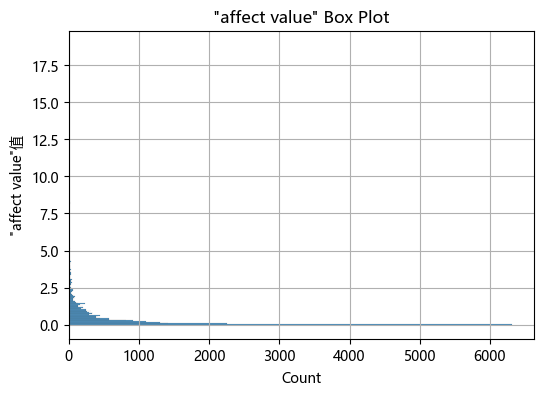

       affect value
count  52152.000000
mean      -2.461338
std       12.821446
min     -171.276092
25%       -1.294676
50%       -0.507910
75%       -0.150610
max       -0.000024


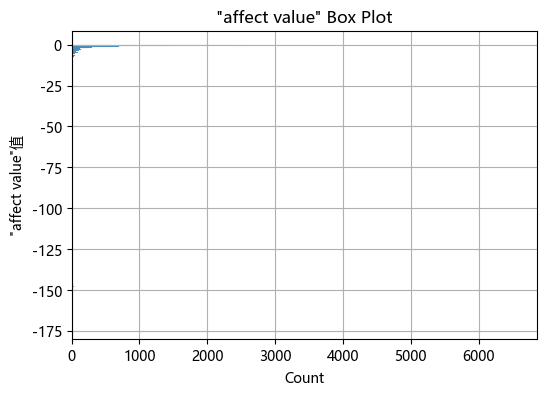

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import json

# 讀取新聞 JSON 檔案
news_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p關鍵字權重.json"
with open(news_file, "r", encoding="utf-8") as f:
    news_data = json.load(f)

# 提取 "affect value" 的值
affect_values = [entry["affect value"] for entry in news_data]
affect_values_p=[]
affect_values_n=[]
for   entry in news_data:
    if entry["affect value"]>=0:
        affect_values_p.append(entry["affect value"])
    if entry["affect value"]<0:
        affect_values_n.append(entry["affect value"])

# 轉為 DataFrame
af = pd.DataFrame(affect_values_p, columns=["affect value"])
p_std=af.std()
print(type(p_std))
p_std = p_std.iloc[0] if isinstance(p_std, pd.Series) else p_std
print(type(p_std))
# 顯示描述統計
print(af.describe())
# Set a font that supports Chinese characters
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly

# 繪製 ATR 盒狀圖
plt.figure(figsize=(6, 4))
sns.histplot(y=af['affect value'])
plt.title('"affect value" Box Plot')
plt.ylabel('"affect value"值')
plt.grid(True)
plt.show()

# 轉為 DataFrame
af = pd.DataFrame(affect_values_n, columns=["affect value"])

# 顯示描述統計
print(af.describe())
# Set a font that supports Chinese characters
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly

# 繪製 ATR 盒狀圖
plt.figure(figsize=(6, 4))
sns.histplot(y=af['affect value'])
plt.title('"affect value" Box Plot')
plt.ylabel('"affect value"值')
plt.grid(True)
plt.show()




## 算每天分類加權值

In [ ]:
import pandas as pd
import numpy as np
import json

# Logicle 轉換函數
def logicle_transform(x, T=20, W=0.5, M=5, A=-2.22):
    return np.log10((10**(M * (x - A) / (T - A)) + 1) / (10**(W) + 1))

# 讀取新聞 JSON 檔案
news_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p關鍵字權重.json"
with open(news_file, "r", encoding="utf-8") as f:
    news_data = json.load(f)

# 讀取股票 CSV 檔案
stock_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_lognormal_abs.csv"
stock_df = pd.read_csv(stock_file)

# 轉換日期格式
stock_df['日期'] = pd.to_datetime(stock_df['日期'])
stock_df = stock_df.sort_values(by='日期')  # 確保日期排序

def find_recent_trading_day(all_dates, stock_dates):
    """尋找每個新聞日對應的最近未來交易日"""
    recent_trade_date = {}
    for current_date in all_dates:
        future_dates = stock_dates[stock_dates > current_date]
        if not future_dates.empty:
            recent_trade_date[current_date] = future_dates.iloc[0]
        else:
            print(f"⚠️ 忽略日期 {current_date}，因為沒有未來的交易日")
    return recent_trade_date

# 建立新聞日期列表
news_dates = pd.to_datetime([entry["date"] for entry in news_data])
stock_dates = stock_df['日期']
recent_trade_dict = find_recent_trading_day(news_dates, stock_dates)

# 建立影響值字典
impact_dict = {}
for entry in news_data:
    news_date = pd.to_datetime(entry["date"])  # 轉換為日期格式
    affect_value = entry["affect value"]
    topic_distribution = entry["topic_distribution"]
    
    # 找到對應的交易日
    if news_date not in recent_trade_dict:
        continue  # 若無未來交易日則跳過
    trade_date = recent_trade_dict[news_date]
    
    if trade_date not in impact_dict:
        impact_dict[trade_date] = {}
    
    affect_transformed = logicle_transform(affect_value)  # 確保每篇文章的轉換值對應自身 affect_value
    
    for topic, value in topic_distribution.items():
        adjusted_value = value * affect_transformed  # 使用該篇文章的 affect_value 轉換值
        if affect_value >= 54:
            impact_dict[trade_date][f"{topic}_正"] = impact_dict[trade_date].get(f"{topic}_正", 0) + adjusted_value
        elif affect_value<-74:
            impact_dict[trade_date][f"{topic}_負"] = impact_dict[trade_date].get(f"{topic}_負", 0) + adjusted_value

# 合併影響數據到股票資料
for date, impacts in impact_dict.items():
    for column, value in impacts.items():
        if column not in stock_df.columns:
            stock_df[column] = 0.0  # 設定為 float64，避免 dtype 衝突
        stock_df.loc[stock_df['日期'] == date, column] = float(value)  # 顯式轉換為 float

# 儲存結果
output_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_p關鍵字_2.csv"
stock_df.to_csv(output_file, index=False, encoding="utf-8-sig")

print("處理完成，結果已儲存至:", output_file)


KeyboardInterrupt: 

指數遞減5天

In [ ]:
import pandas as pd
import numpy as np
import json

# Logicle 轉換函數
def logicle_transform(x, T=15, W=0.5, M=7, A=-1.15):
    return np.log10((10**(M * (x - A) / (T - A)) + 1) / (10**(W) + 1))
def dl(x):
    return np.sign(x)*np.log10(1+np.log10(1+np.abs(x)))
# 讀取新聞 JSON 檔案
news_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2021~2024_大盤_p關鍵字權重.json"
with open(news_file, "r", encoding="utf-8") as f:
    news_data = json.load(f)

# 讀取股票 CSV 檔案
stock_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_lognormal_abs.csv"
stock_df = pd.read_csv(stock_file)

# 轉換日期格式，並依日期排序
stock_df['日期'] = pd.to_datetime(stock_df['日期'])
stock_df = stock_df.sort_values(by='日期')

# 建立所有交易日的清單（已排序）
trading_days = stock_df['日期'].tolist()

def find_first_trading_day(news_date, trading_days):
    """尋找給定新聞日期的第一個未來交易日"""
    for t in trading_days:
        if t > news_date:
            return t
    return None

# 指數遞減的權重函數，day_offset 為第幾個交易日 (0 為第一天，不遞減)
def decay_weight(day_offset, decay_rate=0.2):
    return np.exp(-day_offset*decay_rate) 
    # 或使用 np.exp(-day_offset) 也可以

# 建立影響值字典
impact_dict = {}

for entry in news_data:
    news_date = pd.to_datetime(entry["date"])  # 轉換為日期格式
    affect_value = entry["affect value"]
    topic_distribution = entry["topic_distribution"]
    
    # 找到第一個交易日
    first_trade_date = find_first_trading_day(news_date, trading_days)
    if first_trade_date is None:
        print(f"⚠️ 忽略日期 {news_date}，因為沒有未來的交易日")
        continue
    
    try:
        start_index = trading_days.index(first_trade_date)
    except ValueError:
        print(f"⚠️ 未找到交易日 {first_trade_date} 在交易日清單中")
        continue
    if affect_value>=0:
        #_1d
        #affect_transformed = logicle_transform(affect_value,T=10,W=2,M=4,A=-10)
        #_1d_排
        affect_transformed = logicle_transform(affect_value,T=20,W=0.5,M=5,A=-2.22)

    else:
        #_1d
        #affect_transformed = logicle_transform(affect_value,T=30,W=2,M=5,A=-20)
        #_1d_排
        affect_transformed = logicle_transform(affect_value,T=171,W=4,M=6,A=-342)

    # 對後五天（包含第一天）依序累加影響值，使用指數遞減權重
    for day_offset in range(1):
        idx = start_index + day_offset
        if idx >= len(trading_days):
            break  # 超出範圍則結束
        
        trade_day = trading_days[idx]
        weight = decay_weight(day_offset)  # 計算對應的衰減權重
        
        # 根據新聞中各主題的分布，調整後累加
        for topic, value in topic_distribution.items():
            #adjusted_value = value * affect_transformed * weight
            adjusted_value = value * affect_transformed * affect_value

            # 僅針對符合門檻的新聞進行累加
            if affect_value >= 0.611832:
                key = f"{topic}_正"
            elif affect_value < -0.819721:
                key = f"{topic}_負"
            else:
                continue  # 不符合門檻則略過
            if trade_day not in impact_dict:
                impact_dict[trade_day] = {}
            impact_dict[trade_day][key] = impact_dict[trade_day].get(key, 0) + adjusted_value


for date, keywords in impact_dict.items():
    for key in keywords:  # 遍歷內部字典的鍵
        impact_dict[date][key] = dl(impact_dict[date][key])  # 修正這行


# 合併影響數據到股票資料中
for date, impacts in impact_dict.items():
    for column, value in impacts.items():
        if column not in stock_df.columns:
            stock_df[column] = 0.0  # 初始化為 float 型別
        stock_df.loc[stock_df['日期'] == date, column] = float(value)

# 儲存結果
output_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_p關鍵字_指.csv"
stock_df.to_csv(output_file, index=False, encoding="utf-8-sig")

print("處理完成，結果已儲存至:", output_file)


⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2023-12-29 00:00:

In [ ]:
import pandas as pd
import numpy as np
import json

# Logicle 轉換函數
def logicle_transform(x, T=70.5, W=0.5, M=4.5, A=-8.8):
    return np.log10((10**(M * (x - A) / (T - A)) + 1) / (10**(W) + 1))

# 讀取新聞 JSON 檔案
news_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\3_鉅亨_2024~2025_大盤_p關鍵字權重.json"
with open(news_file, "r", encoding="utf-8") as f:
    news_data = json.load(f)

# 讀取股票 CSV 檔案
stock_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_大盤_lognormal_abs.csv"
stock_df = pd.read_csv(stock_file)

# 轉換日期格式，並依日期排序
stock_df['日期'] = pd.to_datetime(stock_df['日期'])
stock_df = stock_df.sort_values(by='日期')

# 建立所有交易日的清單（已排序）
trading_days = stock_df['日期'].tolist()

def find_first_trading_day(news_date, trading_days):
    """尋找給定新聞日期的第一個未來交易日"""
    for t in trading_days:
        if t > news_date:
            return t
    return None

# 指數遞減的權重函數，day_offset 為第幾個交易日 (0 為第一天，不遞減)
def decay_weight(day_offset, decay_rate=0.8):
    return decay_rate ** day_offset
    # 或使用 np.exp(-day_offset) 也可以

# 建立影響值字典
impact_dict = {}

for entry in news_data:
    news_date = pd.to_datetime(entry["date"])  # 轉換為日期格式
    affect_value = entry["affect value"]
    topic_distribution = entry["topic_distribution"]
    
    # 找到第一個交易日
    first_trade_date = find_first_trading_day(news_date, trading_days)
    if first_trade_date is None:
        print(f"⚠️ 忽略日期 {news_date}，因為沒有未來的交易日")
        continue
    
    try:
        start_index = trading_days.index(first_trade_date)
    except ValueError:
        print(f"⚠️ 未找到交易日 {first_trade_date} 在交易日清單中")
        continue
    
    affect_transformed = logicle_transform(affect_value)
    
    # 對後五天（包含第一天）依序累加影響值，使用指數遞減權重
    for day_offset in range(5):
        idx = start_index + day_offset
        if idx >= len(trading_days):
            break  # 超出範圍則結束
        
        trade_day = trading_days[idx]
        weight = decay_weight(day_offset)  # 計算對應的衰減權重
        
        # 根據新聞中各主題的分布，調整後累加
        for topic, value in topic_distribution.items():
            adjusted_value = value * affect_transformed * weight
            # 僅針對符合門檻的新聞進行累加
            if affect_value >= 54:
                key = f"{topic}"
            elif affect_value < -74:
                key = f"{topic}"
            else:
                continue  # 不符合門檻則略過
            if trade_day not in impact_dict:
                impact_dict[trade_day] = {}
            impact_dict[trade_day][key] = impact_dict[trade_day].get(key, 0) + adjusted_value

# 合併影響數據到股票資料中
for date, impacts in impact_dict.items():
    for column, value in impacts.items():
        if column not in stock_df.columns:
            stock_df[column] = 0.0  # 初始化為 float 型別
        stock_df.loc[stock_df['日期'] == date, column] = float(value)

# 儲存結果
output_file = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_大盤_總_p關鍵字.csv"
stock_df.to_csv(output_file, index=False, encoding="utf-8-sig")

print("處理完成，結果已儲存至:", output_file)


⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:00，因為沒有未來的交易日
⚠️ 忽略日期 2024-12-31 00:00:

Top 10 words by weighted value:
鍺: 19.0
ESPN: 16.5
口至: 16.0
尼古拉: 14.0
古拉: 14.0
肝炎: 14.0
哨站: 13.5
德永業: 13.0
遊艇: 12.0
誠品: 10.0

Bottom 10 words by weighted value:
eBay: -8.0
土銀: -8.0
盧志遠: -8.5
支行: -9.0
法拉利: -9.0
Cruise: -10.0
開盤價: -12.0
稜: -12.0
泰山: -17.5
OKX: -22.5

# 圖  
1.算各標籤延後0~10或提前10~延後10天對應ATR做單變數回歸，紀錄各標籤各時間的變數anova表  
2.畫各標籤延後0~10或提前10~延後10天對ATR做散佈圖

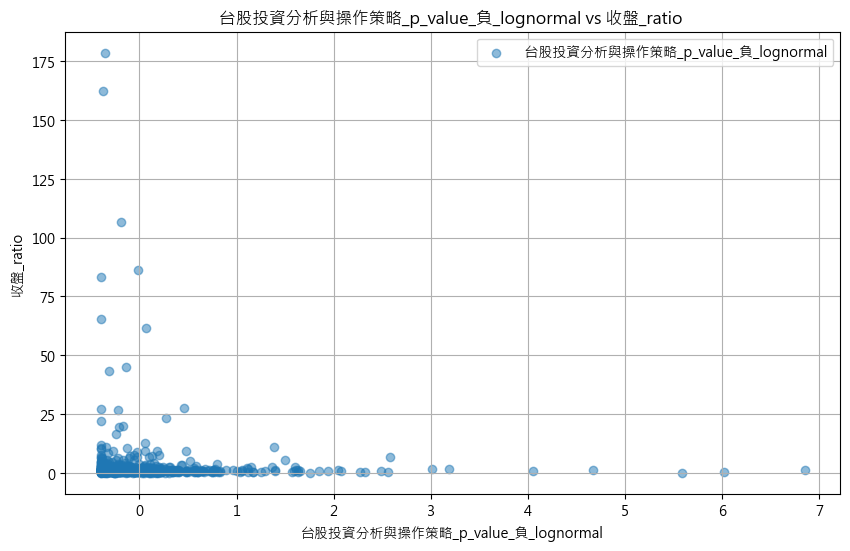

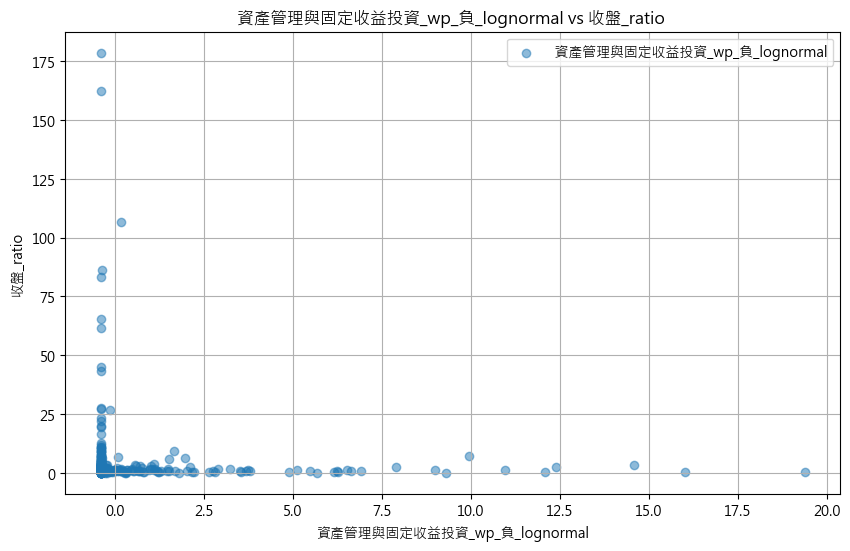

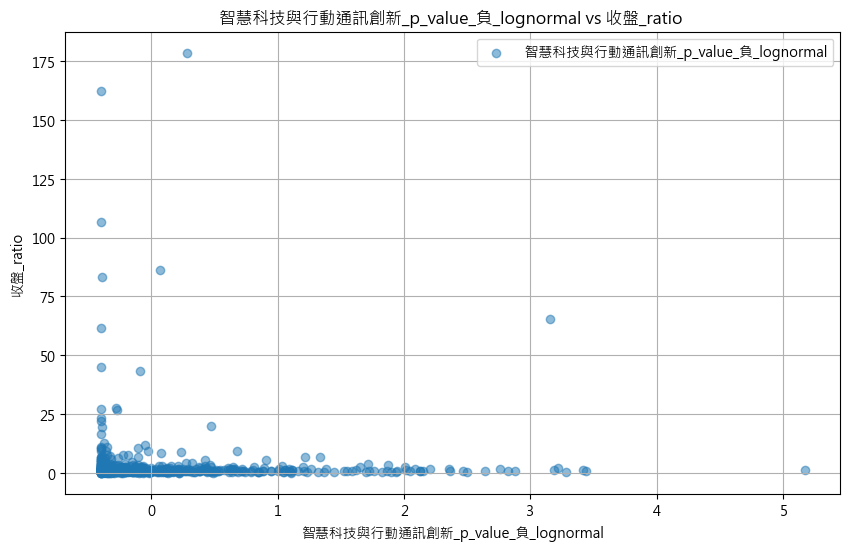

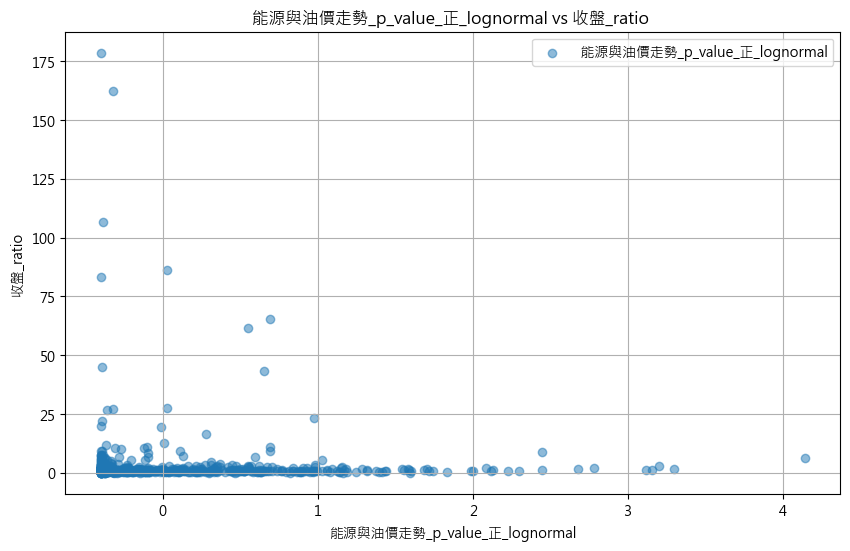

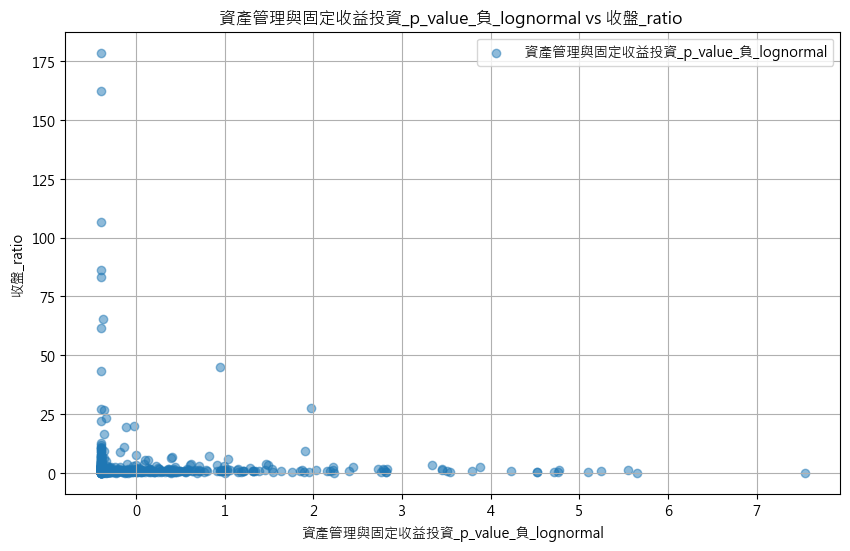

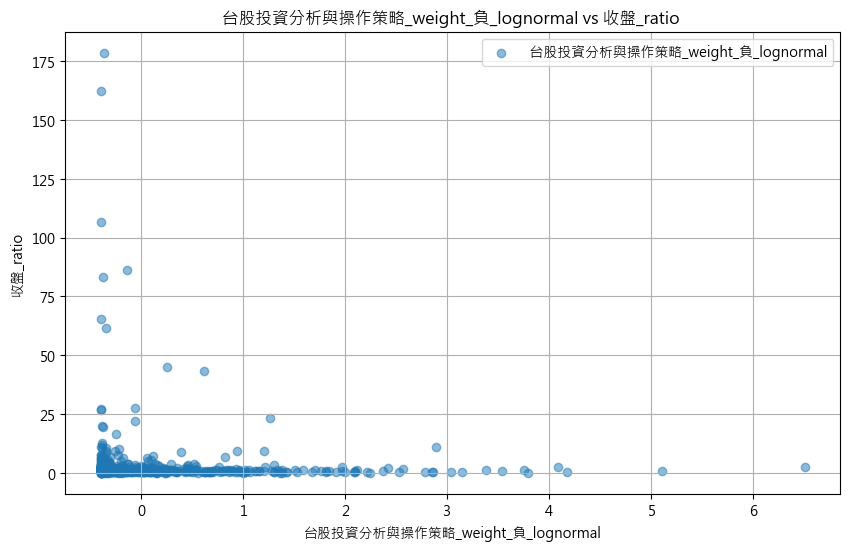

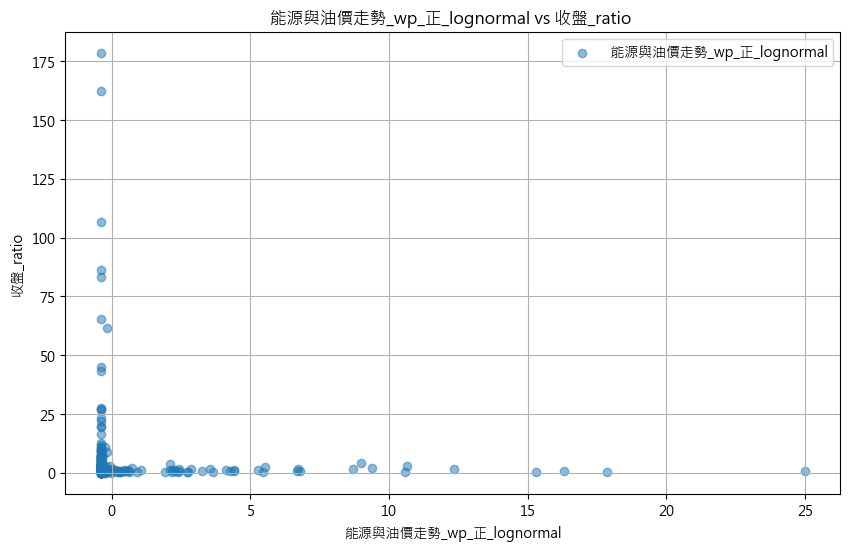

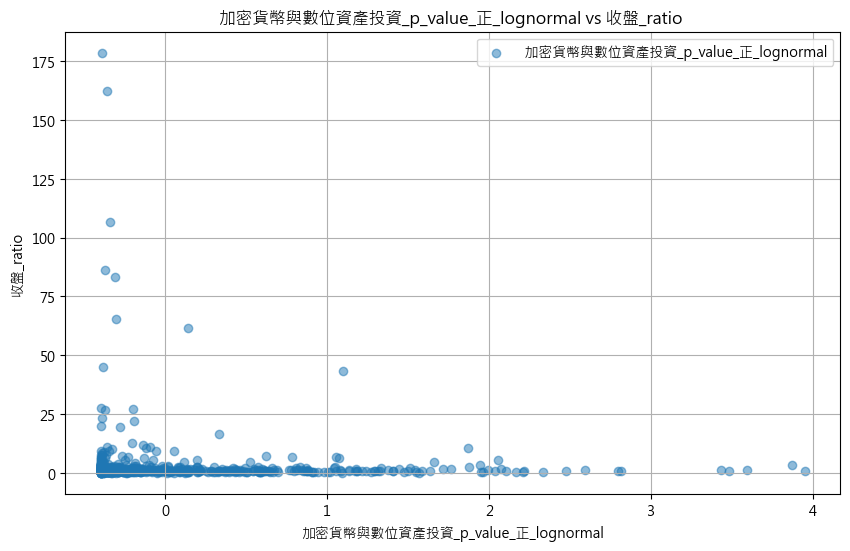

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import os

# Read the CSV file
file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_p關鍵字_指_1d.csv"
df = pd.read_csv(file_path)

# Convert ROC dates to Gregorian dates
df['date'] = df['日期']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Define categories and regression categories
#categories = ['彩票_佔比', '房产_佔比', '时政_佔比', '社会_佔比', '科技_佔比', '股票_佔比', '财经_佔比']
#regression_categories = ['彩票_佔比', '时政_佔比', '社会_佔比', '科技_佔比', '股票_佔比', '财经_佔比']

categories=['台股投資分析與操作策略_p_value_負_lognormal', '資產管理與固定收益投資_wp_負_lognormal', '智慧科技與行動通訊創新_p_value_負_lognormal', '能源與油價走勢_p_value_正_lognormal', '資產管理與固定收益投資_p_value_負_lognormal', '台股投資分析與操作策略_weight_負_lognormal', '能源與油價走勢_wp_正_lognormal', '加密貨幣與數位資產投資_p_value_正_lognormal']


# Set font for displaying Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Microsoft JhengHei for Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus sign is displayed correctly

# Create directory for saving ANOVA results
anova_dir = "anova_results"
os.makedirs(anova_dir, exist_ok=True)


# Plot scatter plots with all delay_days on a single figure per category
for category in categories:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[category], df['收盤_ratio'], label=f' {category}', alpha=0.5)
    plt.xlabel(category)
    plt.ylabel('收盤_ratio')
    plt.title(f'{category} vs 收盤_ratio ')
    plt.legend()
    plt.grid(True)
    plt.show()



# 回歸模型
從上程式的各標籤各延後時間的anova表，找PR(>F)最小的天，得知延後(或提前)該天和ATR相關性最為顯著，而判斷該類新聞會而判斷該類新聞會延後(或提前)該天造成最顯著的影響


In [ ]:
import pandas as pd

# Read the combined ANOVA results CSV file
anova_file = r'C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\anova_combined_results.csv'
anova_df = pd.read_csv(anova_file)

# Extract the necessary columns
anova_df = anova_df[['category', 'delay_day', 'PR(>F)']]

# Find the delay_day with the minimum PR(>F) for each category
min_prf_results = anova_df.loc[anova_df.groupby('category')['PR(>F)'].idxmin()]
print(min_prf_results)
# Convert category-delay_day pairs to a dictionary
delay_dict = dict(zip(min_prf_results['category'], min_prf_results['delay_day']))

# Read the original data file
file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\陽明海運_關鍵字.csv"
df = pd.read_csv(file_path)

# Apply delay shifts for each category
for category, delay in delay_dict.items():
    df[f"{category}_delayed"] = df[category].shift(-delay)
    df[f"{category}_delayed"] = df[f"{category}_delayed"].ffill()

# Save the new dataset
new_file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\陽明海運_關鍵字_移.csv"
df.to_csv(new_file_path, index=False)

# Print confirmation
print(f"New dataset saved to {new_file_path}")


           category  delay_day    PR(>F)
9948  亞洲金融市場與企業動態_正         24  0.086411
4696  亞洲金融市場與企業動態_負        -22  0.020379
7690    企業治理與併購動向_正        -25  0.000815
2540    企業治理與併購動向_負        -20  0.003120
9460    企業營收與獲利表現_正         20  0.000133
...             ...        ...       ...
3208   電動汽車與新能源市場_負         14  0.006184
9500   電子消費產品與零組件_正        -20  0.048249
4404   電子消費產品與零組件_負         12  0.017871
6826     面板與顯示器產業_正         23  0.044272
1666     面板與顯示器產業_負         23  0.053855

[86 rows x 3 columns]
New dataset saved to C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\陽明海運_關鍵字_移.csv


取50天 
迭150次  
有往前看  
    category  delay_day    PR(>F)  
8      彩票_佔比         -6  0.000013  
44     时政_佔比         -9  0.020679  
92     社会_佔比         -6  0.000004  
146    科技_佔比          0  0.046656  
200    股票_佔比          6  0.029615  
246    财经_佔比          8  0.03024  
迭3次(困惑度最小)  
有往前看  
    category  delay_day        PR(>F)  
8      彩票_佔比         -6  1.703074e-07  
60     时政_佔比         -1  2.166780e-03  
94     社会_佔比         -5  1.278666e-06  
154    科技_佔比          4  7.907983e-04  
174    股票_佔比         -7  2.567325e-06  
234    财经_佔比          2  1.087503e-03    
 
取20天  
有往前看  
    category  delay_day    PR(>F)  
12     彩票_佔比         -4  0.014135  
42     时政_佔比        -10  0.267542  
92     社会_佔比         -6  0.097191  
148    科技_佔比          1  0.205488  
206    股票_佔比          9  0.062208  
218    财经_佔比         -6  0.005329  
只往後看  
    category  delay_day    PR(>F)  
10     彩票_佔比          5  0.045334  
34     时政_佔比          6  0.390741  
64     社会_佔比         10  0.112263  
68     科技_佔比          1  0.205488  
106    股票_佔比          9  0.062208  
122    财经_佔比          6  0.211512  

指數衰減  
取50天迭代3次  
    category  delay_day        PR(>F)   
8      彩票_佔比         -6  3.836972e-10  
68     时政_佔比          3  1.933399e-04  
90     社会_佔比         -7  5.144809e-07  
150    科技_佔比          2  3.481065e-14  
174    股票_佔比         -7  8.550884e-07  
216    财经_佔比         -7  4.826061e-04    



觀察判斷最顯著天圖形

C:\Users\walter\AppData\Local\Temp\ipykernel_11024\1296027623.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


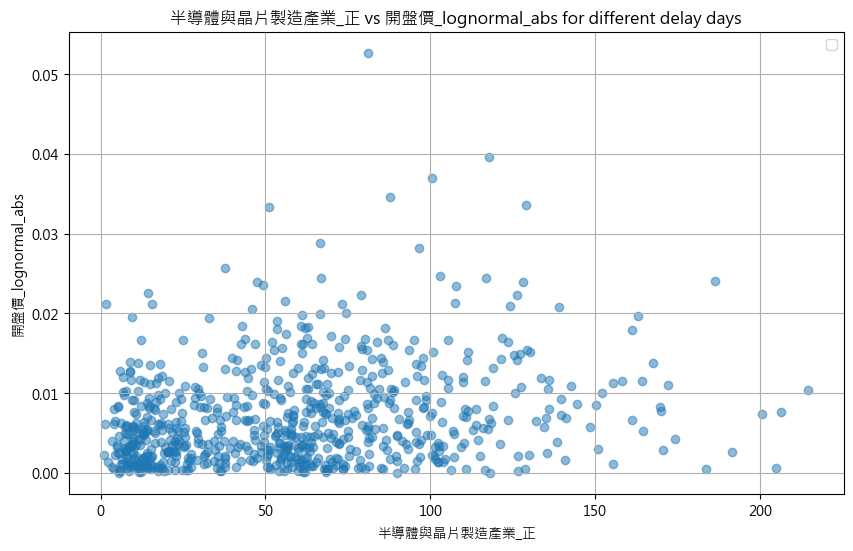

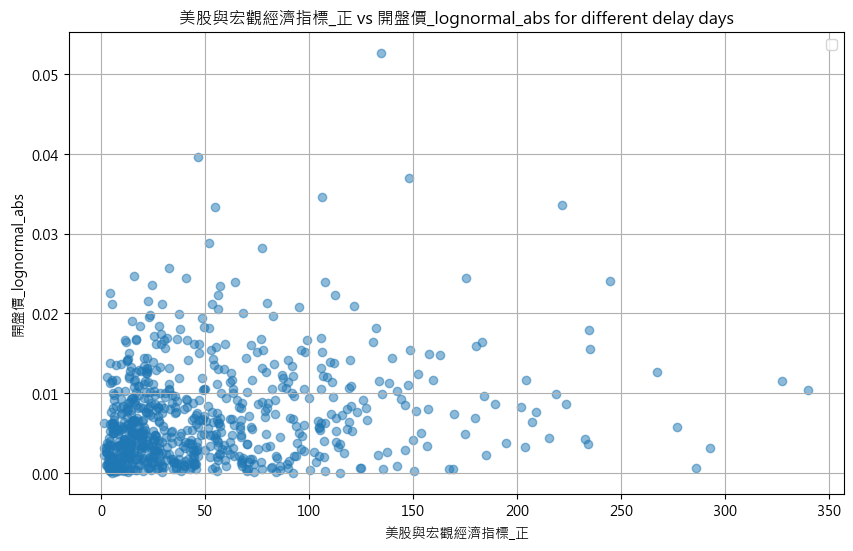

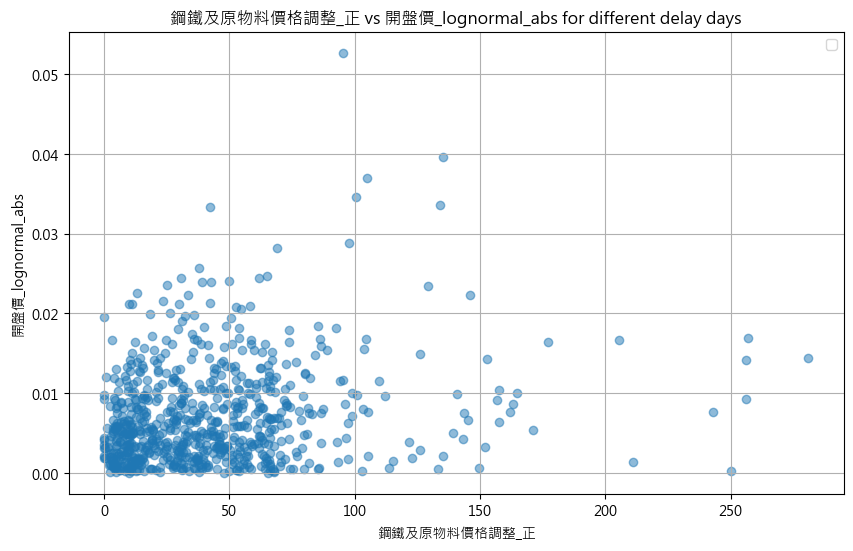

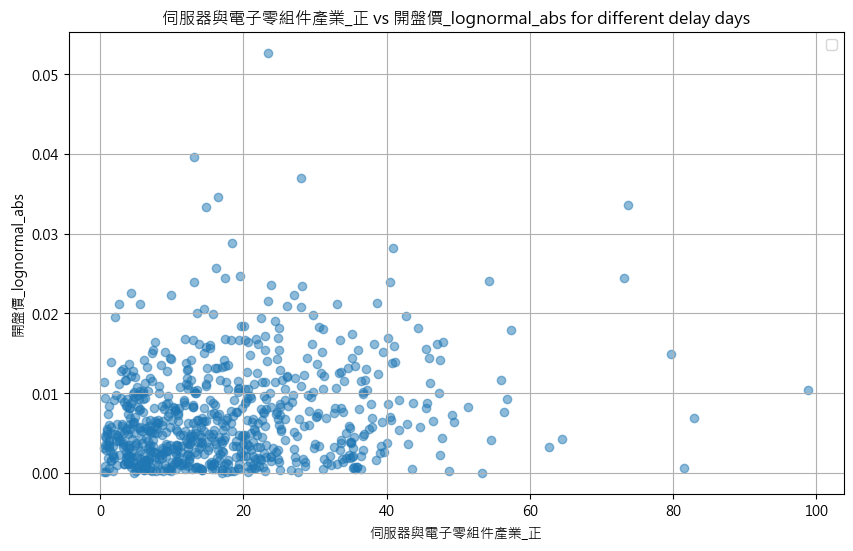

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import os

# Function to convert ROC date to Gregorian date
def convert_date(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # Convert ROC year to AD year
    return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

# Read the CSV file
file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_p關鍵字_指.csv"
df = pd.read_csv(file_path)

# Convert ROC dates to Gregorian dates
df['date'] = df['日期']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Define categories and regression categories
#regression_categories = ['彩票_佔比_delayed', '时政_佔比_delayed', '社会_佔比_delayed', '科技_佔比_delayed', '股票_佔比_delayed', '财经_佔比_delayed']
#regression_categories = ["投資_佔比_delayed","科技業_佔比_delayed","宏觀經濟_佔比_delayed","股市_佔比_delayed","創新_佔比_delayed","房產_佔比_delayed"]
#全
#regression_categories = ["台股市場與基本面趨勢_負", "伺服器與電子零組件產業_負", "零售與消費市場_負", "加密貨幣與數位資產投資_負", "半導體與晶片製造產業_負", "政府與政治監管_負", "資產管理與固定收益投資_負", "醫療與製藥產業_負", "太空科技與低軌衛星_負", "美股與宏觀經濟指標_負", "能源與油價走勢_負", "製造業廠房建設與產能擴充_負", "通用討論與雜項詞彙_負", "面板與顯示器產業_負", "國際貿易與全球供應鏈_負", "航空與航太業_負", "期貨與衍生品交易_負", "產業轉型與創新科技_負", "房地產與疫情防控_負", "宏觀經濟與貨幣政策_負", "證券監管與上市規範_負", "企業治理與併購動向_負", "旅遊與休閒消費服務_負", "鋼鐵及原物料價格調整_負", "出口訂單與經濟景氣指標_負", "智慧科技與行動通訊創新_負", "電動汽車與新能源市場_負", "工具機與工業設備產業_負", "航運物流與全球供應鏈_負", "企業財報與業績表現_負", "金融股利與財務表現_負", "台灣房地產與住宅市場_負", "台股交易與資金流向_負", "財政稅收與補貼政策_負", "銀行與金融服務業_負", "企業營收與獲利表現_負", "電子消費產品與零組件_負", "再生能源與綠能發展_負", "台股投資分析與操作策略_負", "亞洲金融市場與企業動態_負", "經營統計與業績規模紀錄_負", "保險與風險保障服務_負", "科技巨頭與股價評估_負", "台股市場與基本面趨勢_正", "伺服器與電子零組件產業_正", "零售與消費市場_正", "加密貨幣與數位資產投資_正", "半導體與晶片製造產業_正", "政府與政治監管_正", "資產管理與固定收益投資_正", "醫療與製藥產業_正", "太空科技與低軌衛星_正", "美股與宏觀經濟指標_正", "能源與油價走勢_正", "製造業廠房建設與產能擴充_正", "通用討論與雜項詞彙_正", "面板與顯示器產業_正", "國際貿易與全球供應鏈_正", "航空與航太業_正", "期貨與衍生品交易_正", "產業轉型與創新科技_正", "房地產與疫情防控_正", "宏觀經濟與貨幣政策_正", "證券監管與上市規範_正", "企業治理與併購動向_正", "旅遊與休閒消費服務_正", "鋼鐵及原物料價格調整_正", "出口訂單與經濟景氣指標_正", "智慧科技與行動通訊創新_正", "電動汽車與新能源市場_正", "工具機與工業設備產業_正", "航運物流與全球供應鏈_正", "企業財報與業績表現_正", "金融股利與財務表現_正", "台灣房地產與住宅市場_正", "台股交易與資金流向_正", "財政稅收與補貼政策_正", "銀行與金融服務業_正", "企業營收與獲利表現_正", "電子消費產品與零組件_正", "再生能源與綠能發展_正", "台股投資分析與操作策略_正", "亞洲金融市場與企業動態_正", "經營統計與業績規模紀錄_正", "保險與風險保障服務_正", "科技巨頭與股價評估_正"]
#佳
regression_categories = ["半導體與晶片製造產業_正","美股與宏觀經濟指標_正","鋼鐵及原物料價格調整_正","伺服器與電子零組件產業_正",]


# Set font for displaying Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Microsoft JhengHei for Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus sign is displayed correctly

# Plot scatter plots with all delay_days on a single figure per category
for category in regression_categories:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[category], df['開盤指數_lognormal_abs'], alpha=0.5)
    plt.xlabel(category)
    plt.ylabel('開盤價_lognormal_abs')
    plt.title(f'{category} vs 開盤價_lognormal_abs for different delay days')
    plt.legend()
    plt.grid(True)
    plt.show()


經指數衰減處理，相關性看起來大很多

將所有參數當解釋變數(有經過前面平移)，ATR當目標參數進行回歸 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import os

# Read the CSV file
file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_陽明海運_p關鍵字_指_3d.csv"
df = pd.read_csv(file_path)

# Convert ROC dates to Gregorian dates
df['date'] = df['日期']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Define categories and regression categories
#categories = ['彩票_佔比', '房产_佔比', '时政_佔比', '社会_佔比', '科技_佔比', '股票_佔比', '财经_佔比']
#regression_categories = ['彩票_佔比', '时政_佔比', '社会_佔比', '科技_佔比', '股票_佔比', '财经_佔比']

regression_categories = ["台股市場與基本面趨勢_負", "伺服器與電子零組件產業_負", "零售與消費市場_負", "加密貨幣與數位資產投資_負", "半導體與晶片製造產業_負", "政府與政治監管_負", "資產管理與固定收益投資_負", "醫療與製藥產業_負", "太空科技與低軌衛星_負", "美股與宏觀經濟指標_負", "能源與油價走勢_負", "製造業廠房建設與產能擴充_負", "通用討論與雜項詞彙_負", "面板與顯示器產業_負", "國際貿易與全球供應鏈_負", "航空與航太業_負", "期貨與衍生品交易_負", "產業轉型與創新科技_負", "房地產與疫情防控_負", "宏觀經濟與貨幣政策_負", "證券監管與上市規範_負", "企業治理與併購動向_負", "旅遊與休閒消費服務_負", "鋼鐵及原物料價格調整_負", "出口訂單與經濟景氣指標_負", "智慧科技與行動通訊創新_負", "電動汽車與新能源市場_負", "工具機與工業設備產業_負", "航運物流與全球供應鏈_負", "企業財報與業績表現_負", "金融股利與財務表現_負", "台灣房地產與住宅市場_負", "台股交易與資金流向_負", "財政稅收與補貼政策_負", "銀行與金融服務業_負", "企業營收與獲利表現_負", "電子消費產品與零組件_負", "再生能源與綠能發展_負", "台股投資分析與操作策略_負", "亞洲金融市場與企業動態_負", "經營統計與業績規模紀錄_負", "保險與風險保障服務_負", "科技巨頭與股價評估_負", "台股市場與基本面趨勢_正", "伺服器與電子零組件產業_正", "零售與消費市場_正", "加密貨幣與數位資產投資_正", "半導體與晶片製造產業_正", "政府與政治監管_正", "資產管理與固定收益投資_正", "醫療與製藥產業_正", "太空科技與低軌衛星_正", "美股與宏觀經濟指標_正", "能源與油價走勢_正", "製造業廠房建設與產能擴充_正", "通用討論與雜項詞彙_正", "面板與顯示器產業_正", "國際貿易與全球供應鏈_正", "航空與航太業_正", "期貨與衍生品交易_正", "產業轉型與創新科技_正", "房地產與疫情防控_正", "宏觀經濟與貨幣政策_正", "證券監管與上市規範_正", "企業治理與併購動向_正", "旅遊與休閒消費服務_正", "鋼鐵及原物料價格調整_正", "出口訂單與經濟景氣指標_正", "智慧科技與行動通訊創新_正", "電動汽車與新能源市場_正", "工具機與工業設備產業_正", "航運物流與全球供應鏈_正", "企業財報與業績表現_正", "金融股利與財務表現_正", "台灣房地產與住宅市場_正", "台股交易與資金流向_正", "財政稅收與補貼政策_正", "銀行與金融服務業_正", "企業營收與獲利表現_正", "電子消費產品與零組件_正", "再生能源與綠能發展_正", "台股投資分析與操作策略_正", "亞洲金融市場與企業動態_正", "經營統計與業績規模紀錄_正", "保險與風險保障服務_正", "科技巨頭與股價評估_正"]





    
# Perform regression and save ANOVA table
for category in regression_categories:
    formula = f'開盤指數_lognormal_abs ~ {category}'
    train_df = df[df[category] != 0]  # 過濾 category 為 0 的 rows
    if len(train_df)==0:
        print(f"{category}都是0")
    else:
        model = ols(formula, data=train_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        for index, row in anova_table.iterrows():
            print(f"{index}: {row['PR(>F)']}")


台股市場與基本面趨勢_負: 2.4396142863253648e-32
Residual: nan
伺服器與電子零組件產業_負: 4.470942812049048e-24
Residual: nan
零售與消費市場_負: 7.998750389079537e-20
Residual: nan
加密貨幣與數位資產投資_負: 1.598640064587185e-08
Residual: nan
半導體與晶片製造產業_負: 0.00023422791472992418
Residual: nan
政府與政治監管_負: 2.1144359840203447e-07
Residual: nan
資產管理與固定收益投資_負: 5.5735901929182954e-11
Residual: nan
醫療與製藥產業_負: 6.483023007187706e-26
Residual: nan
太空科技與低軌衛星_負: 1.338401406305287e-08
Residual: nan
美股與宏觀經濟指標_負: 1.7149078425394393e-12
Residual: nan
能源與油價走勢_負: 4.215753031539916e-11
Residual: nan
製造業廠房建設與產能擴充_負: 1.286115983920004e-29
Residual: nan
通用討論與雜項詞彙_負: 1.1790922866204353e-33
Residual: nan
面板與顯示器產業_負: 7.025994810803514e-09
Residual: nan
國際貿易與全球供應鏈_負: 7.996834584033622e-12
Residual: nan
航空與航太業_負: 2.433127214357076e-34
Residual: nan
期貨與衍生品交易_負: 1.1653048695190247e-14
Residual: nan
產業轉型與創新科技_負: 5.537847882593246e-37
Residual: nan
房地產與疫情防控_負: 1.8166968575392108e-17
Residual: nan
宏觀經濟與貨幣政策_負: 2.336584126030483e-10
Residual: nan
證券監管與上市規範_負: 1

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import matplotlib
# 設定訓練與測試資料的檔案路徑
train_file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_總_p關鍵字.csv"
test_file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_大盤_總_p關鍵字.csv"

# 讀取訓練與測試數據
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# 轉換日期欄位
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
if 'date' in test_df.columns:
    test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')

# 確保 開盤價_lognormal_abs 欄位存在，並移除 NaN 值
train_df = train_df.dropna(subset=['開盤指數_lognormal_abs'])
test_df = test_df.dropna(subset=['開盤指數_lognormal_abs'])

# 加入索引特徵
train_df['idx'] = np.arange(len(train_df))
train_df['idx_squared'] = train_df['idx'] ** 2
train_df['idx_third'] = train_df['idx'] ** 3

test_df['idx'] = np.arange(len(test_df))
test_df['idx_squared'] = test_df['idx'] ** 2
test_df['idx_third'] = test_df['idx'] ** 3

# 加入 開盤價_lognormal_abs lag 特徵
ra = 2  # 設定 lag 數量

regression_categories = ["台股市場與基本面趨勢_負", "伺服器與電子零組件產業_負", "零售與消費市場_負", "加密貨幣與數位資產投資_負", "半導體與晶片製造產業_負", "政府與政治監管_負", "資產管理與固定收益投資_負", "醫療與製藥產業_負", "太空科技與低軌衛星_負", "美股與宏觀經濟指標_負", "能源與油價走勢_負", "製造業廠房建設與產能擴充_負", "通用討論與雜項詞彙_負", "面板與顯示器產業_負", "國際貿易與全球供應鏈_負", "航空與航太業_負", "期貨與衍生品交易_負", "產業轉型與創新科技_負", "房地產與疫情防控_負", "宏觀經濟與貨幣政策_負", "證券監管與上市規範_負", "企業治理與併購動向_負", "旅遊與休閒消費服務_負", "鋼鐵及原物料價格調整_負", "出口訂單與經濟景氣指標_負", "智慧科技與行動通訊創新_負", "電動汽車與新能源市場_負", "工具機與工業設備產業_負", "航運物流與全球供應鏈_負", "企業財報與業績表現_負", "金融股利與財務表現_負", "台灣房地產與住宅市場_負", "台股交易與資金流向_負", "財政稅收與補貼政策_負", "銀行與金融服務業_負", "企業營收與獲利表現_負", "電子消費產品與零組件_負", "再生能源與綠能發展_負", "台股投資分析與操作策略_負", "亞洲金融市場與企業動態_負", "經營統計與業績規模紀錄_負", "保險與風險保障服務_負", "科技巨頭與股價評估_負", "台股市場與基本面趨勢_正", "伺服器與電子零組件產業_正", "零售與消費市場_正", "加密貨幣與數位資產投資_正", "半導體與晶片製造產業_正", "政府與政治監管_正", "資產管理與固定收益投資_正", "醫療與製藥產業_正", "太空科技與低軌衛星_正", "美股與宏觀經濟指標_正", "能源與油價走勢_正", "製造業廠房建設與產能擴充_正", "通用討論與雜項詞彙_正", "面板與顯示器產業_正", "國際貿易與全球供應鏈_正", "航空與航太業_正", "期貨與衍生品交易_正", "產業轉型與創新科技_正", "房地產與疫情防控_正", "宏觀經濟與貨幣政策_正", "證券監管與上市規範_正", "企業治理與併購動向_正", "旅遊與休閒消費服務_正", "鋼鐵及原物料價格調整_正", "出口訂單與經濟景氣指標_正", "智慧科技與行動通訊創新_正", "電動汽車與新能源市場_正", "工具機與工業設備產業_正", "航運物流與全球供應鏈_正", "企業財報與業績表現_正", "金融股利與財務表現_正", "台灣房地產與住宅市場_正", "台股交易與資金流向_正", "財政稅收與補貼政策_正", "銀行與金融服務業_正", "企業營收與獲利表現_正", "電子消費產品與零組件_正", "再生能源與綠能發展_正", "台股投資分析與操作策略_正", "亞洲金融市場與企業動態_正", "經營統計與業績規模紀錄_正", "保險與風險保障服務_正", "科技巨頭與股價評估_正"]

for i in range(1, ra + 1):
    train_df[f'開盤指數_lognormal_abs_lag_{i}'] = train_df['開盤指數_lognormal_abs'].shift(i)
    test_df[f'開盤指數_lognormal_abs_lag_{i}'] = test_df['開盤指數_lognormal_abs'].shift(i)
    regression_categories.append(f'開盤指數_lognormal_abs_lag_{i}')

# 移除 NaN
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df = train_df[(train_df[regression_categories] > 0).all(axis=1)]

# 建立回歸模型
formula = '開盤指數_lognormal_abs ~ ' + ' + '.join(regression_categories)
model = ols(formula, data=train_df).fit()

# 顯示模型參數與 ANOVA 表格
anova_table = sm.stats.anova_lm(model, typ=2)
print("Regression Model Parameters:")
print(model.params)
print("\nANOVA Table PR(>F) Values:")
for index, row in anova_table.iterrows():
    print(f"{index}: {row['PR(>F)']}")
print("\nR^2:", model.rsquared)

# 在測試集上做預測
test_df['Prediction'] = model.predict(test_df[regression_categories])

# 計算殘差
test_df['Residuals'] = test_df['開盤指數_lognormal_abs'] - test_df['Prediction']
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly

# 繪製殘差直方圖
plt.figure(figsize=(8, 5))
sns.histplot(test_df['Residuals'], bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 殘差 vs. 索引圖
plt.figure(figsize=(8, 5))
plt.scatter(test_df.index, test_df['Residuals'], alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Index")
plt.show()

# 殘差 vs. 預測值
plt.figure(figsize=(8, 5))
plt.scatter(test_df['Prediction'], test_df['Residuals'], alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# 殘差 vs. 獨立變數
fig, axes = plt.subplots(9,9 , figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(regression_categories):
    sns.scatterplot(x=test_df[feature], y=test_df['Residuals'], ax=axes[i], color='blue', alpha=0.6)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {feature}")

plt.tight_layout()
plt.show()

# 正規 Q-Q 圖
fig = sm.qqplot(test_df['Residuals'], line='45', fit=True)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

# 計算誤差
test_df['Error'] = (test_df['開盤指數_lognormal_abs'] - test_df['Prediction']) ** 2


# 計算整體 MSE
overall_mse = test_df['Error'].mean()
train_var = train_df['開盤指數_lognormal_abs'].var()
error_ratio = overall_mse / train_var
print("\nOverall Mean Squared Error (MSE):", overall_mse)
print("Error Ratio in Training Variance:", error_ratio)


ValueError: zero-size array to reduction operation maximum which has no identity

取50天  
不延  
Regression Model Parameters:  
Intercept     5.780786  
彩票_佔比        -0.301415  
时政_佔比        -4.904652  
社会_佔比        -5.773163  
科技_佔比       -26.747298  
股票_佔比         3.615808  
财经_佔比       -15.876867  
dtype: float64  
  
ANOVA Table:  
              sum_sq     df         F    PR(>F)  
彩票_佔比       0.012964    1.0  0.009361  0.923034  
时政_佔比       1.943329    1.0  1.403167  0.237791  
社会_佔比       3.124722    1.0  2.256183  0.134874  
科技_佔比       4.544385    1.0  3.281239  0.071781  
股票_佔比       0.465579    1.0  0.336168  0.562791  
财经_佔比       4.945149    1.0  3.570608  0.060455  
Residual  243.752930  176.0       NaN       NaN  
  
Overall Mean Squared Error (MSE): 0.921032597062594  
延  
Regression Model Parameters:  
Intercept         3.925909  
彩票_佔比_delayed     1.179899  
时政_佔比_delayed    -0.313226  
社会_佔比_delayed    -1.687516  
科技_佔比_delayed   -31.241803  
股票_佔比_delayed    -6.388780  
财经_佔比_delayed     4.798386  
dtype: float64  
  
ANOVA Table:  
                   sum_sq     df         F    PR(>F)  
彩票_佔比_delayed    0.612166    1.0  0.427350  0.514145  
时政_佔比_delayed    0.016781    1.0  0.011715  0.913934  
社会_佔比_delayed    0.504503    1.0  0.352191  0.553637  
科技_佔比_delayed    6.417306    1.0  4.479892  0.035702  
股票_佔比_delayed    2.108789    1.0  1.472136  0.226635  
财经_佔比_delayed    0.544808    1.0  0.380328  0.538225  
Residual       252.114542  176.0       NaN       NaN

Overall Mean Squared Error (MSE): 0.7675487347623886

取50天迭3次(困惑度最小)
不延  
Regression Model Parameters:
Intercept     8.066444
彩票_佔比        -2.130526
时政_佔比        -5.020088
社会_佔比        -6.894035
科技_佔比       -23.094667
股票_佔比        -5.780264
财经_佔比       -20.152388
dtype: float64

ANOVA Table:
              sum_sq     df         F    PR(>F)
彩票_佔比       0.641846    1.0  0.527736  0.468525
时政_佔比       1.890197    1.0  1.554150  0.214181
社会_佔比       4.242013    1.0  3.487850  0.063483
科技_佔比       8.438094    1.0  6.937934  0.009190
股票_佔比       2.133724    1.0  1.754381  0.187044
财经_佔比      11.586130    1.0  9.526299  0.002353
Residual  214.055733  176.0       NaN       NaN

Overall Mean Squared Error (MSE): 1.3614234419182636
往前後看  
Regression Model Parameters:  
Intercept         4.000822  
彩票_佔比_delayed     1.955317  
时政_佔比_delayed    -2.593061  
社会_佔比_delayed    -5.833633  
科技_佔比_delayed   -23.823812  
股票_佔比_delayed     7.718796  
财经_佔比_delayed   -13.523832  
dtype: float64  
  
ANOVA Table:  
                   sum_sq     df         F    PR(>F)  
彩票_佔比_delayed    3.493327    1.0  2.878594  0.091532  
时政_佔比_delayed    1.078993    1.0  0.889119  0.347009  
社会_佔比_delayed    8.665742    1.0  7.140799  0.008243  
科技_佔比_delayed   10.306969    1.0  8.493213  0.004028  
股票_佔比_delayed    5.963867    1.0  4.914383  0.027915  
财经_佔比_delayed    7.764303    1.0  6.397990  0.012303  
Residual       213.585419  176.0       NaN       NaN  
  
R^2: 0.19502705394422715  

Overall Mean Squared Error (MSE): 1.5248896207280547  
觀察:  
1.延的誤差，PR(>F)有大有小，延不一定比較好  
2.迭3中迭3中除時政PR(>F)都很小，有顯著影響

指數衰減  
取50篇迭代3次  
Regression Model Parameters:  
Intercept         4.638850  
彩票_佔比_delayed     0.935111  
时政_佔比_delayed    -2.636270  
社会_佔比_delayed     1.809392  
科技_佔比_delayed   -15.697391  
股票_佔比_delayed     3.959718  
财经_佔比_delayed     5.142138  
dtype: float64  
  
ANOVA Table:  
                   sum_sq     df          F        PR(>F)  
彩票_佔比_delayed    1.531450    1.0   1.538903  2.164323e-01  
时政_佔比_delayed    1.944430    1.0   1.953893  1.639272e-01  
社会_佔比_delayed    0.727323    1.0   0.730863  3.937658e-01  
科技_佔比_delayed   51.694853    1.0  51.946452  1.612948e-11  
股票_佔比_delayed   10.026026    1.0  10.074823  1.774448e-03  
财经_佔比_delayed    5.369892    1.0   5.396027  2.132639e-02  
Residual       175.147555  176.0        NaN           NaN  
  
R^2: 0.34495833351307303  
  
Overall Mean Squared Error (MSE): 1.04348777282271  

修正取50天延的回歸模型

Regression Model Parameters:
Intercept: 0.004845459217368115
半導體與晶片製造產業_正: 0.0001257273425266419
美股與宏觀經濟指標_正: 3.4233417694838274e-05
鋼鐵及原物料價格調整_正: 9.26407898283716e-05
伺服器與電子零組件產業_正: 0.00027740946910985426
開盤指數_lognormal_abs_lag_1: 0.08427007056279236
開盤指數_lognormal_abs_lag_2: 0.07381994203421255

ANOVA Table PR(>F) Values:
半導體與晶片製造產業_正: 0.3806154364362063
美股與宏觀經濟指標_正: 0.4932674240042574
鋼鐵及原物料價格調整_正: 0.256665543212417
伺服器與電子零組件產業_正: 0.10244405477585838
開盤指數_lognormal_abs_lag_1: 0.048843972677453586
開盤指數_lognormal_abs_lag_2: 0.08178478638527824
Residual: nan

R^2: 0.0421970850659914


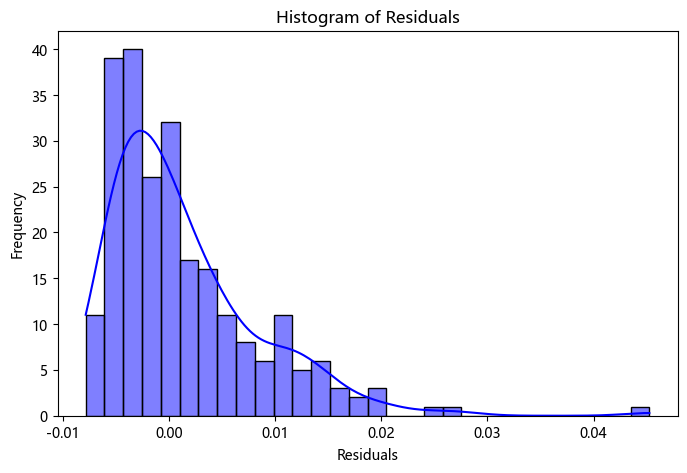

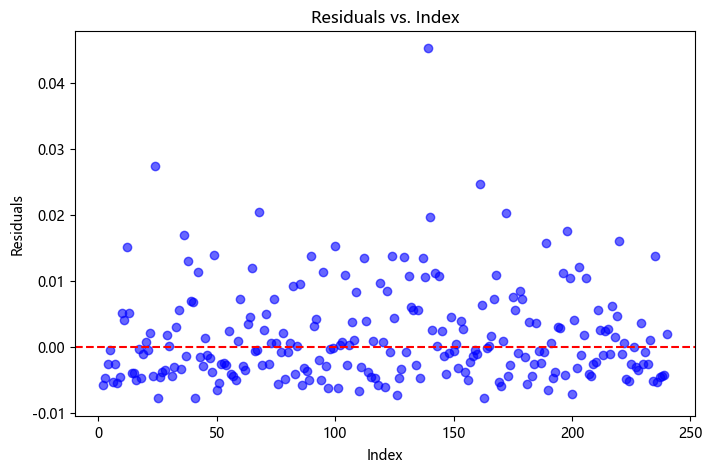

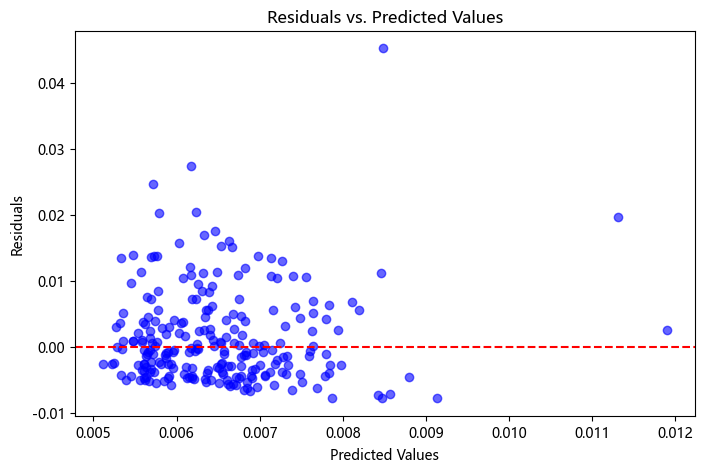

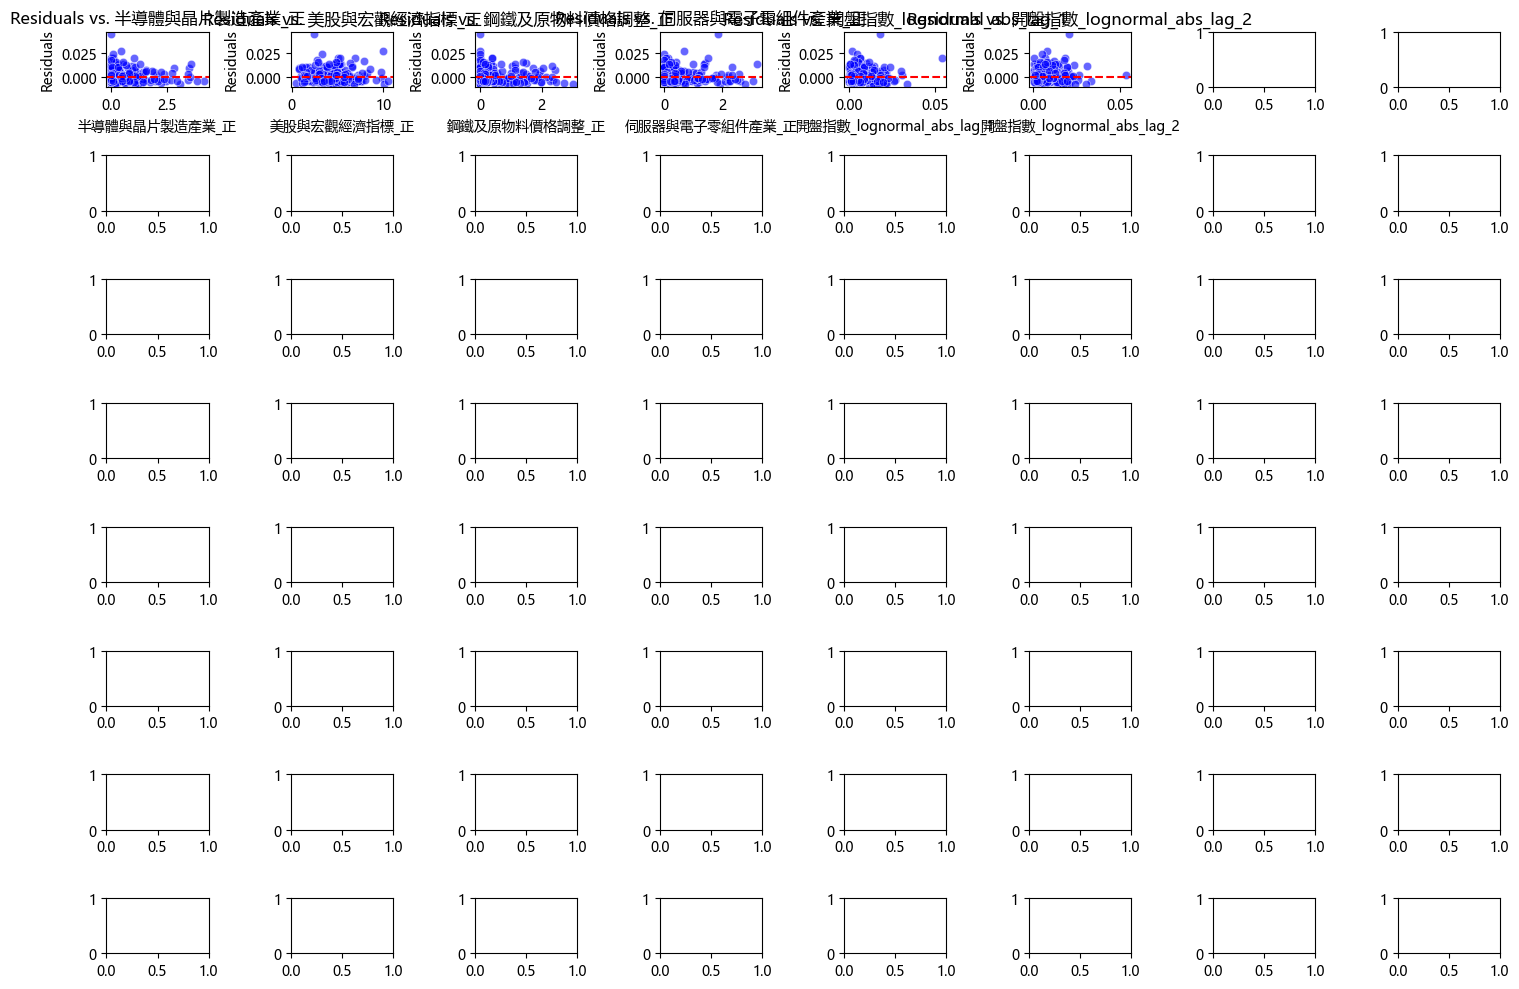

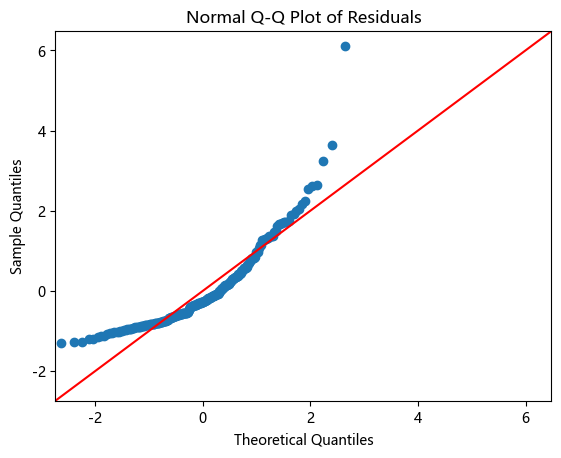


Overall Mean Squared Error (MSE): 5.3443796762568205e-05
Error Ratio in Training Variance: 1.2332687239767872
exp_mse 5.344522490768888e-05


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
import matplotlib
import math
# 設定訓練與測試資料的檔案路徑
train_file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2021~2024_大盤_p關鍵字.csv"
test_file_path = r"C:\Users\walter\OneDrive\桌面\收集\大學nn專題\股票分析\2024~2025_大盤_p關鍵字.csv"

# 讀取訓練與測試數據
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# 轉換日期欄位
if 'date' in train_df.columns:
    train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
if 'date' in test_df.columns:
    test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')

# 確保 開盤價_lognormal_abs 欄位存在，並移除 NaN 值
train_df = train_df.dropna(subset=['開盤指數_lognormal_abs'])
test_df = test_df.dropna(subset=['開盤指數_lognormal_abs'])

# 加入索引特徵
train_df['idx'] = np.arange(len(train_df))
train_df['idx_squared'] = train_df['idx'] ** 2
train_df['idx_third'] = train_df['idx'] ** 3

test_df['idx'] = np.arange(len(test_df))
test_df['idx_squared'] = test_df['idx'] ** 2
test_df['idx_third'] = test_df['idx'] ** 3

# 加入 開盤價_lognormal_abs lag 特徵
ra = 2# 設定 lag 數量
#分正負
#2021~2024_大盤_p關鍵字
#regression_categories = ["證券監管與上市規範_正","企業營收與獲利表現_正","再生能源與綠能發展_正"]
regression_categories = ["半導體與晶片製造產業_正","美股與宏觀經濟指標_正","鋼鐵及原物料價格調整_正","伺服器與電子零組件產業_正",]
#全
#regression_categories = ["台股市場與基本面趨勢_負", "伺服器與電子零組件產業_負", "零售與消費市場_負", "加密貨幣與數位資產投資_負", "半導體與晶片製造產業_負", "政府與政治監管_負", "資產管理與固定收益投資_負", "醫療與製藥產業_負", "太空科技與低軌衛星_負", "美股與宏觀經濟指標_負", "能源與油價走勢_負", "製造業廠房建設與產能擴充_負", "通用討論與雜項詞彙_負", "面板與顯示器產業_負", "國際貿易與全球供應鏈_負", "航空與航太業_負", "期貨與衍生品交易_負", "產業轉型與創新科技_負", "房地產與疫情防控_負", "宏觀經濟與貨幣政策_負", "證券監管與上市規範_負", "企業治理與併購動向_負", "旅遊與休閒消費服務_負", "鋼鐵及原物料價格調整_負", "出口訂單與經濟景氣指標_負", "智慧科技與行動通訊創新_負", "電動汽車與新能源市場_負", "工具機與工業設備產業_負", "航運物流與全球供應鏈_負", "企業財報與業績表現_負", "金融股利與財務表現_負", "台灣房地產與住宅市場_負", "台股交易與資金流向_負", "財政稅收與補貼政策_負", "銀行與金融服務業_負", "企業營收與獲利表現_負", "電子消費產品與零組件_負", "再生能源與綠能發展_負", "台股投資分析與操作策略_負", "亞洲金融市場與企業動態_負", "經營統計與業績規模紀錄_負", "保險與風險保障服務_負", "科技巨頭與股價評估_負", "台股市場與基本面趨勢_正", "伺服器與電子零組件產業_正", "零售與消費市場_正", "加密貨幣與數位資產投資_正", "半導體與晶片製造產業_正", "政府與政治監管_正", "資產管理與固定收益投資_正", "醫療與製藥產業_正", "太空科技與低軌衛星_正", "美股與宏觀經濟指標_正", "能源與油價走勢_正", "製造業廠房建設與產能擴充_正", "通用討論與雜項詞彙_正", "面板與顯示器產業_正", "國際貿易與全球供應鏈_正", "航空與航太業_正", "期貨與衍生品交易_正", "產業轉型與創新科技_正", "房地產與疫情防控_正", "宏觀經濟與貨幣政策_正", "證券監管與上市規範_正", "企業治理與併購動向_正", "旅遊與休閒消費服務_正", "鋼鐵及原物料價格調整_正", "出口訂單與經濟景氣指標_正", "智慧科技與行動通訊創新_正", "電動汽車與新能源市場_正", "工具機與工業設備產業_正", "航運物流與全球供應鏈_正", "企業財報與業績表現_正", "金融股利與財務表現_正", "台灣房地產與住宅市場_正", "台股交易與資金流向_正", "財政稅收與補貼政策_正", "銀行與金融服務業_正", "企業營收與獲利表現_正", "電子消費產品與零組件_正", "再生能源與綠能發展_正", "台股投資分析與操作策略_正", "亞洲金融市場與企業動態_正", "經營統計與業績規模紀錄_正", "保險與風險保障服務_正", "科技巨頭與股價評估_正"]

#指_原
#regression_categories = ["美股與宏觀經濟指標_負","面板與顯示器產業_負","宏觀經濟與貨幣政策_負","電動汽車與新能源市場_負","銀行與金融服務業_負","加密貨幣與數位資產投資_正","美股與宏觀經濟指標_正","國際貿易與全球供應鏈_正","半導體與晶片製造產業_正"]
#指_原_不刪
#regression_categories = [ "宏觀經濟與貨幣政策_負","台股交易與資金流向_負","企業營收與獲利表現_負","航空與航太業_正","產業轉型與創新科技_正","宏觀經濟與貨幣政策_正","證券監管與上市規範_正","企業治理與併購動向_正","企業營收與獲利表現_正","半導體與晶片製造產業_正"]

#指



#總
#全
#regression_categories=["台股市場與基本面趨勢","伺服器與電子零組件產業","零售與消費市場","加密貨幣與數位資產投資","半導體與晶片製造產業","政府與政治監管","資產管理與固定收益投資","醫療與製藥產業","太空科技與低軌衛星","美股與宏觀經濟指標","能源與油價走勢","製造業廠房建設與產能擴充","通用討論與雜項詞彙","面板與顯示器產業","國際貿易與全球供應鏈","航空與航太業","期貨與衍生品交易","產業轉型與創新科技","房地產與疫情防控","宏觀經濟與貨幣政策","證券監管與上市規範","企業治理與併購動向","旅遊與休閒消費服務","鋼鐵及原物料價格調整","出口訂單與經濟景氣指標","智慧科技與行動通訊創新","電動汽車與新能源市場","工具機與工業設備產業","航運物流與全球供應鏈","企業財報與業績表現","金融股利與財務表現","台灣房地產與住宅市場","台股交易與資金流向","財政稅收與補貼政策","銀行與金融服務業","企業營收與獲利表現","電子消費產品與零組件","再生能源與綠能發展","台股投資分析與操作策略","亞洲金融市場與企業動態","經營統計與業績規模紀錄","保險與風險保障服務","科技巨頭與股價評估"]

#regression_categories = ["台股市場與基本面趨勢","政府與政治監管","面板與顯示器產業","期貨與衍生品交易","企業治理與併購動向","工具機與工業設備產業","企業營收與獲利表現",]

for i in range(1, ra + 1):
    train_df[f'開盤指數_lognormal_abs_lag_{i}'] = train_df['開盤指數_lognormal_abs'].shift(i)
    test_df[f'開盤指數_lognormal_abs_lag_{i}'] = test_df['開盤指數_lognormal_abs'].shift(i)
    regression_categories.append(f'開盤指數_lognormal_abs_lag_{i}')

# 移除 NaN
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df = train_df[(train_df[regression_categories] != 0).all(axis=1)]

# 建立回歸模型
formula = '開盤指數_lognormal_abs ~ ' + ' + '.join(regression_categories)
model = ols(formula, data=train_df).fit()

# 顯示模型參數與 ANOVA 表格
anova_table = sm.stats.anova_lm(model, typ=2)
print("Regression Model Parameters:")
# 正確的迭代方法
for param, value in model.params.items():
    print(f"{param}: {value}")
print("\nANOVA Table PR(>F) Values:")
for index, row in anova_table.iterrows():
    print(f"{index}: {row['PR(>F)']}")
print("\nR^2:", model.rsquared)

# 在測試集上做預測
test_df['Prediction'] = model.predict(test_df[regression_categories])

# 計算殘差
test_df['Residuals'] = test_df['開盤指數_lognormal_abs'] - test_df['Prediction']
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # For Windows (or try 'Microsoft YaHei')
matplotlib.rcParams['axes.unicode_minus'] = False  # Ensure minus signs render correctly

# 繪製殘差直方圖
plt.figure(figsize=(8, 5))
sns.histplot(test_df['Residuals'], bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 殘差 vs. 索引圖
plt.figure(figsize=(8, 5))
plt.scatter(test_df.index, test_df['Residuals'], alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Index")
plt.show()

# 殘差 vs. 預測值
plt.figure(figsize=(8, 5))
plt.scatter(test_df['Prediction'], test_df['Residuals'], alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# 殘差 vs. 獨立變數
fig, axes = plt.subplots(8,8 , figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(regression_categories):
    sns.scatterplot(x=test_df[feature], y=test_df['Residuals'], ax=axes[i], color='blue', alpha=0.6)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {feature}")

plt.tight_layout()
plt.show()

# 正規 Q-Q 圖
fig = sm.qqplot(test_df['Residuals'], line='45', fit=True)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

# 計算誤差
test_df['Error'] = (test_df['開盤指數_lognormal_abs'] - test_df['Prediction']) ** 2


# 計算整體 MSE
overall_mse = test_df['Error'].mean()
train_var = train_df['開盤指數_lognormal_abs'].var()
error_ratio = overall_mse / train_var
exp_mse=math.exp(overall_mse)-1
print("\nOverall Mean Squared Error (MSE):", overall_mse)
print("Error Ratio in Training Variance:", error_ratio)
print("exp_mse",exp_mse)



Regression Model Parameters:
Intercept: 0.004845459217368115
半導體與晶片製造產業_正: 0.0001257273425266419
美股與宏觀經濟指標_正: 3.4233417694838274e-05
鋼鐵及原物料價格調整_正: 9.26407898283716e-05
伺服器與電子零組件產業_正: 0.00027740946910985426
開盤指數_lognormal_abs_lag_1: 0.08427007056279236
開盤指數_lognormal_abs_lag_2: 0.07381994203421255

ANOVA Table PR(>F) Values:
半導體與晶片製造產業_正: 0.3806154364362063
美股與宏觀經濟指標_正: 0.4932674240042574
鋼鐵及原物料價格調整_正: 0.256665543212417
伺服器與電子零組件產業_正: 0.10244405477585838
開盤指數_lognormal_abs_lag_1: 0.048843972677453586
開盤指數_lognormal_abs_lag_2: 0.08178478638527824
Residual: nan

R^2: 0.0421970850659914

Overall Mean Squared Error (MSE): 5.3443796762568205e-05
Error Ratio in Training Variance: 1.2332687239767872
exp_mse 5.344522490768888e-05

圖形診斷:  
1.由殘差預測值的圖顯示，不適合用回歸模型(不符假設)  
2.加入index和index^2加入index和index^2，殘差項和index作圖依然顯示有index因素沒討論進去